# Aim of the project:

With this project, warehouse supply amounts for a new FMCG instant noodle product will be optimized. Utilizing past data , has to construct a model, we can forecast the ideal product weight to dispatch from any warehouse, hence reducing inventory expenses and wastage.

# Exploratory Data Analysis (EDA)

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import r2_score
import pickle

# Load Dataset:

In [2]:
df = pd.read_csv("supply_train.csv")

In [3]:
df.head(5)

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   
2           2     WH_100002     EID_50002         Rural              Mid   
3           3     WH_100003     EID_50003         Rural              Mid   
4           4     WH_100004     EID_50004         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   
2  South           Zone 2                   1                    0   
3  North           Zone 3                   7                    4   
4  North           Zone 5                   3                    1   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  2  ...                1            91         29.0   
1                  4  ...                1           210         31.0   
2                  4  ...                0           161         37.0   
3                  2  ...                0           103         21.0   
4                  2  ...                1           112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [5]:
# Finding unique and missing Values :

In [6]:
# (a)Location_type 

In [7]:
df['Location_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [8]:
# (b) WH_capacity_size

In [9]:
df['WH_capacity_size'].unique()

array(['Small', 'Large', 'Mid'], dtype=object)

In [10]:
# (c) zone

In [11]:
df['zone'].unique()

array(['West', 'North', 'South', 'East'], dtype=object)

In [12]:
# (d) WH_regional_zone 

In [13]:
df['WH_regional_zone'].unique()

array(['Zone 6', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 1', 'Zone 4'],
      dtype=object)

In [14]:
# (e)workers_num 

In [15]:
df['workers_num'].unique()

array([29., 31., 37., 21., 25., 35., 27., 23., 22., 43., 16., 28., 36.,
       19., 24., 41., 20., 17., 46., 30., 33., 32., nan, 26., 38., 39.,
       40., 34., 44., 18., 11., 12., 42., 45., 47., 15., 48., 50., 62.,
       49., 56., 53., 98., 14., 55., 54., 61., 10., 51., 57., 78., 52.,
       13., 92., 65., 60., 64., 72., 58., 67., 63.])

In [16]:
# (f)wh_est_year  

In [17]:
df['wh_est_year'].unique()

array([  nan, 2009., 2010., 2013., 1999., 2017., 2022., 2008., 2001.,
       2016., 1997., 2003., 2006., 2019., 2015., 2012., 1998., 2021.,
       2004., 2000., 2005., 2011., 2014., 1996., 2020., 2023., 2002.,
       2007., 2018.])

In [18]:
# (g) approved_wh_govt_certificate

In [19]:
df['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [20]:
# Columns to drop:

In [21]:
columns_to_drop = ['Ware_house_ID','WH_Manager_ID','wh_est_year','Unnamed: 0']

In [22]:
df = df.drop(columns=columns_to_drop)

In [23]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     16620.000000     16620.000000    16620.000000  16620.000000   
mean       4983.904994        42.473706        0.096871      0.056017   
std        1051.032239        16.090000        0.295791      0.229961   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.000000        29.000000        0.000000      0.000000   
50%        4856.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  \
count     16620.000000   16620.000000  15953.000000   
mean          0.655716     163.521901     28.911490   
std           0.475149      62.701193      7.842046   
min           0.000000      55.000000     10.000000   
25%           0.000000     109.000000     24.000000   
50%           1.000000     164.000000     28.000000   
75%           1.000000     218.000000     33.000000   
max           1.000000     271.000000     98.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                16620.000000   16620.000000      16620.000000   
mean                    17.127196       0.306137          3.491095   
std                      9.163901       0.460901          1.688614   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    16620.000000    16620.000000  
mean        18.727377    22098.420096  
std          8.619857    11620.337346  
min          1.000000     2093.000000  
25%         11.000000    13057.000000  
50%         19.000000    22099.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [24]:
# Remove the 'nan' row from the variable(approved_wh_govt_certificate) by imputing it with mode value
# Check the number of entries in 'approved_wh_govt_certificate'

In [25]:
unique_entries = df['approved_wh_govt_certificate'].nunique()
print(f"No.of unique entries in 'approved_wh_govt_certificate' colmn : {unique_entries}")

No.of unique entries in 'approved_wh_govt_certificate' colmn : 5


In [26]:
df['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [27]:
mode_value = df['approved_wh_govt_certificate'].mode()[0]
print(mode_value)

C


In [28]:
df['approved_wh_govt_certificate'].fillna(mode_value, inplace=True)

In [29]:
df['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+'], dtype=object)

In [30]:
df['approved_wh_govt_certificate'].describe()

count     16620
unique        5
top           C
freq       4237
Name: approved_wh_govt_certificate, dtype: object

# Exploratory Analysis

In [31]:
df2 = df.copy()

In [32]:
df2.head(3)

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   

   distributor_num  ...  flood_proof  electric_supply  dist_from_hub  \
0               24  ...            1                1             91   
1               47  ...            0                1            210   
2               64  ...            0                0            161   

   workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0                          13              0   
1         31.0                           4              0   
2         37.0                          17              0   

   approved_wh_govt_certificate wh_breakdown_l3m  govt_check_l3m  \
0                             A                5              15   
1                             A                3              17   
2                             A                6              22   

   product_wg_ton  
0           17115  
1            5074  
2           23137  

[3 rows x 21 columns]

In [33]:
# Analysis of distribution:

In [34]:
# List of numeric and categorical variable 

In [35]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
    

In [36]:
num_cols, cat_cols = numeric_and_categorical_columns(df2)
print(f"Numerical Columns : {num_cols}")
print(f"Categorical Columns : {cat_cols}")

Numerical Columns : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']
Categorical Columns : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


In [37]:
# Preliminary Analysis

In [38]:
num_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
              'flood_impacted','flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 
              'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

In [39]:
cat_columns = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

In [40]:
# subset the dataframe with the selected columns:

In [41]:
selected_df2 = df2[num_columns + cat_columns]

In [42]:
# Descriptive statistics for the numerical columns are given by:

In [43]:
Num_statistics = selected_df2[num_columns].describe()
print(Num_statistics)

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     16620.000000     16620.000000    16620.000000  16620.000000   
mean       4983.904994        42.473706        0.096871      0.056017   
std        1051.032239        16.090000        0.295791      0.229961   
min        1821.000000        15.000000        0.000000      0.000000   
25%        43

In [44]:
# Visualize the distribution of numerical columns:

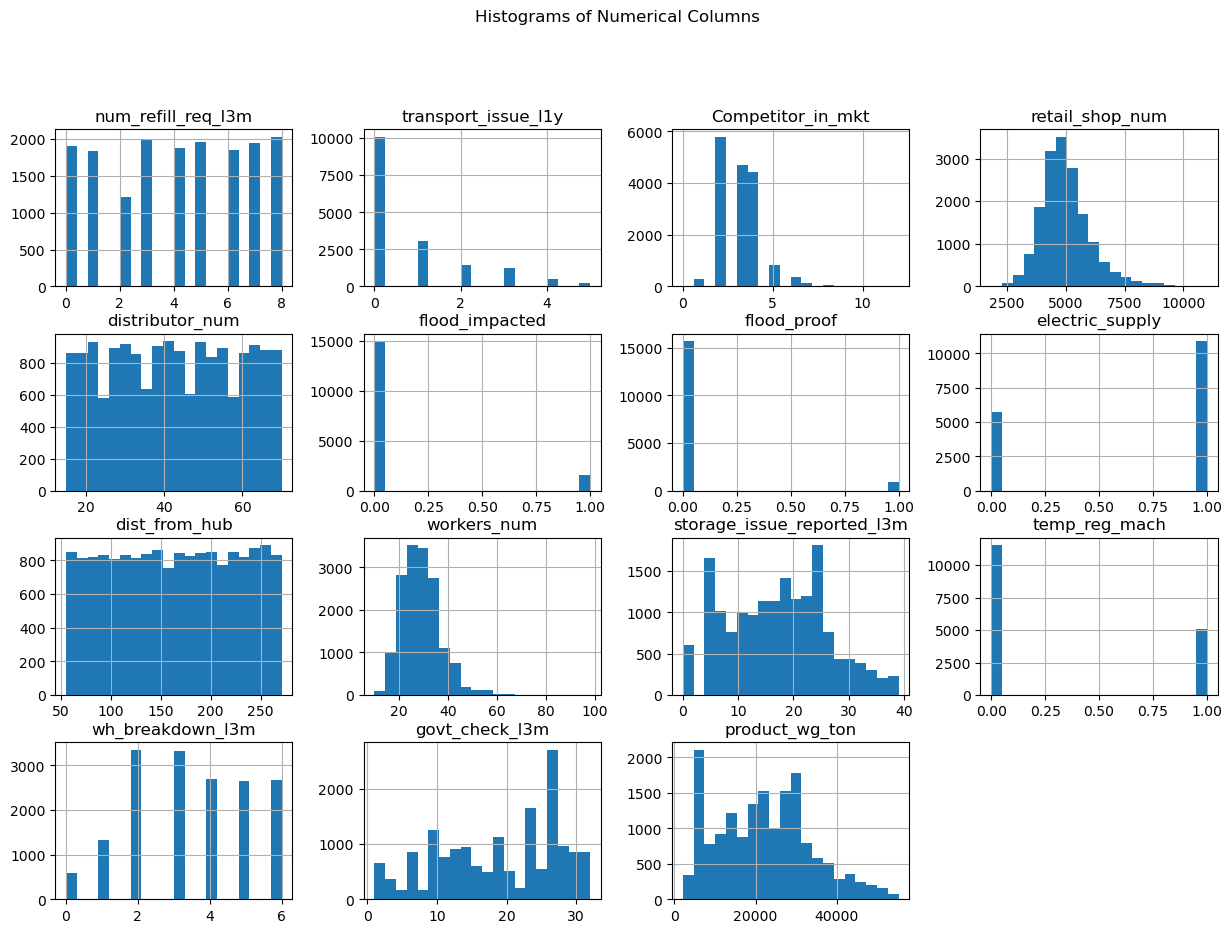

In [45]:
selected_df2[num_columns].hist(bins=20,figsize=(15,10))
plt.suptitle('Histograms of Numerical Columns', y= 1.00)
plt.show()

In [46]:
# Create box plots for each num columns:

In [47]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print(num_cols)
print(cat_cols)

['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']
['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


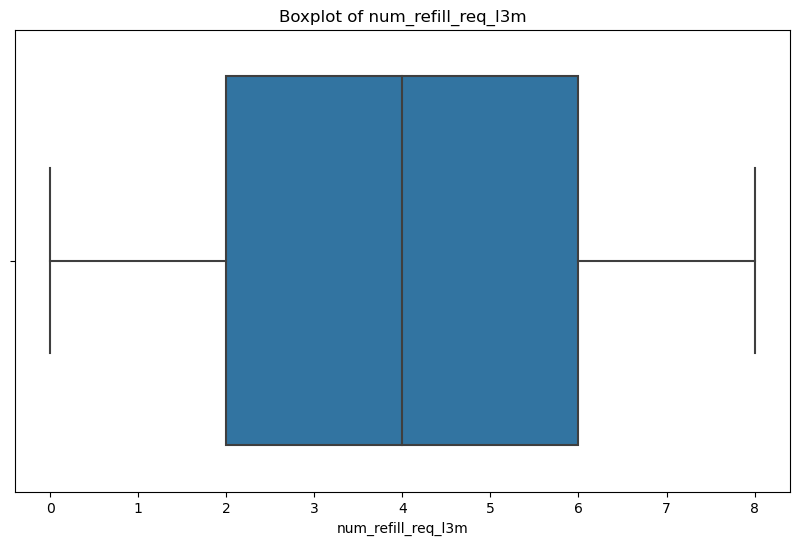

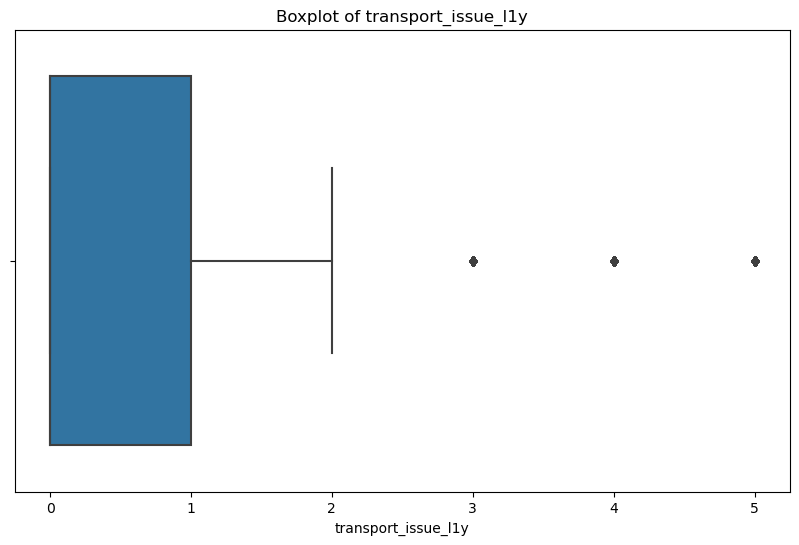

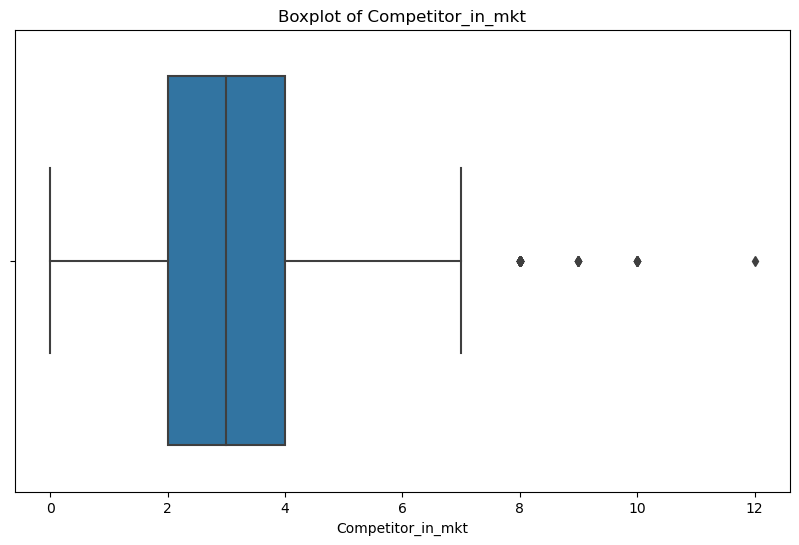

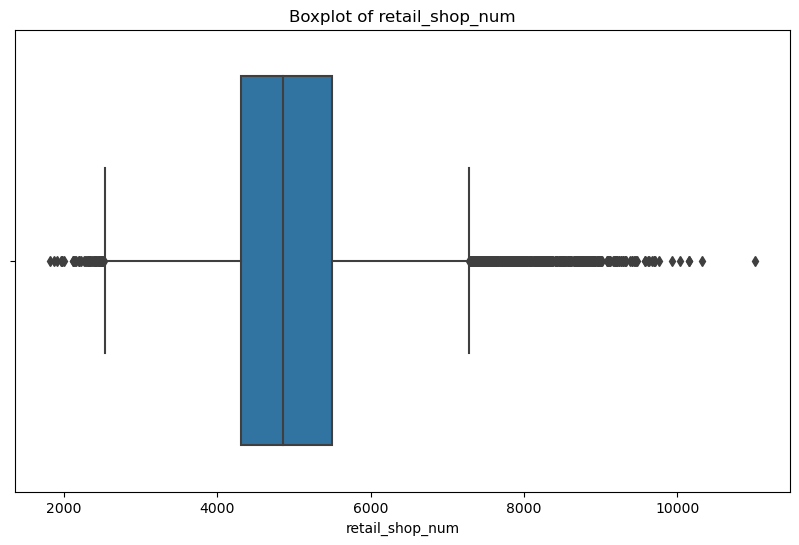

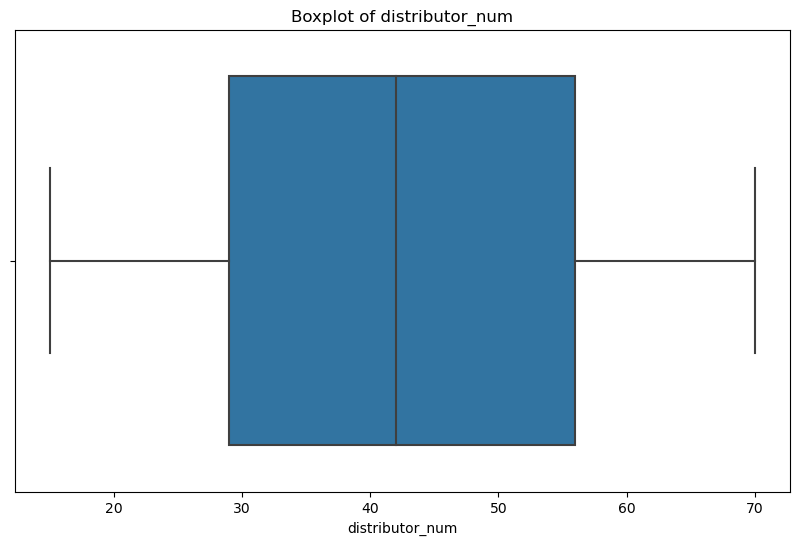

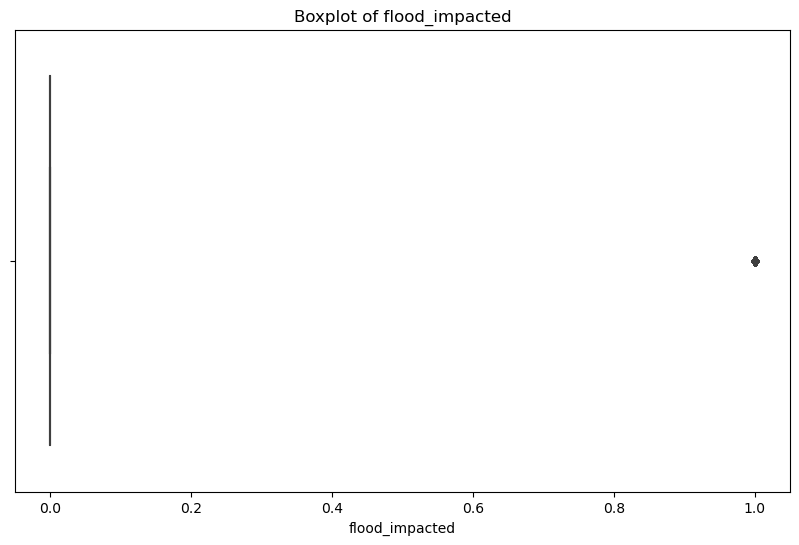

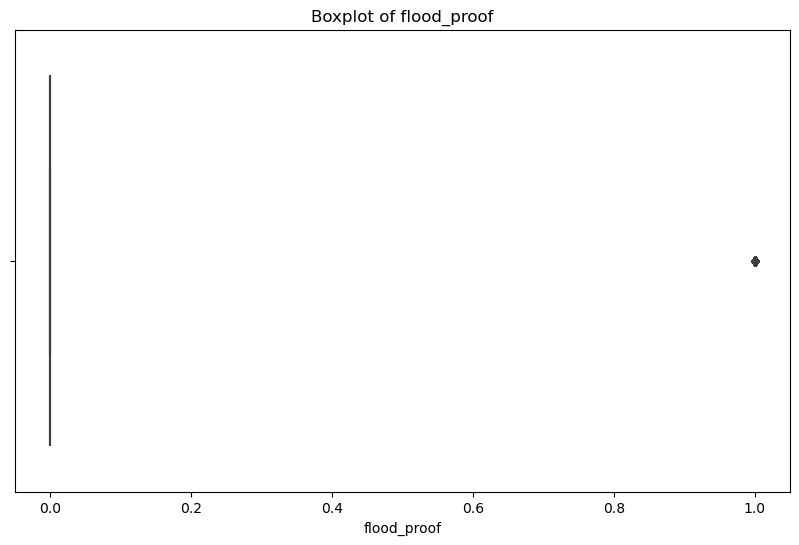

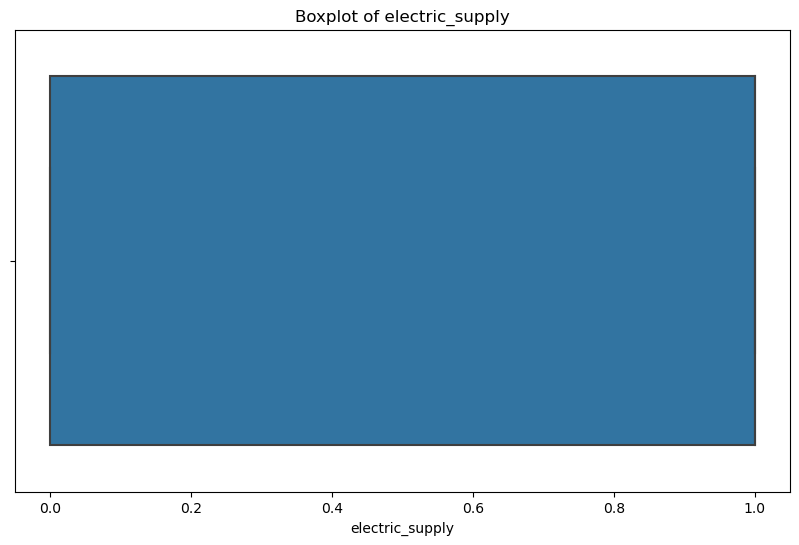

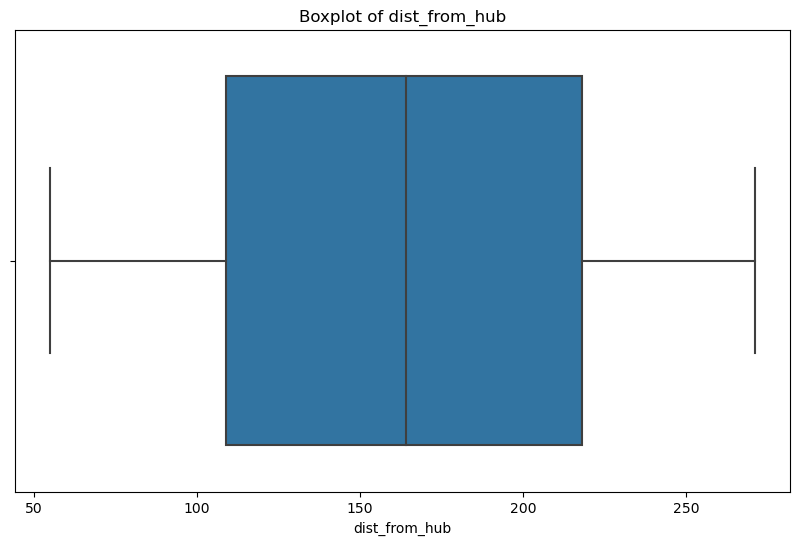

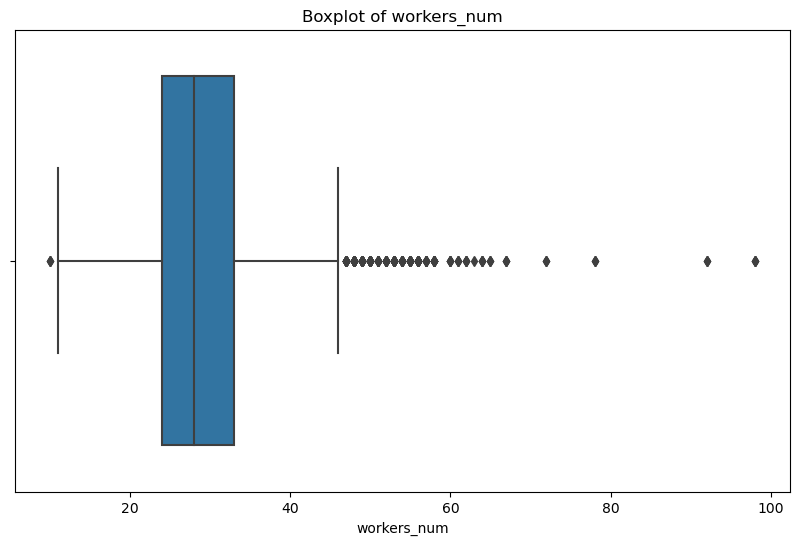

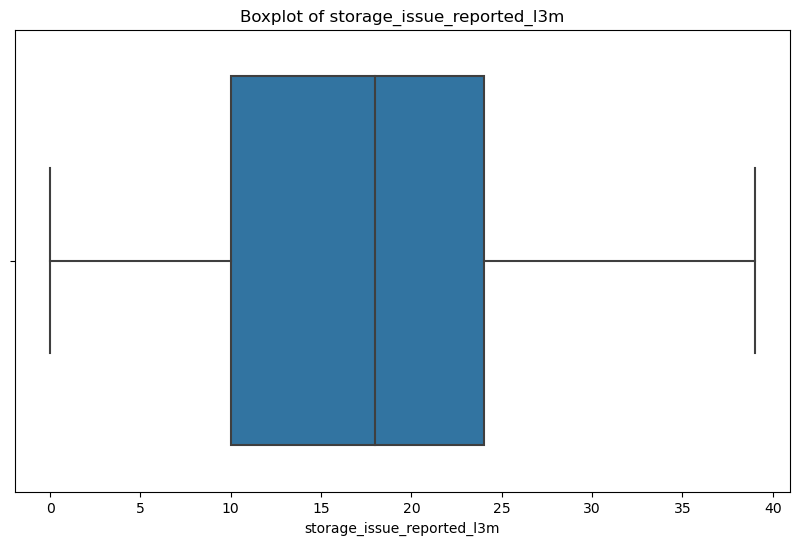

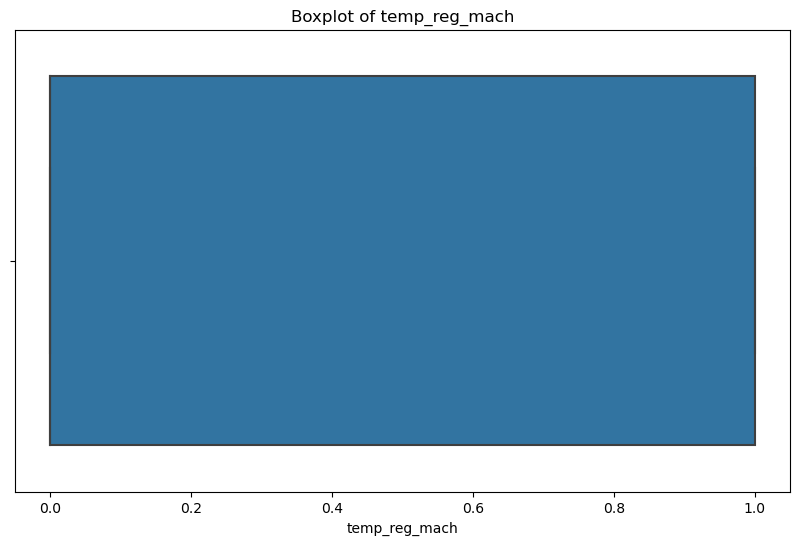

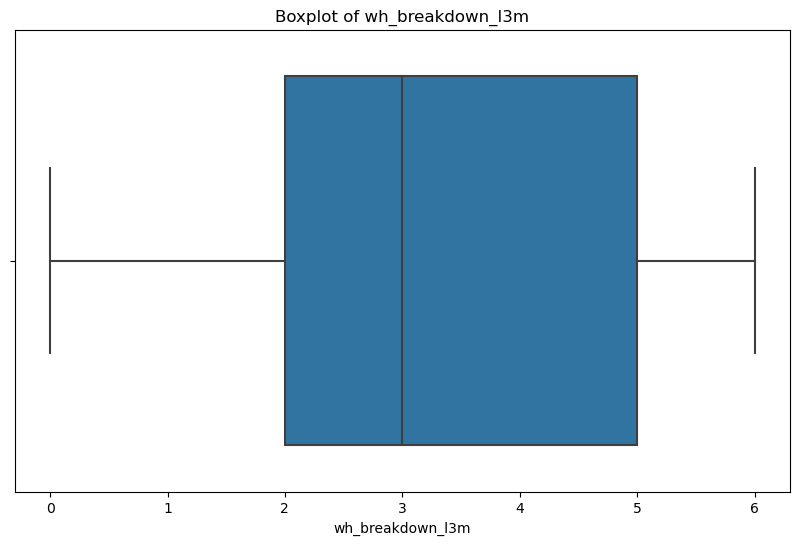

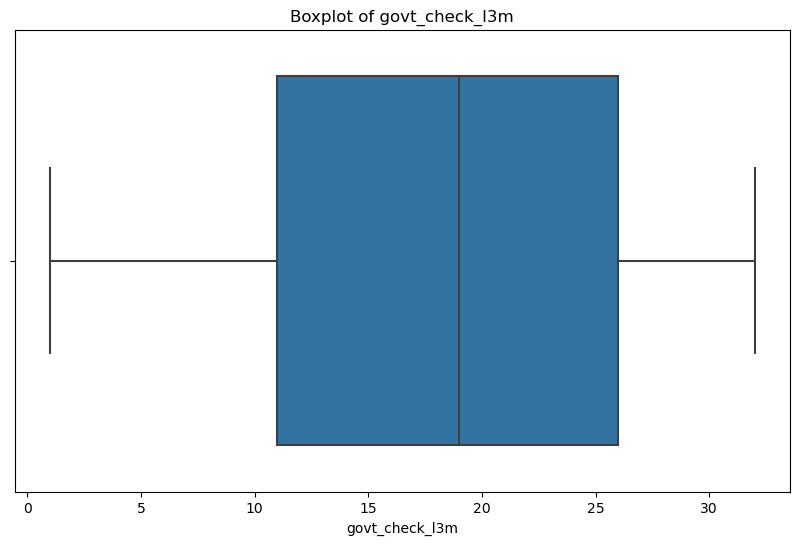

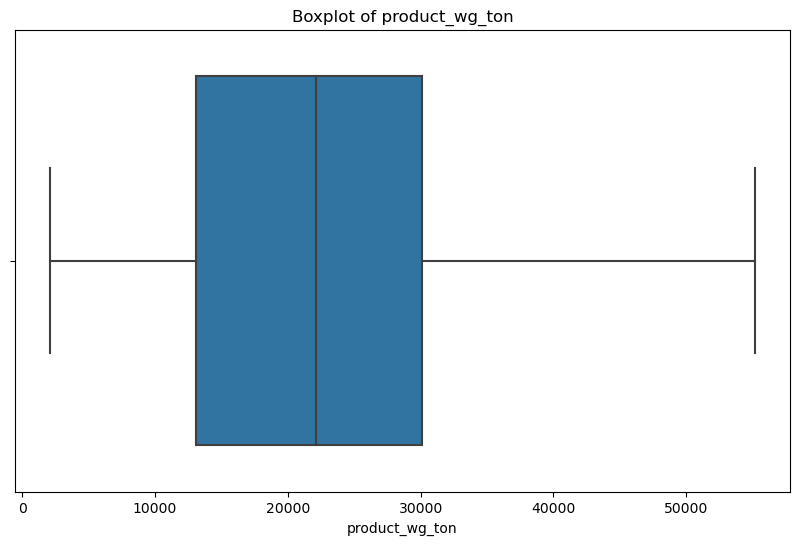

In [48]:
for num_column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_column, data=df2)
    plt.title(f'Boxplot of {num_column}')
    plt.xlabel(num_column)
    plt.show()

    

In [49]:
"""

Since the varable named 'workers_num' has the presence of outliers also the presence of missing value
impute it with the median-value.

"""

"\n\nSince the varable named 'workers_num' has the presence of outliers also the presence of missing value\nimpute it with the median-value.\n\n"

In [50]:
col_name = 'workers_num'
median_value = df2['workers_num'].median()
print(median_value)

28.0


In [51]:
df2['workers_num'] = df2['workers_num'].fillna(median_value)

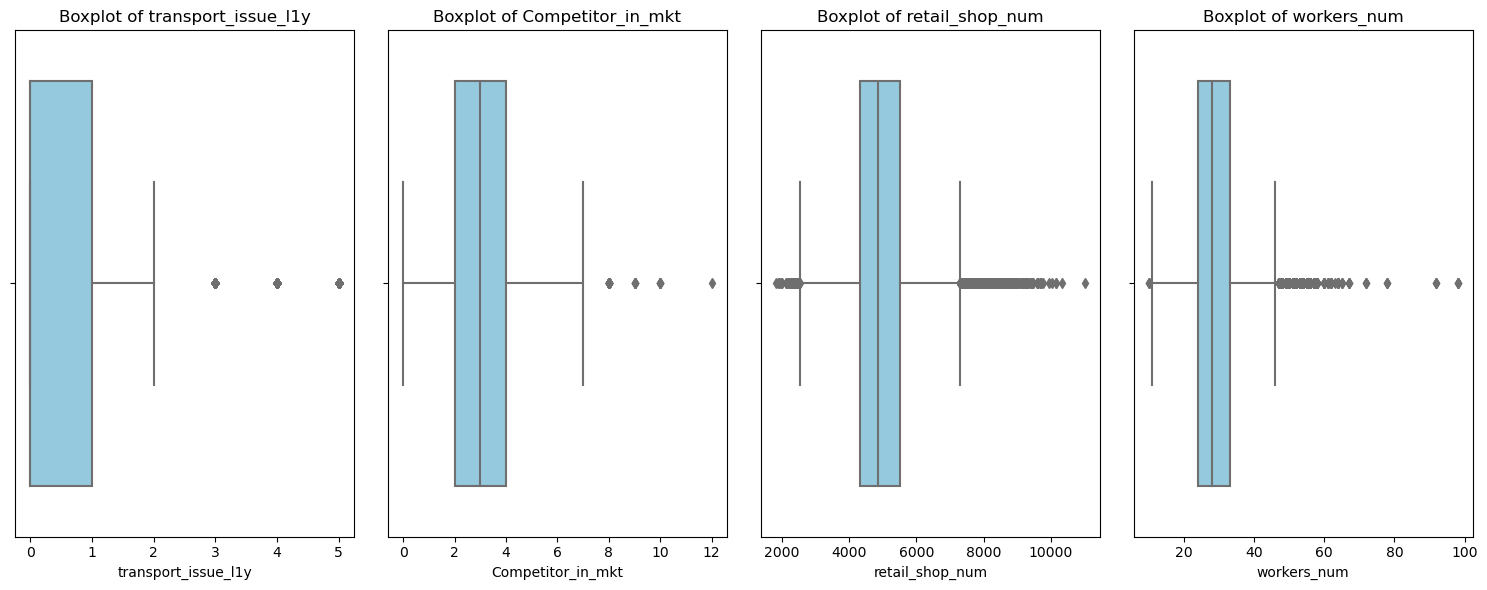

In [52]:
num_of_columns = ['transport_issue_l1y','Competitor_in_mkt', 'retail_shop_num','workers_num']
num_cols = len(num_of_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols,figsize=(15,6))
for i, num_column in enumerate(num_of_columns):
    sns.boxplot(x=num_column, data=df2, ax=axes[i],color='skyblue')
    axes[i].set_title(f'Boxplot of {num_column}')
    axes[i].set_xlabel(num_column)
plt.tight_layout()
plt.show()


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [54]:
correlation = df2['flood_proof'].corr(df2['product_wg_ton'])
print(correlation)

-0.003861903818822465


In [55]:
correlation_2 = df2['flood_impacted'].corr(df2['product_wg_ton'])
print(correlation_2)

-0.0005071598474498105


In [56]:
# Create count plots for categorical columns:

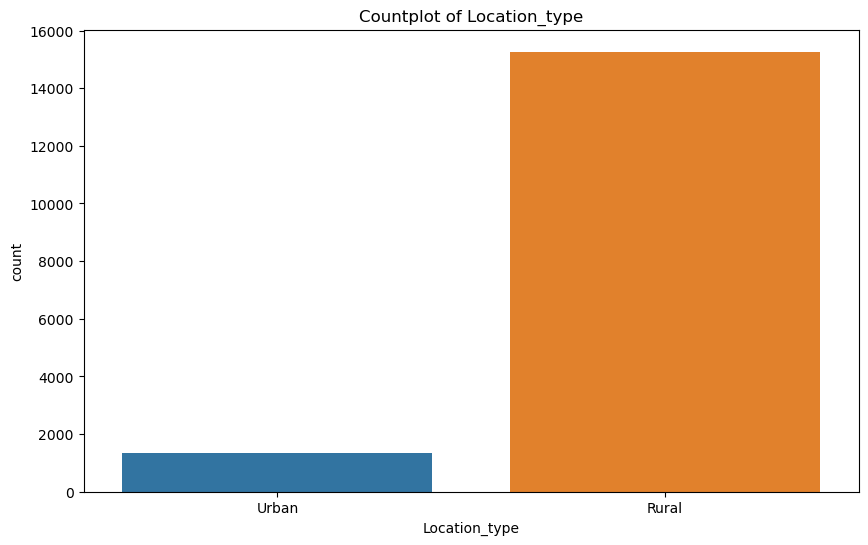

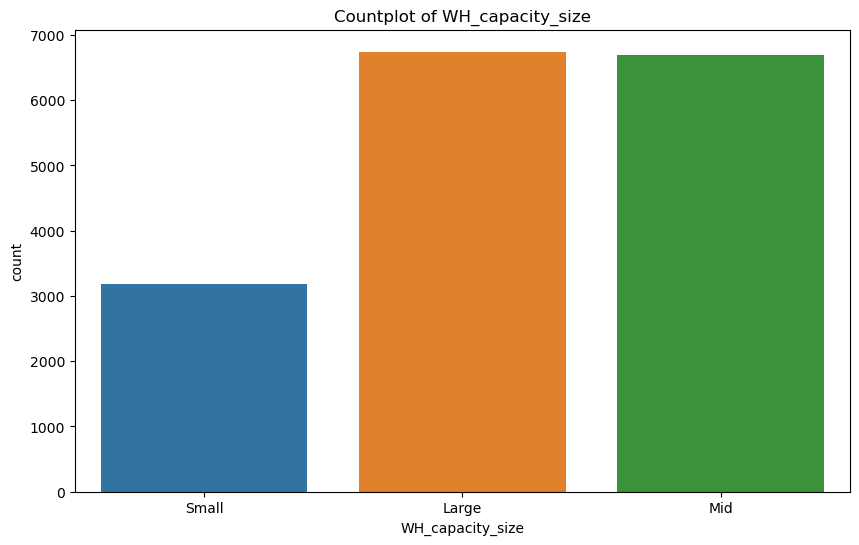

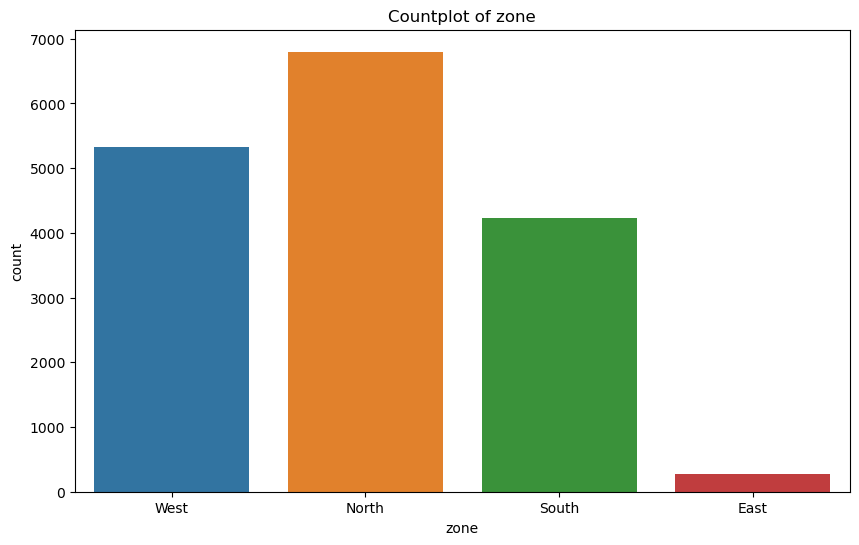

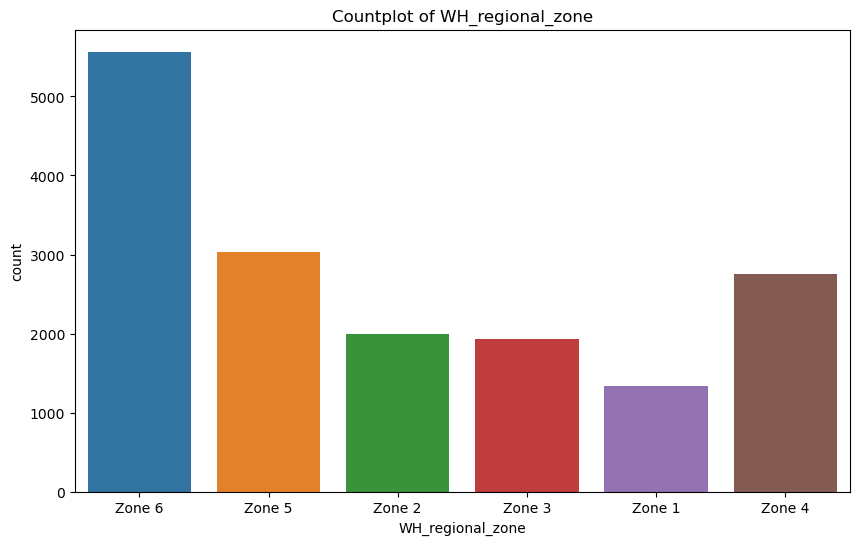

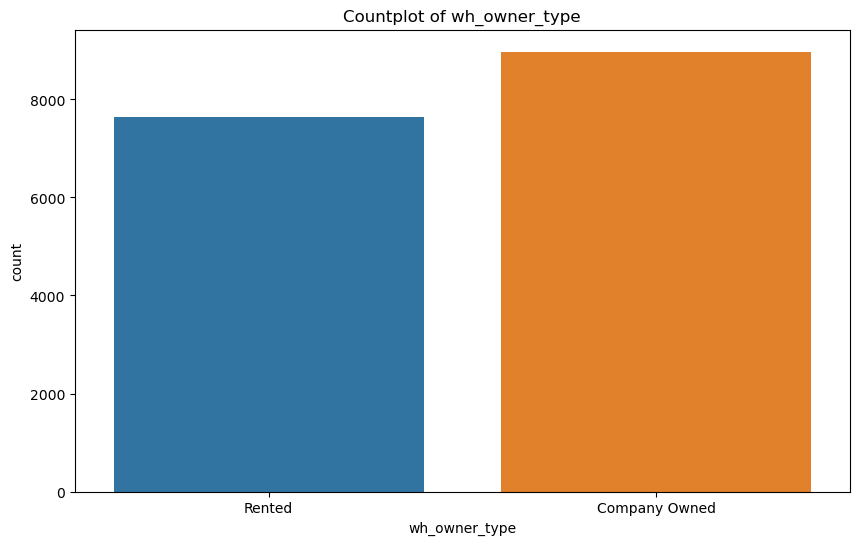

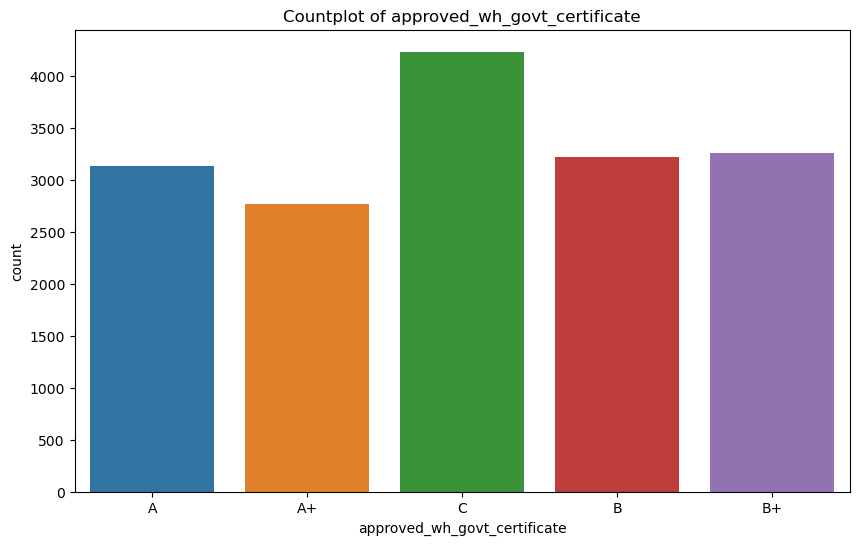

In [57]:
for cat_column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_column, data=df2)
    plt.title(f'Countplot of {cat_column}')
    plt.xlabel(cat_column)
    plt.show()

In [58]:
# Replace Outliers 

In [59]:
median_transport_issue_l1y = df2['transport_issue_l1y'].median()
Q1 = df2['transport_issue_l1y'].quantile(0.25)
Q3 = df2['transport_issue_l1y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2['transport_issue_l1y'] = df2['transport_issue_l1y'].apply(lambda x: median_transport_issue_l1y if x < lower_bound or x > upper_bound else x)

In [60]:
median_Competitor_in_mkt = df2['Competitor_in_mkt'].median()
Q1 = df2['Competitor_in_mkt'].quantile(0.25)
Q3 = df2['Competitor_in_mkt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2['Competitor_in_mkt'] = df2['Competitor_in_mkt'].apply(lambda x: median_Competitor_in_mkt if x < lower_bound or x > upper_bound else x)

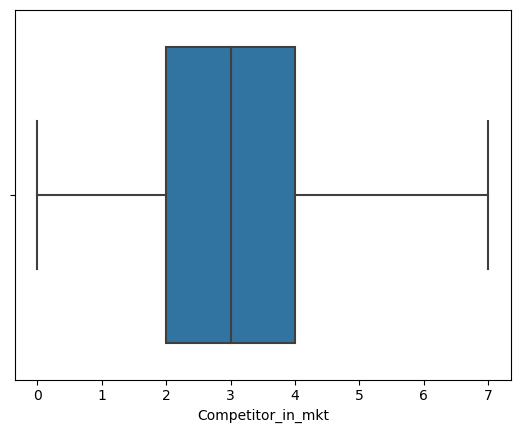

In [61]:
sns.boxplot(x=df2['Competitor_in_mkt'])
plt.show()

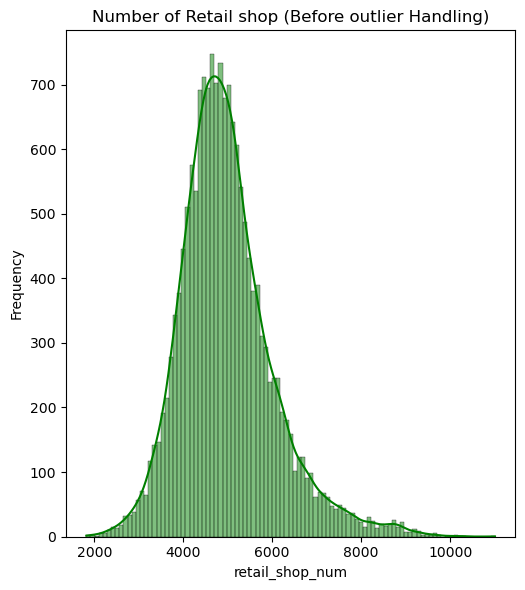

In [62]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df2['retail_shop_num'], kde=True, color='green')
plt.title('Number of Retail shop (Before outlier Handling)')
plt.xlabel('retail_shop_num')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [63]:
percentile_threshold = 95
lower_threshold = np.percentile(df2['retail_shop_num'], 100 - percentile_threshold)
upper_threshold = np.percentile(df2['retail_shop_num'],percentile_threshold)
df2['retail_shop_num_winsorized'] = df2['retail_shop_num'].clip(lower=lower_threshold, upper=upper_threshold)

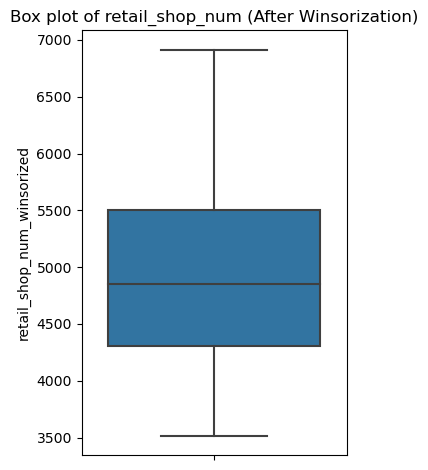

In [64]:
plt.subplot(1,2,2)
sns.boxplot(y=df2['retail_shop_num_winsorized'])
plt.title('Box plot of retail_shop_num (After Winsorization)')
plt.tight_layout()
plt.show()

In [65]:
percentile_threshold = 95
lower_threshold = np.percentile(df2['workers_num'], 100 - percentile_threshold)
upper_threshold = np.percentile(df2['workers_num'],percentile_threshold)
df2['workers_num_winsorized'] = df2['workers_num'].clip(lower=lower_threshold, upper=upper_threshold)

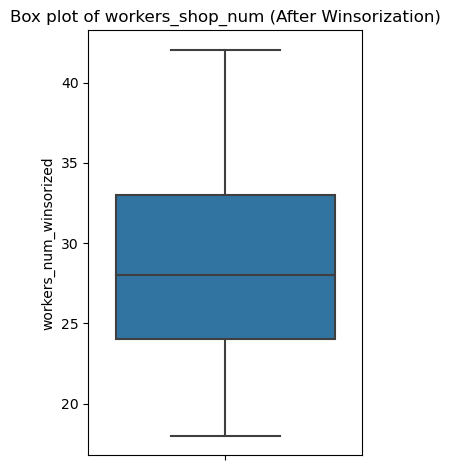

In [66]:
plt.subplot(1,2,2)
sns.boxplot(y=df2['workers_num_winsorized'])
plt.title('Box plot of workers_shop_num (After Winsorization)')
plt.tight_layout()
plt.show()

In [67]:
len(df2['retail_shop_num_winsorized'])

16620

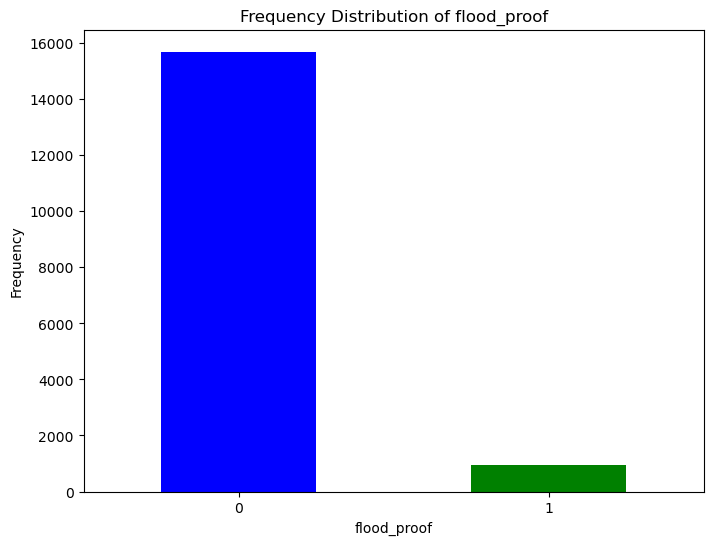

In [68]:
frequency = df2['flood_proof'].value_counts()
plt.figure(figsize=(8,6))
frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency Distribution of flood_proof')
plt.xlabel('flood_proof')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The above graph gives the clear picture of the distribution of flood_proof status in the dataset.
The frequency of 0 is very much higher than the category 1.

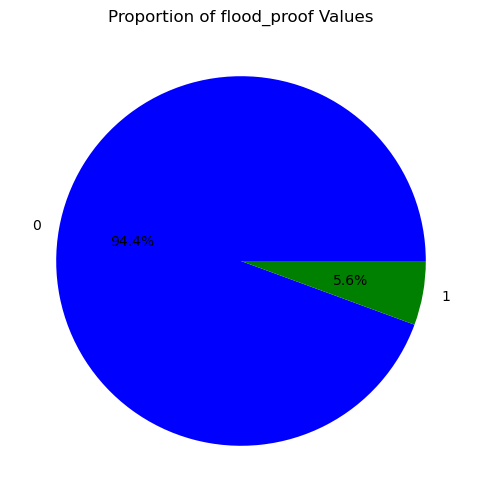

In [69]:
frequency = df2['flood_proof'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', colors=['blue','green'])
plt.title('Proportion of flood_proof Values')
plt.show()

In [70]:
df2['flood_proof'].unique()

array([1, 0], dtype=int64)

In [71]:
# Calculate the proportion of 1's in the 'flood_proof' column:

In [72]:
proportion_of_ones = df2['flood_proof'].mean()
outlier_threshold = 0.05
outliers = df2[df2['flood_proof'] > outlier_threshold]
if not outliers.empty:
    print("Outliers are identified :")
    print(outliers['flood_proof'])
else:
    print("No outliers are identified")

Outliers are identified :
0        1
41       1
62       1
67       1
69       1
        ..
16435    1
16465    1
16474    1
16563    1
16594    1
Name: flood_proof, Length: 931, dtype: int64


In [73]:
len(df2['flood_proof'])

16620

In [74]:
# Replace the outliers(1) with zero

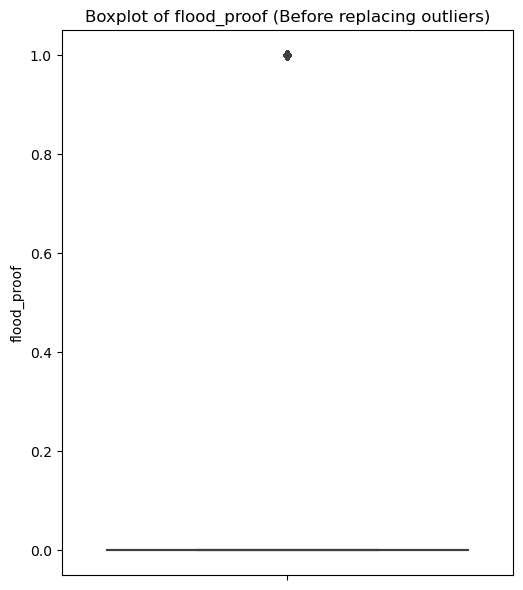

In [75]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df2['flood_proof'])
plt.title('Boxplot of flood_proof (Before replacing outliers)')
plt.tight_layout()
plt.show()

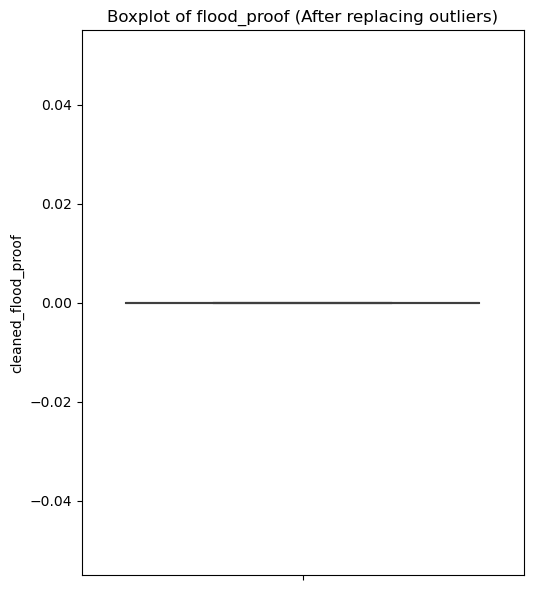

In [76]:
df2['cleaned_flood_proof'] = df2['flood_proof'].replace(1,0)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df2['cleaned_flood_proof'])
plt.title('Boxplot of flood_proof (After replacing outliers)')
plt.tight_layout()
plt.show()

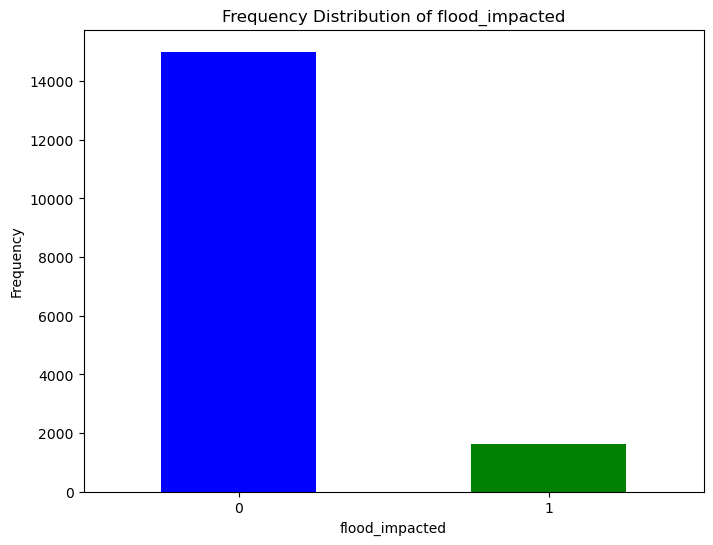

In [77]:
frequency = df2['flood_impacted'].value_counts()
plt.figure(figsize=(8,6))
frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency Distribution of flood_impacted')
plt.xlabel('flood_impacted')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The above graph gives the clear picture of the distribution of flood_impacted status in the dataset. The frequency of 0 is very much higher than the category 1.

In [78]:
# Calculate the proportion of 1's in flood_impacted

In [79]:
proportion_of_ones = df2['flood_impacted'].mean()
outlier_threshold = 0.05
outliers = df2[df2['flood_impacted'] > outlier_threshold]
if not outliers.empty:
    print("Outliers are identified :")
    print(outliers['flood_impacted'])
else:
    print("No outliers are identified")

Outliers are identified :
4        1
16       1
28       1
58       1
62       1
        ..
16592    1
16594    1
16595    1
16617    1
16618    1
Name: flood_impacted, Length: 1610, dtype: int64


In [80]:
# Replace Outliers with 0:

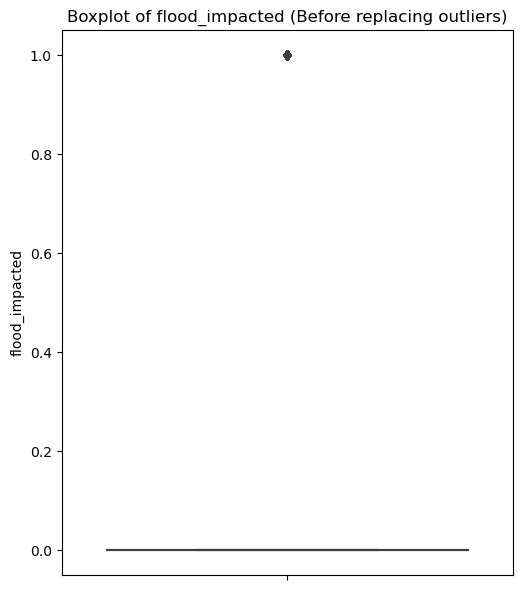

In [81]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df2['flood_impacted'])
plt.title('Boxplot of flood_impacted (Before replacing outliers)')
plt.tight_layout()
plt.show()

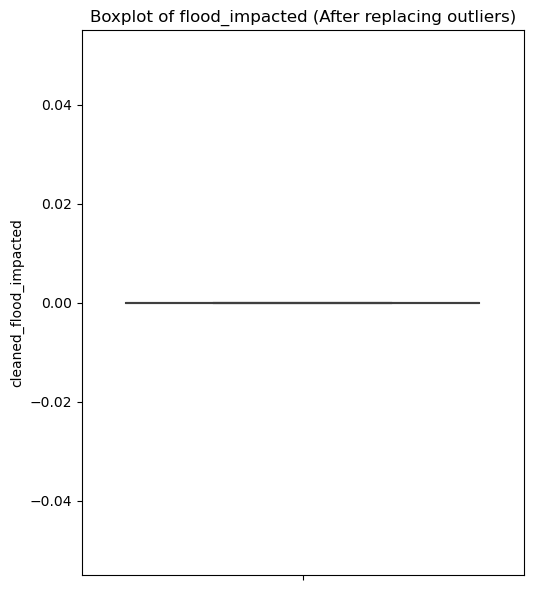

In [82]:
df2['cleaned_flood_impacted'] = df2['flood_impacted'].replace(1,0)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df2['cleaned_flood_impacted'])
plt.title('Boxplot of flood_impacted (After replacing outliers)')
plt.tight_layout()
plt.show()

In [83]:
df2.head(3)

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                  1.0                2.0             4651         Rented   
1                  0.0                4.0             6217  Company Owned   
2                  0.0                4.0             4306  Company Owned   

   distributor_num  ...  storage_issue_reported_l3m  temp_reg_mach  \
0               24  ...                          13              0   
1               47  ...                           4              0   
2               64  ...                          17              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   

   product_wg_ton  retail_shop_num_winsorized workers_num_winsorized  \
0           17115                      4651.0                   29.0   
1            5074                      6217.0                   31.0   
2           23137                      4306.0                   37.0   

   cleaned_flood_proof  cleaned_flood_impacted  
0                    0                       0  
1                    0                       0  
2                    0                       0  

[3 rows x 25 columns]

In [84]:
columns_to_drop = ['retail_shop_num','flood_impacted', 'flood_proof','workers_num']
df2.drop(columns= columns_to_drop, inplace=True)

In [85]:
# Convert the data types of columns named retail_shop_num_winsorized and workers_num_winsorized into int64:

In [86]:
df2['retail_shop_num_winsorized'] = df2['retail_shop_num_winsorized'].astype('int64')

In [87]:
df2['workers_num_winsorized'] = df2['workers_num_winsorized'].astype('int64')

In [88]:
df2['workers_num_winsorized']

0        29
1        31
2        37
3        21
4        25
         ..
16615    19
16616    30
16617    24
16618    28
16619    34
Name: workers_num_winsorized, Length: 16620, dtype: int64

In [89]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted']
Categorical columns are : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


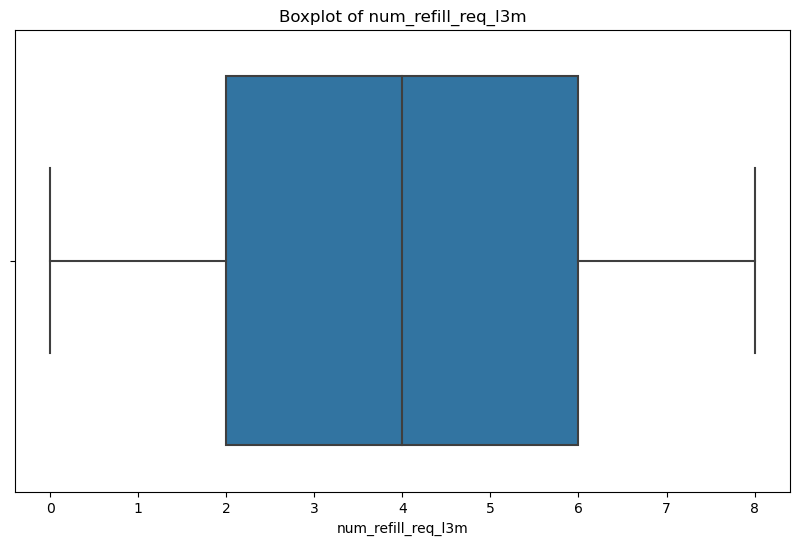

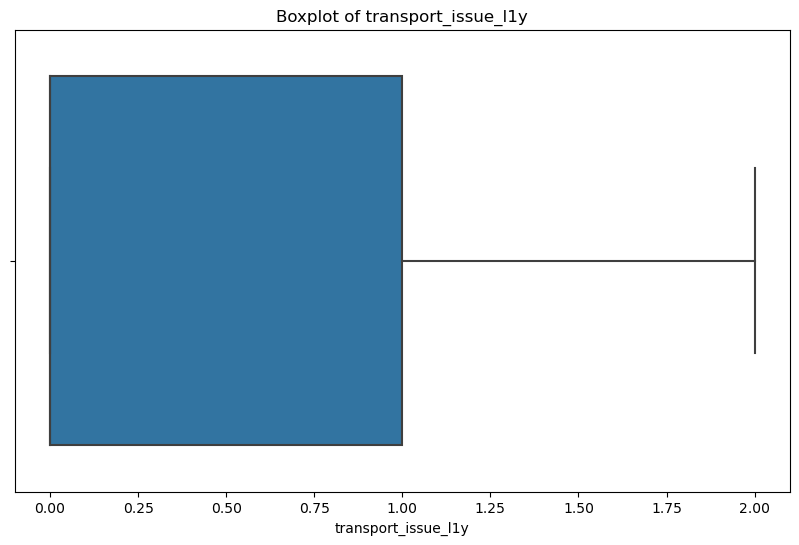

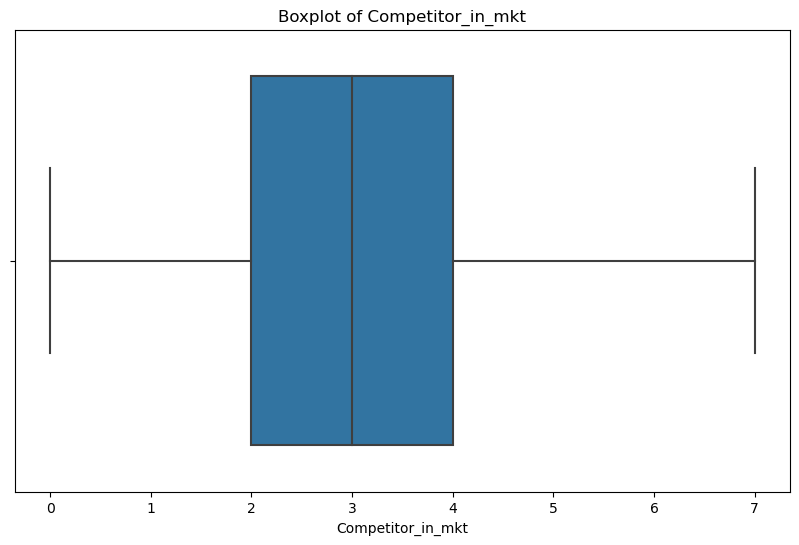

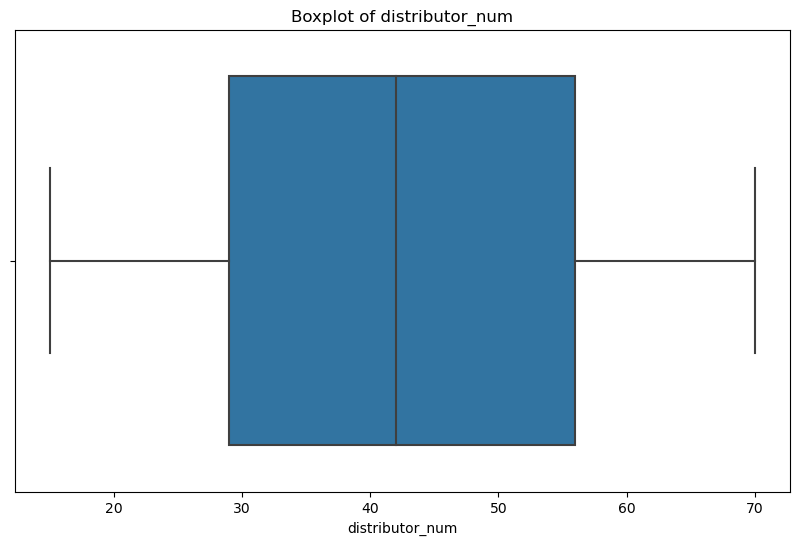

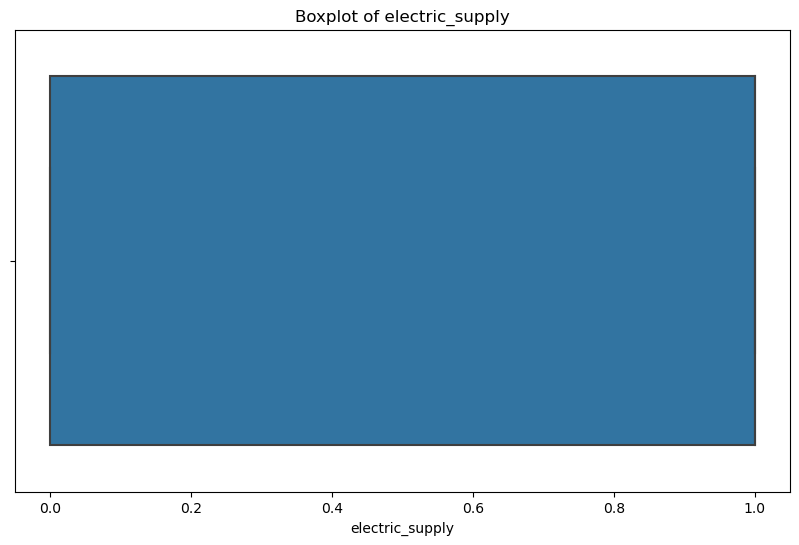

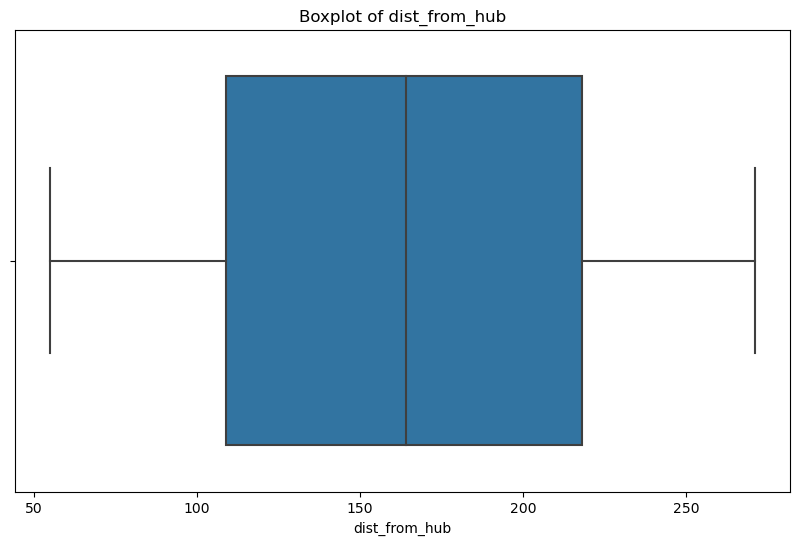

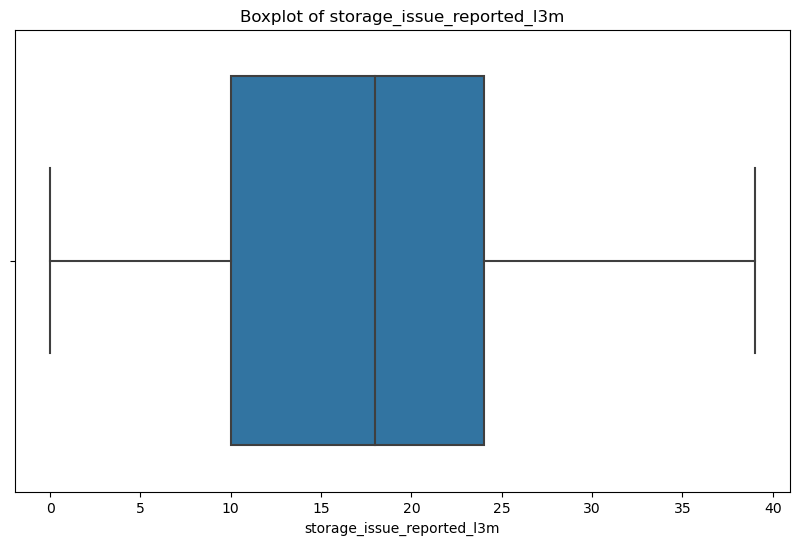

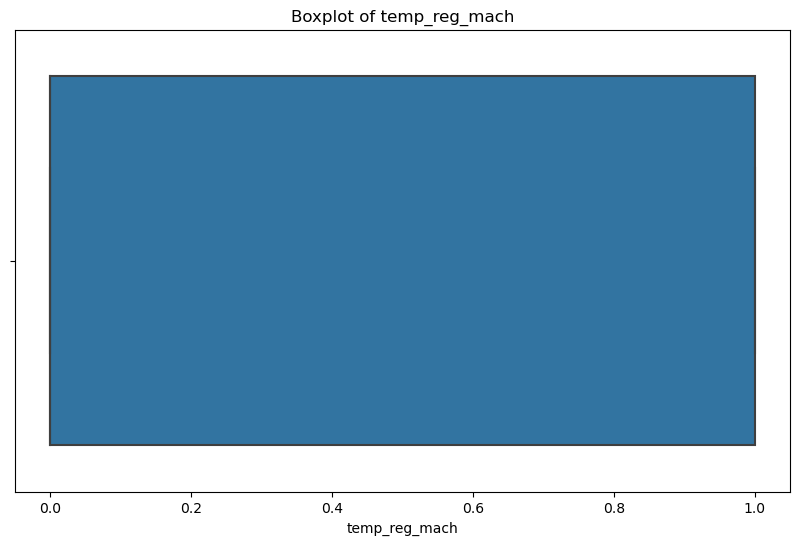

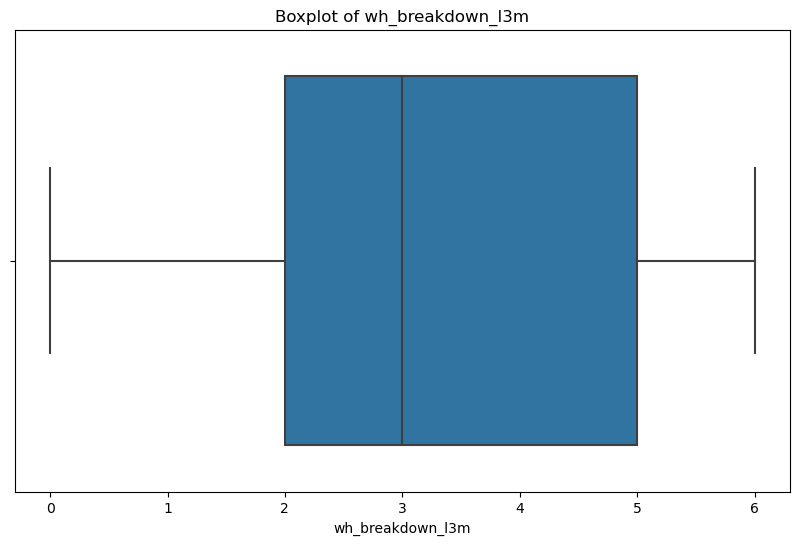

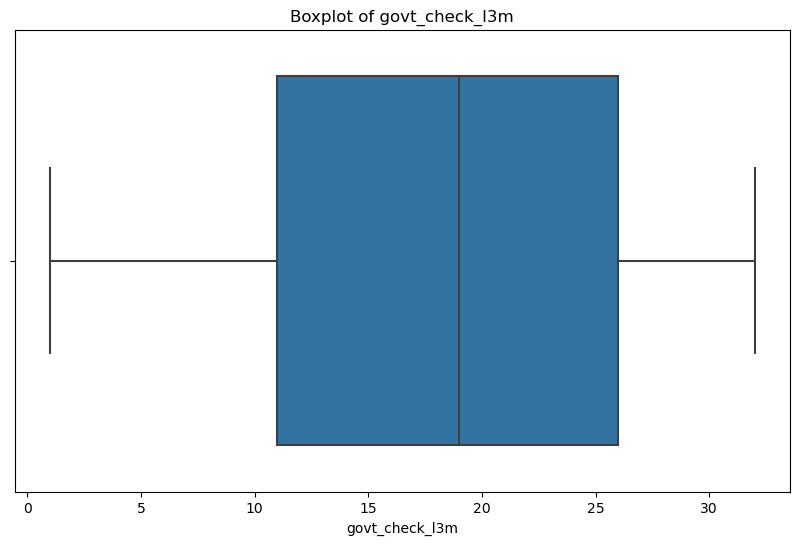

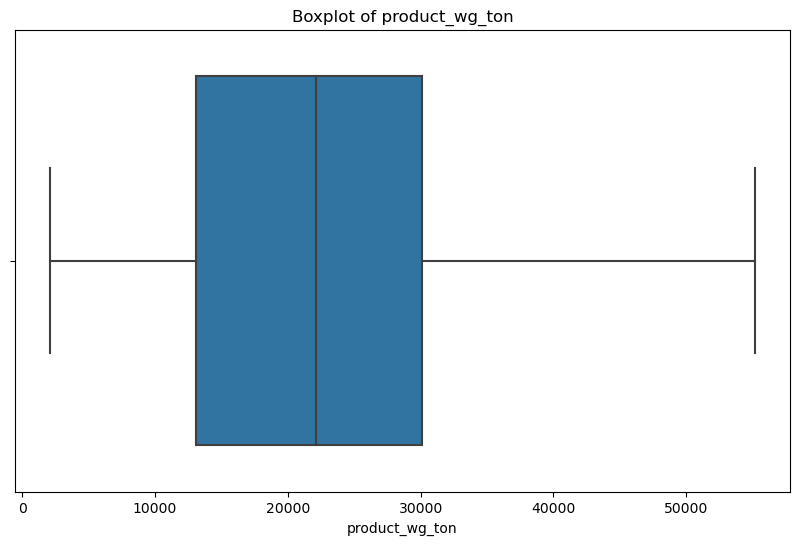

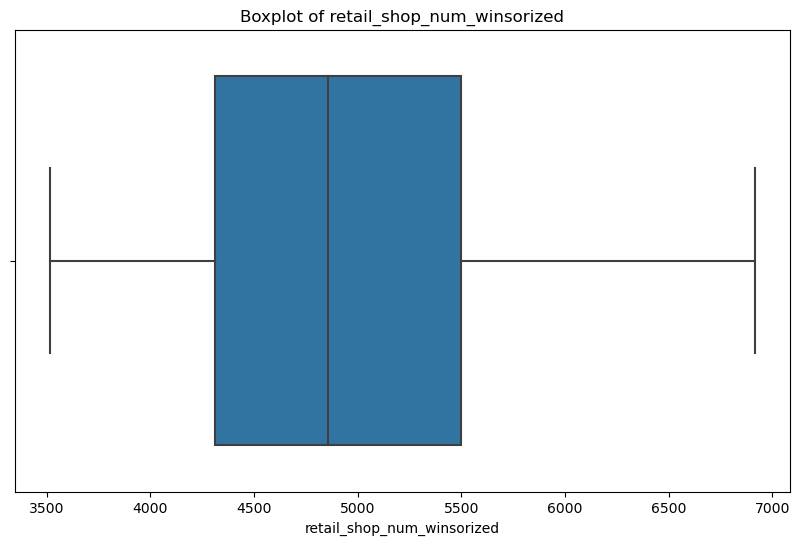

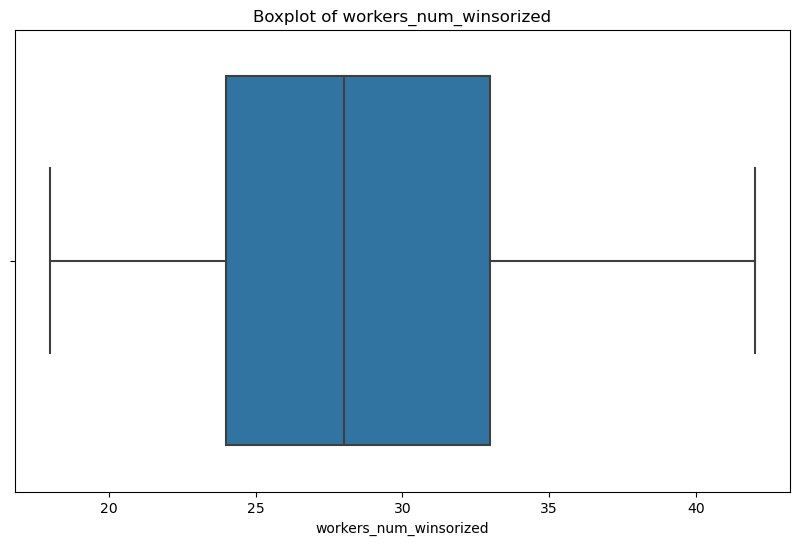

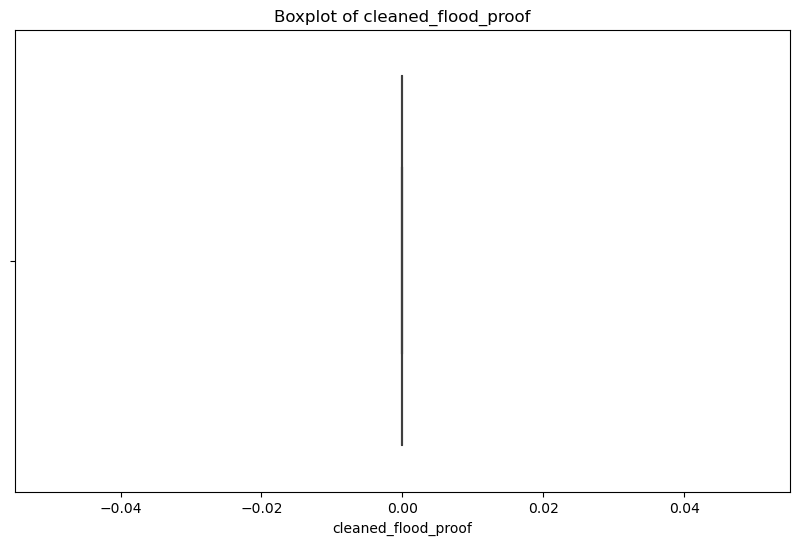

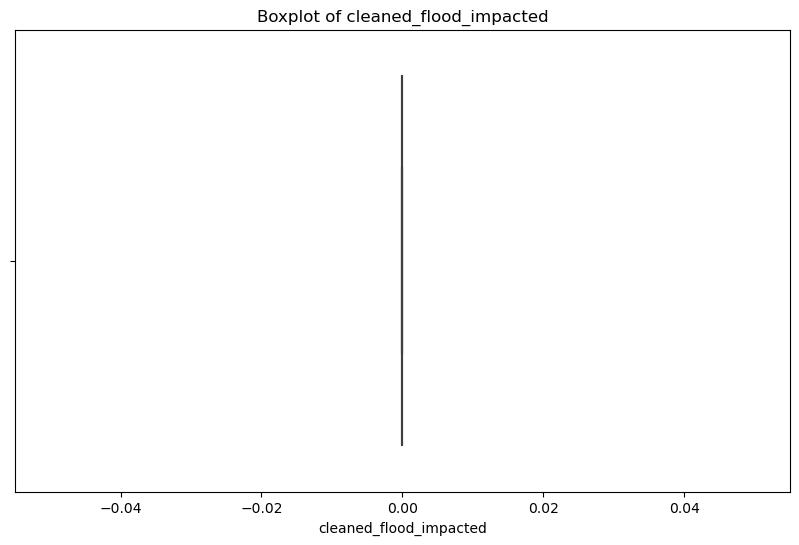

In [90]:
for num_column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_column, data=df2)
    plt.title(f'Boxplot of {num_column}')
    plt.xlabel(num_column)
    plt.show()

In [91]:
# Correlation with the target variable:

In [92]:
numerical_cols = df2.select_dtypes(include=['float64','int64']).columns
corr_with_the_target_variable = df2[numerical_cols].corrwith(df2['product_wg_ton'])
# filter out categorical columns if any:
categorical_cols = df2.select_dtypes(include=['object']).columns
if 'product_wg_ton' in categorical_cols:
    categorical_cols = categorical_cols.drop('product_wg_ton')    


In [93]:
# Visualize correlation coefficients:

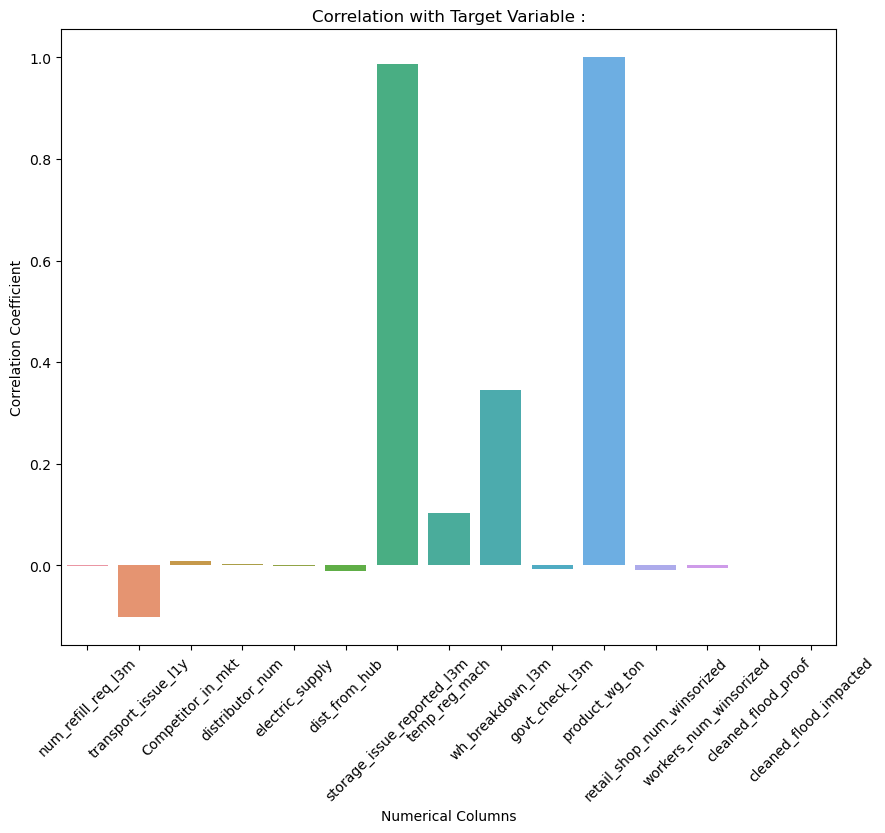

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(x=corr_with_the_target_variable.index, y=corr_with_the_target_variable.values)
plt.title('Correlation with Target Variable :')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

 The above visualization provides valuable insights into the relationships between numerical features and the target variable:
 which facilitating feature selection, model interpretation, and comprehension of the underlying data patterns.

num_refill_req_l3m           -0.000646
transport_issue_l1y          -0.102966
Competitor_in_mkt             0.007942
distributor_num               0.001435
electric_supply              -0.001533
dist_from_hub                -0.011380
storage_issue_reported_l3m    0.986716
temp_reg_mach                 0.101912
wh_breakdown_l3m              0.345474
govt_check_l3m               -0.007359
product_wg_ton                1.000000
retail_shop_num_winsorized   -0.008636
workers_num_winsorized       -0.005821
cleaned_flood_proof                NaN
cleaned_flood_impacted             NaN
dtype: float64


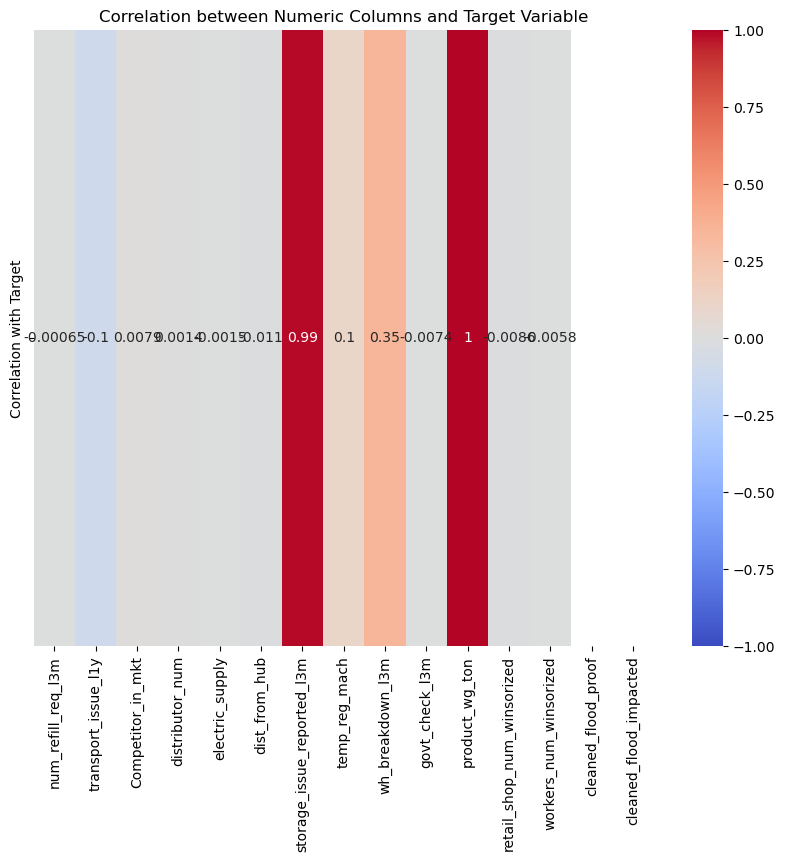

In [95]:
numerical_cols = df2.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df2[numerical_cols].corrwith(df2['product_wg_ton'])
print(correlation_matrix)

plt.figure(figsize=(10, 8))

# Create a heatmap for correlation coefficients: 
sns.heatmap(correlation_matrix.to_frame('Correlation with Target').transpose(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Numeric Columns and Target Variable")
plt.show()


# Feature Engineering and Data Preprocessing

In [96]:
# Feature engineering for numerical columns:

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  float64
 6   Competitor_in_mkt             16620 non-null  float64
 7   wh_owner_type                 16620 non-null  object 
 8   distributor_num               16620 non-null  int64  
 9   electric_supply               16620 non-null  int64  
 10  dist_from_hub                 16620 non-null  int64  
 11  storage_issue_reported_l3m    16620 non-null  int64  
 12  temp_reg_mach                 16620 non-null  int64  
 13  a

In [98]:
# Interaction Features:

In [99]:
# Combine numerical features :

In [100]:
df2['num_refill_transport'] = df2['num_refill_req_l3m'] * df2['transport_issue_l1y']

In [101]:
df2['num_refill_transport'] = df2['num_refill_transport'].astype('int64')

In [102]:
df2['num_refill_transport'].unique()

array([ 3,  0,  8,  7,  6,  1,  4, 10,  2, 16,  5, 12, 14], dtype=int64)

In [103]:
# Normalized feature:

In [104]:
scaler = MinMaxScaler()
df2['dist_from_hub_normalized'] = scaler.fit_transform(df2[['dist_from_hub']])

In [105]:
# Demand Density:

In [106]:
df2['demand_density'] = df2['retail_shop_num_winsorized']/ df2['dist_from_hub']

In [107]:
# Label encoding for the column named WH_capacity_size
# By assigning numerical values (large=3, Mid=2, Small=1)

In [108]:
capacity_mapping = {'Large': 3, 'Mid':2, 'Small':1}
df2['WH_Capacity_size_num'] = df2['WH_capacity_size'].map(capacity_mapping)

In [109]:
df2['WH_Capacity_size_num']

0        1
1        3
2        2
3        2
4        3
        ..
16615    3
16616    3
16617    3
16618    1
16619    3
Name: WH_Capacity_size_num, Length: 16620, dtype: int64

In [110]:
# Distribution efficiency(a):

In [111]:
df2['distribution_efficiency'] = df2['distributor_num'] / df2['WH_Capacity_size_num']

In [112]:
df2['distribution_efficiency']

0        24.000000
1        15.666667
2        32.000000
3        25.000000
4        14.000000
           ...    
16615    23.333333
16616     8.666667
16617    16.666667
16618    59.000000
16619    16.333333
Name: distribution_efficiency, Length: 16620, dtype: float64

In [113]:
# Distributor_efficiency:

In [114]:
df2['distributor_eficny'] = df2['distributor_num'] / df2['retail_shop_num_winsorized'] 

In [115]:
# Normalized Demand Density:

In [116]:
df2['normalized_demand_dnsty'] = df2['product_wg_ton'] / df2['dist_from_hub'] 

In [117]:
# Impact of temperature control -- on demand:

In [118]:
df2['temp_reg_impact'] = df2['temp_reg_mach'] * df2['product_wg_ton']

In [119]:
# Competetive pressure impact:

In [120]:
df2['competitor_pressure_impact'] = df2['Competitor_in_mkt'] * df2['product_wg_ton']

In [121]:
df2['competitor_pressure_impact'] = df2['competitor_pressure_impact'].astype('int64')

In [122]:
# Trends of past data

In [123]:
df2['product_wg_ton_lag1'] = df2['product_wg_ton'].shift(1)
df2['product_wg_ton_lag3'] = df2['product_wg_ton'].shift(3)

In [124]:
mean_value = df2['product_wg_ton_lag1'].mean()
df2['product_wg_ton_lag1'].fillna(mean_value, inplace=True)

In [125]:
df2['product_wg_ton_lag1'] = df2['product_wg_ton_lag1'].astype('int64')

In [126]:
df2['product_wg_ton_lag3'].isna().sum()

3

In [127]:
mean_value = df2['product_wg_ton_lag3'].mean()
df2['product_wg_ton_lag3'].fillna(mean_value, inplace=True)
df2['product_wg_ton_lag3'] = df2['product_wg_ton_lag3'].astype('int64')

In [128]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']
Categorical columns are : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


In [129]:
df2['zone'].unique()

array(['West', 'North', 'South', 'East'], dtype=object)

In [130]:
# One-Hot encoding:

In [131]:
df2 = pd.get_dummies(df2, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type'])

In [132]:
# Identify new boolean columns:

In [133]:
bool_cols = df2.select_dtypes(include=['bool']).columns
print(bool_cols)

Index(['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 1',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned',
       'wh_owner_type_Rented'],
      dtype='object')


In [134]:
# Convert boolean columns to int64

In [135]:
df2[bool_cols] = df2[bool_cols].astype('int64')

In [136]:
df2['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+'], dtype=object)

In [137]:
# Converting approved_wh_govt_certificate into numerical column

In [138]:
grade_mapping = {'A+':1, 'A':2, 'B+':3, 'B': 4, 'C': 5}
df2['approved_wh_govt_certificate_num'] = df2['approved_wh_govt_certificate'].map(grade_mapping).astype('int64')

In [139]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num']
Categorical columns are : ['

In [140]:
new_features = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency',
                'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West',
                'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'distributor_eficny',  'normalized_demand_dnsty',
                'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']

#Finding correlation of new_features with respect to the target variable:

In [141]:
correlations = {}
for feature in new_features:
    correlations[feature] = df2[feature].corr(df2['product_wg_ton'])
print(correlations)

{'num_refill_transport': -0.08719270031010902, 'dist_from_hub_normalized': -0.011380138335073321, 'demand_density': 0.0101551791959544, 'WH_Capacity_size_num': 0.012596193831102227, 'distribution_efficiency': -0.015094897495919404, 'Location_type_Rural': -0.07322918653109865, 'Location_type_Urban': 0.07322918653109867, 'zone_East': 0.005121329827894524, 'zone_North': 0.00636327821419138, 'zone_South': -0.009170912996854137, 'zone_West': 0.0004463964274200674, 'WH_regional_zone_Zone 1': -0.016277285321259962, 'WH_regional_zone_Zone 2': 0.013381725956795277, 'WH_regional_zone_Zone 3': -0.0045401495744525075, 'WH_regional_zone_Zone 4': 0.007572569230609947, 'WH_regional_zone_Zone 5': 0.005754091377278694, 'WH_regional_zone_Zone 6': -0.007435911869852023, 'wh_owner_type_Company Owned': -0.0022071587468397505, 'wh_owner_type_Rented': 0.0022071587468397505, 'approved_wh_govt_certificate_num': -0.2280377447167246, 'distributor_eficny': 0.00525475479453782, 'normalized_demand_dnsty': 0.6945408

In [142]:
# Finding outliers of above created new features using boxplot:

In [143]:
columns_to_visualize = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'Location_type_Rural', 
                        'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 
                        'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 
                        'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'distributor_eficny', 'normalized_demand_dnsty',
                        'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']


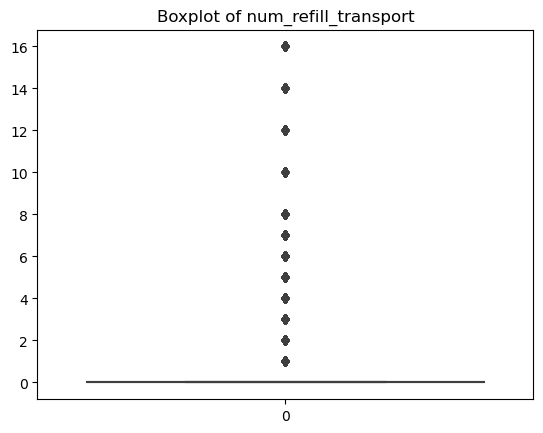

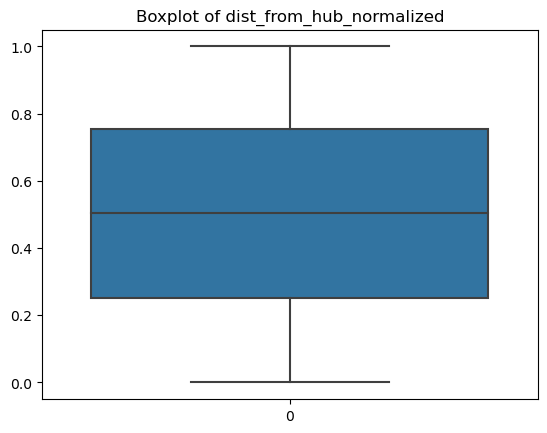

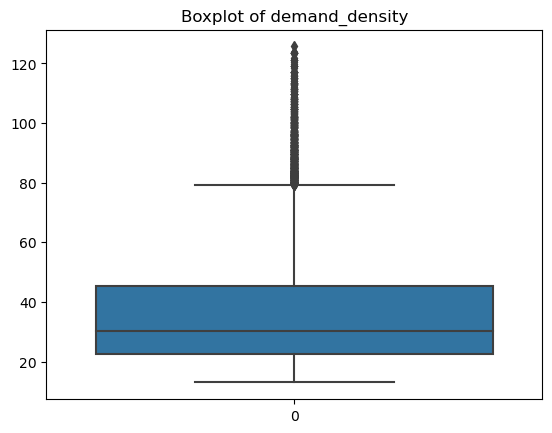

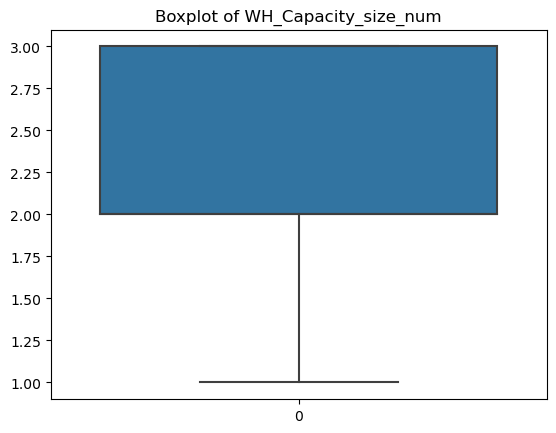

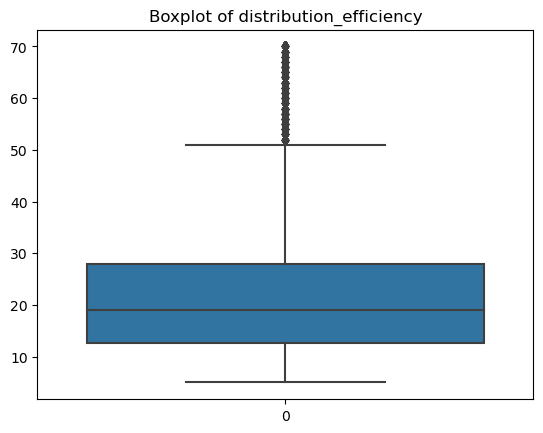

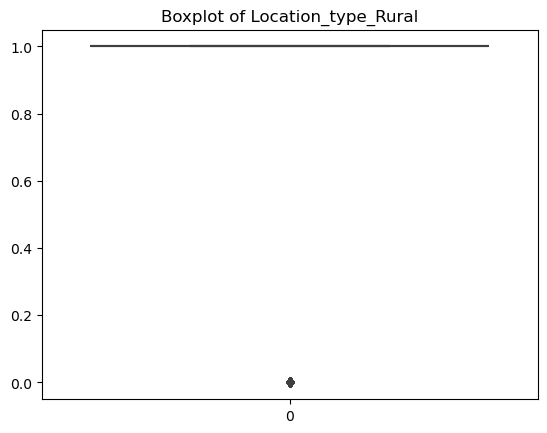

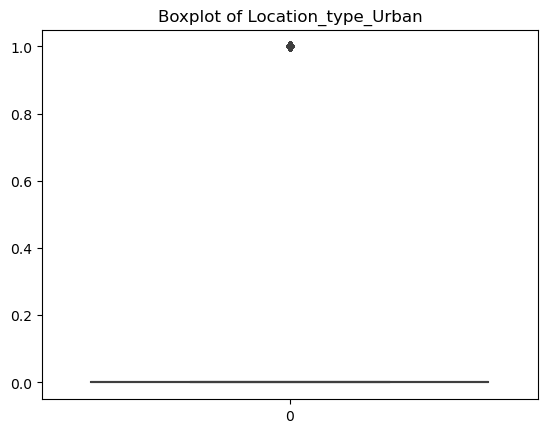

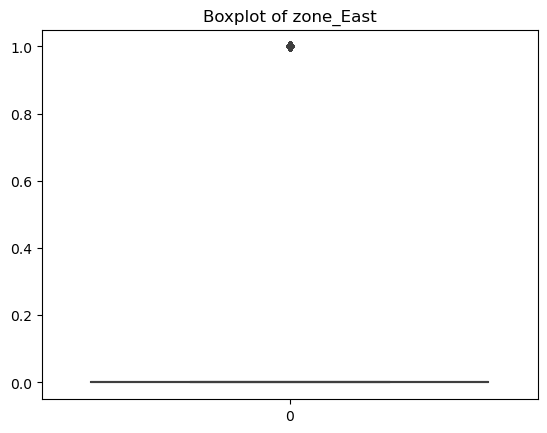

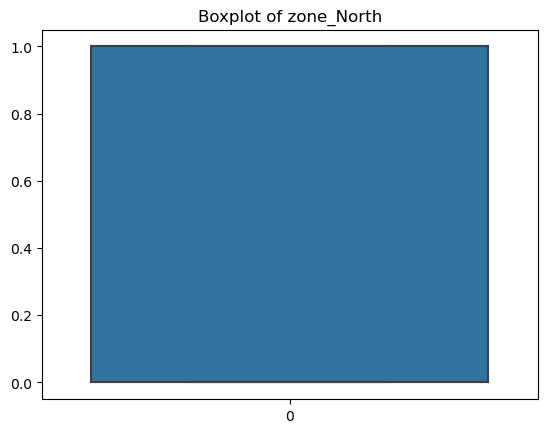

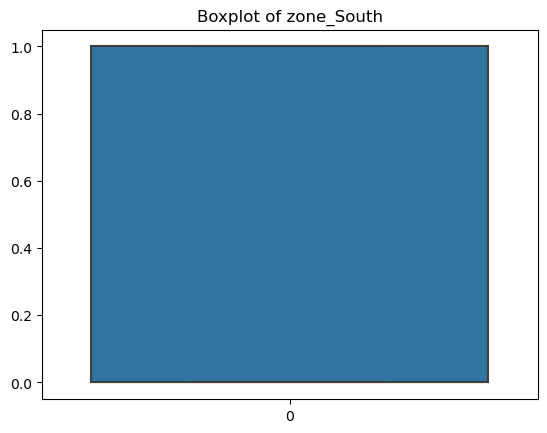

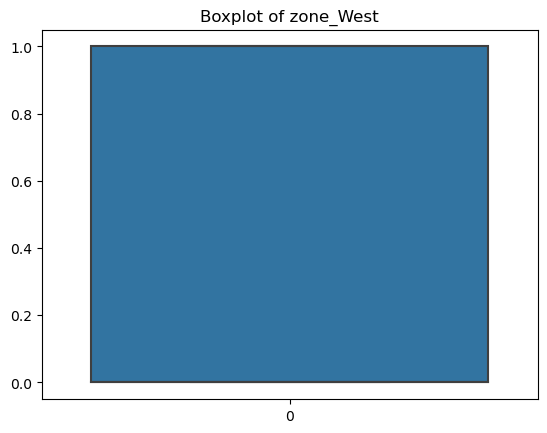

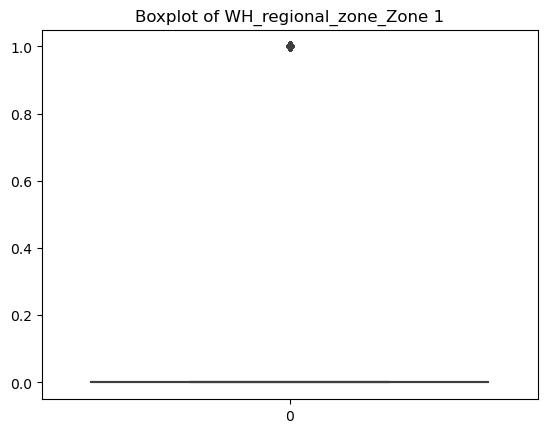

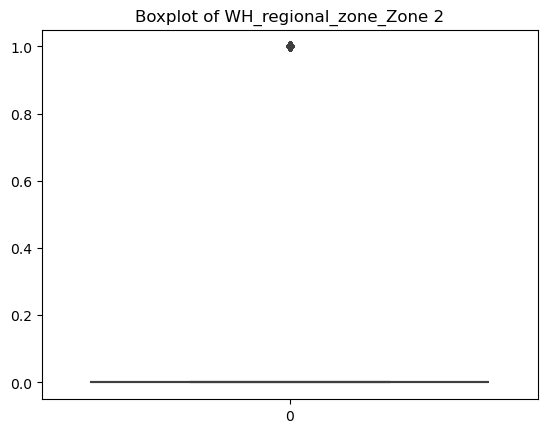

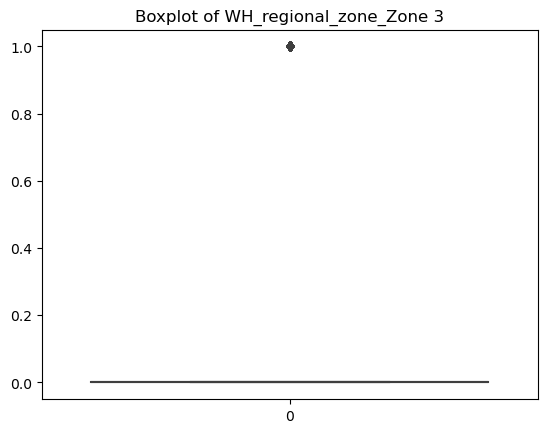

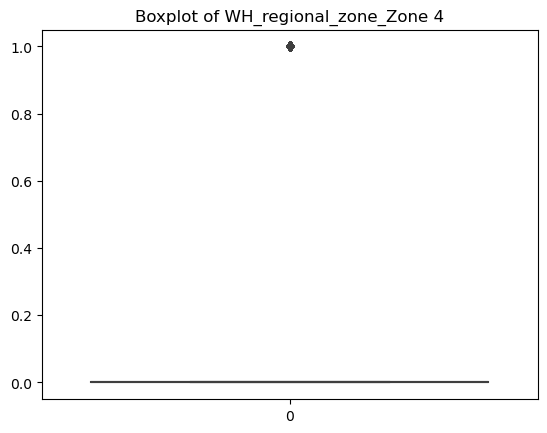

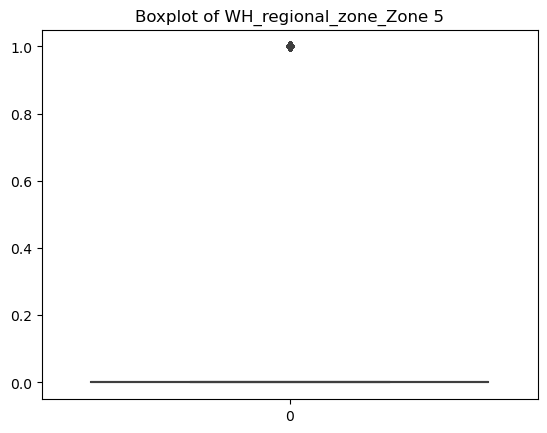

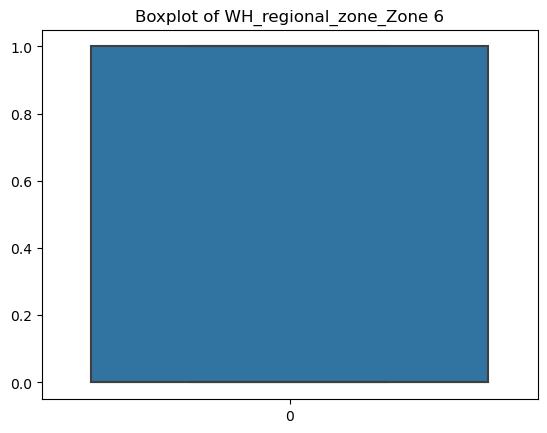

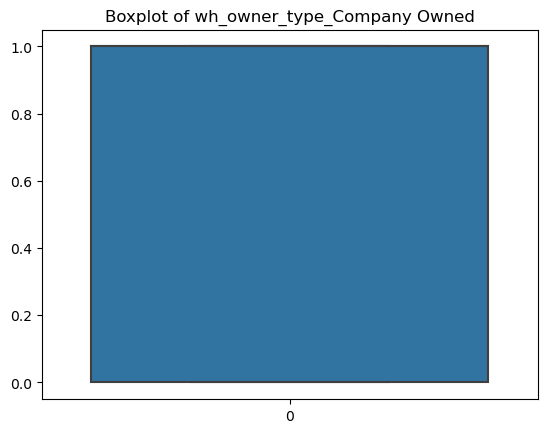

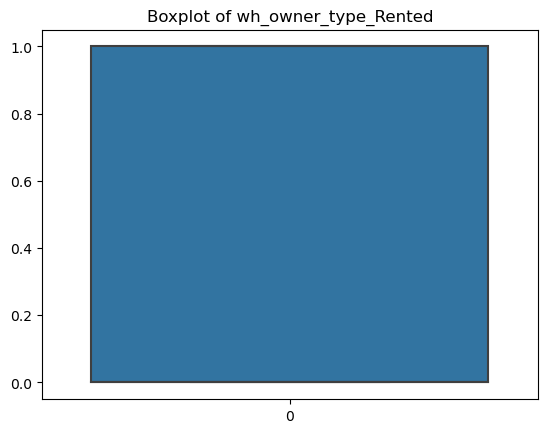

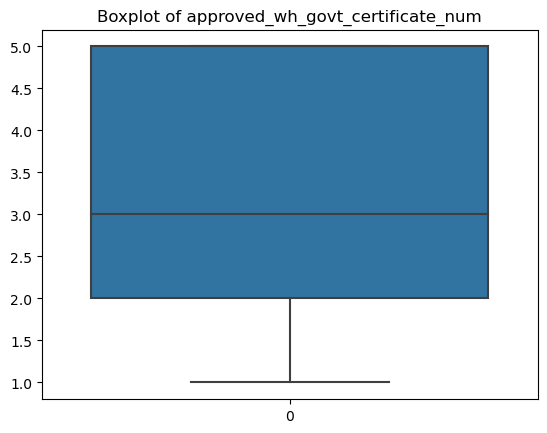

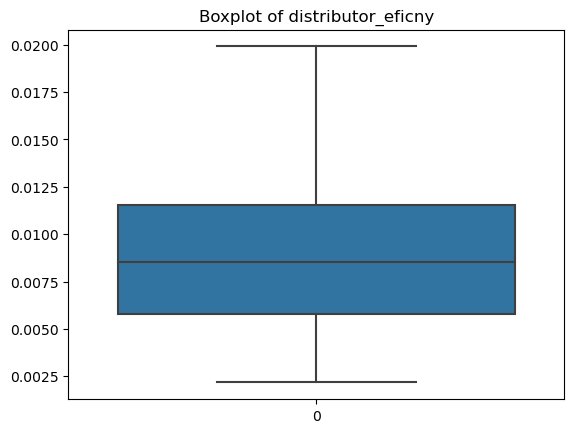

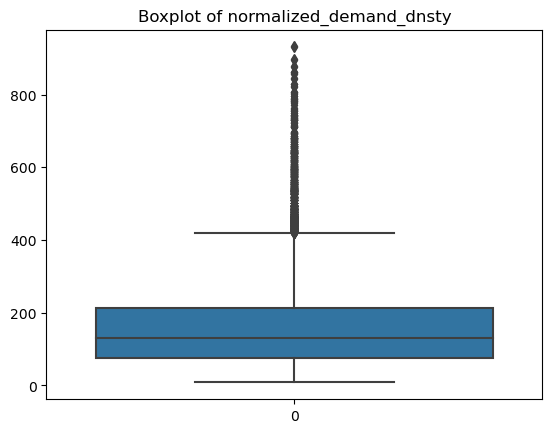

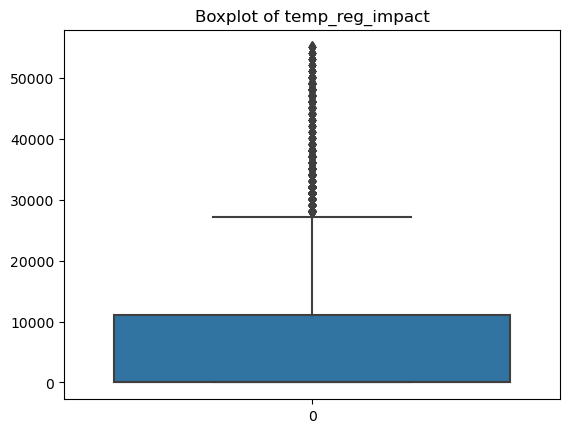

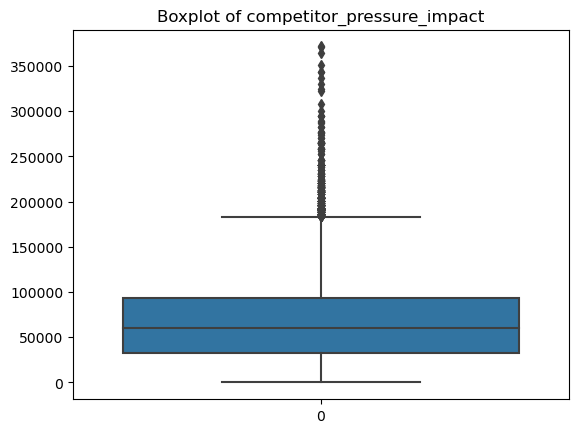

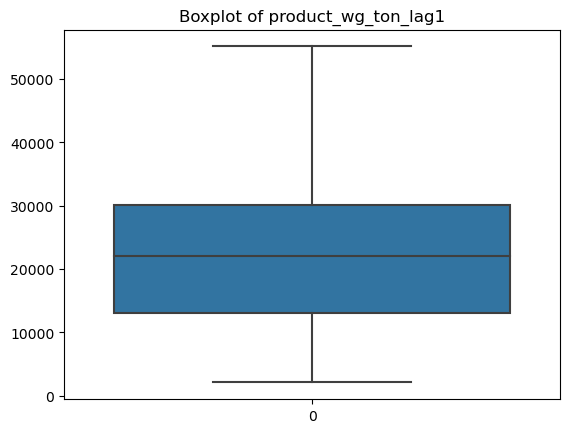

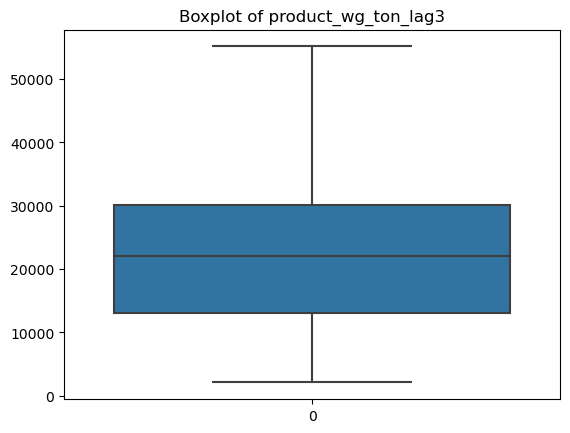

In [144]:
for col in columns_to_visualize:
    sns.boxplot(data=df2[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [145]:
df2[new_features].describe()

num_refill_transport  dist_from_hub_normalized  demand_density  \
count          16620.000000              16620.000000    16620.000000   
mean               1.469555                  0.502416       36.594793   
std                3.232767                  0.290283       19.310011   
min                0.000000                  0.000000       12.974170   
25%                0.000000                  0.250000       22.525087   
50%                0.000000                  0.504630       30.171255   
75%                0.000000                  0.754630       45.190157   
max               16.000000                  1.000000      125.709091   

       WH_Capacity_size_num  distribution_efficiency  Location_type_Rural  \
count          16620.000000             16620.000000         16620.000000   
mean               2.214019                22.441998             0.918893   
std                0.742726                13.851053             0.273008   
min                1.000000                 5.000000             0.000000   
25%                2.000000                12.666667             1.000000   
50%                2.000000                19.000000             1.000000   
75%                3.000000                28.000000             1.000000   
max                3.000000                70.000000             1.000000   

       Location_type_Urban     zone_East    zone_North    zone_South  ...  \
count         16620.000000  16620.000000  16620.000000  16620.000000  ...   
mean              0.081107      0.016667      0.409146      0.254091  ...   
std               0.273008      0.128023      0.491691      0.435362  ...   
min               0.000000      0.000000      0.000000      0.000000  ...   
25%               0.000000      0.000000      0.000000      0.000000  ...   
50%               0.000000      0.000000      0.000000      0.000000  ...   
75%               0.000000      0.000000      1.000000      1.000000  ...   
max               1.000000      1.000000      1.000000      1.000000  ...   

       WH_regional_zone_Zone 6  wh_owner_type_Company Owned  \
count             16620.000000                 16620.000000   
mean                  0.335018                     0.540012   
std                   0.472011                     0.498411   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     1.000000   
75%                   1.000000                     1.000000   
max                   1.000000                     1.000000   

       wh_owner_type_Rented  approved_wh_govt_certificate_num  \
count          16620.000000                      16620.000000   
mean               0.459988                          3.181709   
std                0.498411                          1.426863   
min                0.000000                          1.000000   
25%                0.000000                          2.000000   
50%                0.000000                          3.000000   
75%                1.000000                          5.000000   
max                1.000000                          5.000000   

       distributor_eficny  normalized_demand_dnsty  temp_reg_impact  \
count        16620.000000             16620.000000     16620.000000   
mean             0.008848               163.492008      7310.940132   
std              0.003758               125.295070     12857.462164   
min              0.002170                 7.907407         0.000000   
25%              0.005760                76.278080         0.000000   
50%              0.008554               130.817391         0.000000   
75%              0.011540               213.635861     11095.500000   
max              0.019909               932.157895     55151.000000   

       competitor_pressure_impact  product_wg_ton_lag1  product_wg_ton_lag3  
count                16620.000000         16620.000000         16620.000000  
mean       

In [146]:
df2['normalized_demand_dnsty']

0        188.076923
1         24.161905
2        143.708075
3        214.708738
4        214.919643
            ...    
16615     67.058333
16616    128.737805
16617    133.255924
16618    177.336134
16619    145.965517
Name: normalized_demand_dnsty, Length: 16620, dtype: float64

In [147]:
df2['normalized_demand_dnsty'].describe()

count    16620.000000
mean       163.492008
std        125.295070
min          7.907407
25%         76.278080
50%        130.817391
75%        213.635861
max        932.157895
Name: normalized_demand_dnsty, dtype: float64

In [148]:
upper_percentile = df2['normalized_demand_dnsty'].quantile(0.94)
df2['normalized_demand_dnsty_winsorized'] = df2['normalized_demand_dnsty'].clip(upper=upper_percentile)

<Axes: xlabel='normalized_demand_dnsty_winsorized'>

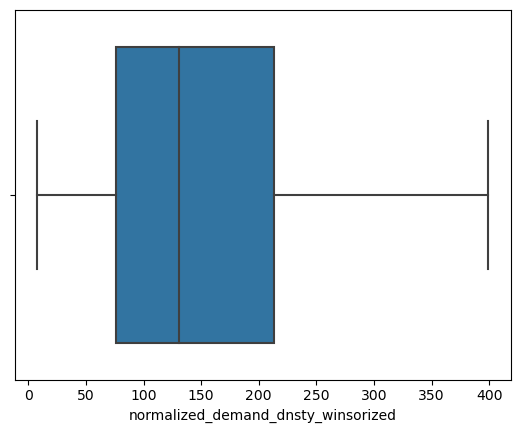

In [149]:
sns.boxplot(x=df2['normalized_demand_dnsty_winsorized'])

In [150]:
df2['normalized_demand_dnsty_winsorized'].describe()

count    16620.000000
mean       156.672361
std        105.017801
min          7.907407
25%         76.278080
50%        130.817391
75%        213.635861
max        399.211058
Name: normalized_demand_dnsty_winsorized, dtype: float64

In [151]:
upper_percentile = df2['temp_reg_impact'].quantile(0.88)
df2['temp_reg_impact_winsorized'] = df2['temp_reg_impact'].clip(upper=upper_percentile)

<Axes: xlabel='temp_reg_impact_winsorized'>

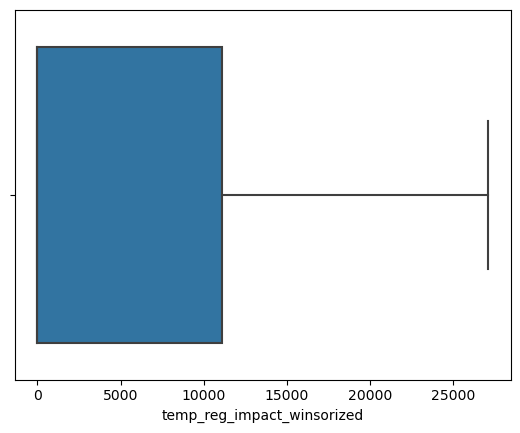

In [152]:
sns.boxplot(x=df2['temp_reg_impact_winsorized'])

In [153]:
df2['temp_reg_impact_winsorized'].describe()

count    16620.000000
mean      6244.182900
std      10305.177289
min          0.000000
25%          0.000000
50%          0.000000
75%      11095.500000
max      27118.440000
Name: temp_reg_impact_winsorized, dtype: float64

In [154]:
correlation = df2[['temp_reg_impact_winsorized', 'product_wg_ton']].corr().iloc[0,1]
correlation

0.30166686997235265

<Axes: xlabel='competitor_pressure_impact'>

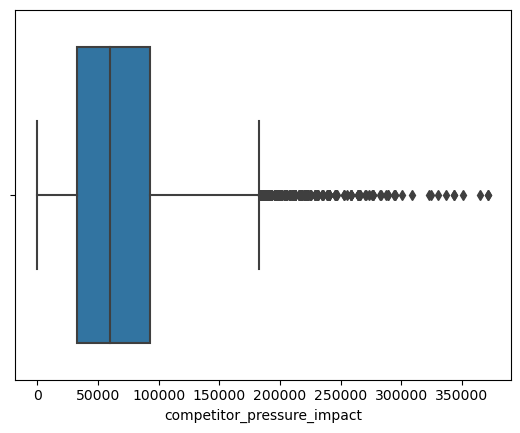

In [155]:
sns.boxplot(x=df2['competitor_pressure_impact'])

In [156]:
upper_percentile = df2['competitor_pressure_impact'].quantile(0.95)
df2['competitor_pressure_impact_winsorized'] = df2['competitor_pressure_impact'].clip(upper=upper_percentile)

<Axes: xlabel='competitor_pressure_impact_winsorized'>

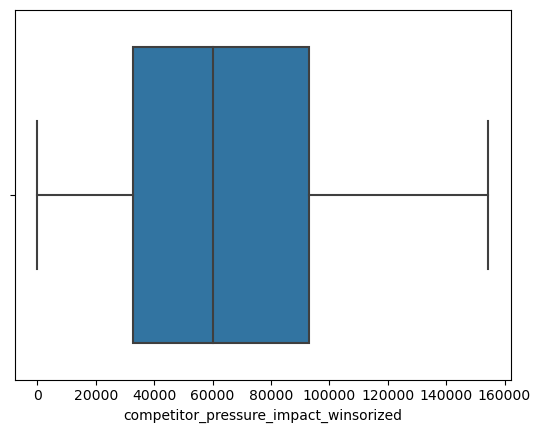

In [157]:
sns.boxplot(x=df2['competitor_pressure_impact_winsorized'])

In [158]:
correlation = df2[['competitor_pressure_impact_winsorized', 'product_wg_ton']].corr().iloc[0,1]
correlation

0.8133727654706338

In [159]:
# Columns to drop:

In [160]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_win

In [161]:
columns_to_drop = ['WH_capacity_size','approved_wh_govt_certificate']
df2.drop(columns=columns_to_drop, inplace=True)

In [162]:
# Location and zone feature assessment:

Location_type_Rural   -0.073229
Location_type_Urban    0.073229
zone_East              0.005121
zone_North             0.006363
zone_South            -0.009171
zone_West              0.000446
Name: product_wg_ton, dtype: float64


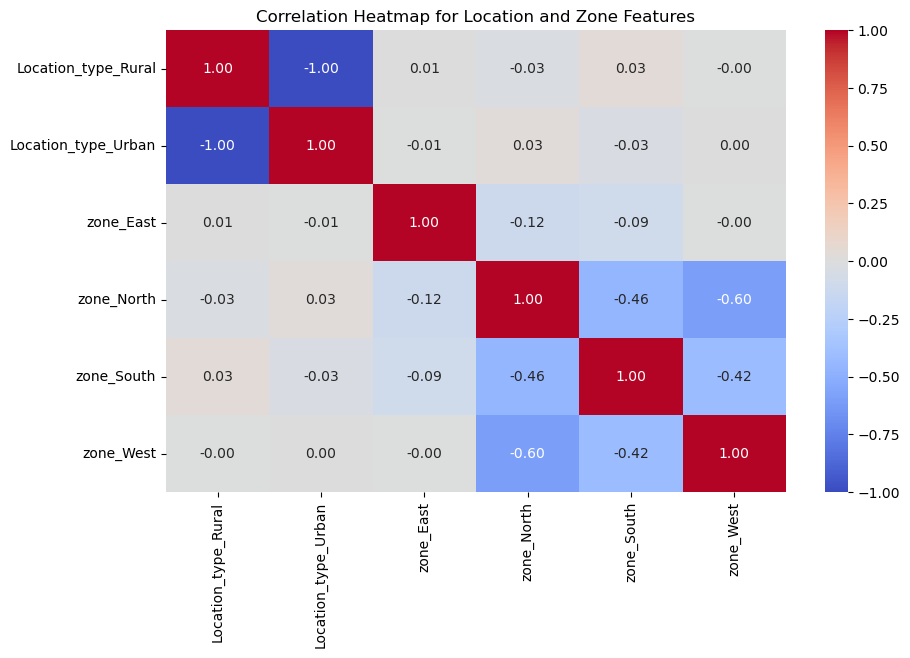

Low-Relevance Features: ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']


In [163]:
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['product_wg_ton']
location_zone_features = ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']
correlation_location_zone = correlation_with_target[location_zone_features]
print(correlation_location_zone)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[location_zone_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Location and Zone Features')
plt.show()

threshold = 0.1 
low_relevance_features = correlation_location_zone[abs(correlation_location_zone) < threshold].index.tolist()
print(f"Low-Relevance Features: {low_relevance_features}")


In [164]:
columns_to_drop = ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']
df2.drop(columns=columns_to_drop,inplace=True)

WH_regional_zone_Zone 1       -0.016277
WH_regional_zone_Zone 2        0.013382
WH_regional_zone_Zone 3       -0.004540
WH_regional_zone_Zone 4        0.007573
WH_regional_zone_Zone 5        0.005754
WH_regional_zone_Zone 6       -0.007436
wh_owner_type_Company Owned   -0.002207
wh_owner_type_Rented           0.002207
Name: product_wg_ton, dtype: float64


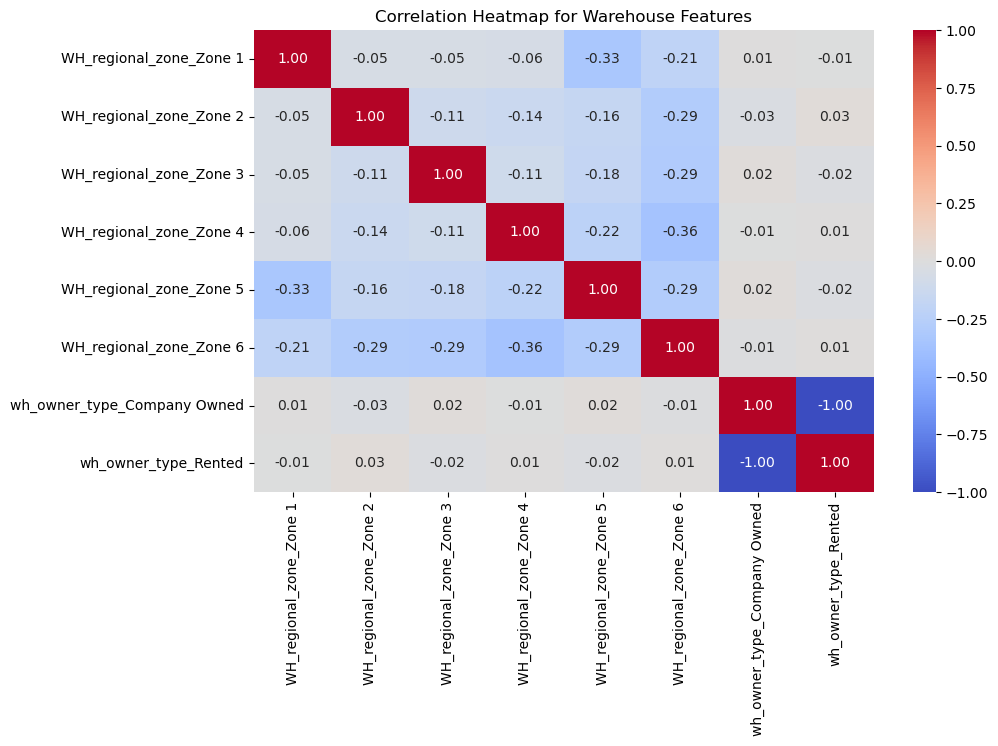

Low-Relevance Features: ['WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented']


In [165]:
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['product_wg_ton']

warehouse_features = ['WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                      'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented']

correlation_warehouse = correlation_with_target[warehouse_features]

print(correlation_warehouse)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[warehouse_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Warehouse Features')
plt.show()

threshold = 0.1 
low_relevance_features = correlation_warehouse[abs(correlation_warehouse) < threshold].index.tolist()

print(f"Low-Relevance Features: {low_relevance_features}")


In [166]:
columns_to_drop = ['WH_regional_zone_Zone 1','WH_regional_zone_Zone 3','WH_regional_zone_Zone 6','wh_owner_type_Company Owned', 'wh_owner_type_Rented']
df2.drop(columns=columns_to_drop,inplace=True)

In [167]:
def numeric_and_categorical_columns(df2):
    num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(df2)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']
Categorical columns are : []


In [168]:
numeric_features = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 
                    'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 
                    'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 
                    'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2', 
                    'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                    'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_winsorized', 
                    'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']

correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['product_wg_ton']


correlation_numeric = correlation_with_target[numeric_features]

print("Correlation of numeric features with 'product_wg_ton':")
print(correlation_numeric)

Correlation of numeric features with 'product_wg_ton':
num_refill_transport                    -0.087193
dist_from_hub_normalized                -0.011380
demand_density                           0.010155
WH_Capacity_size_num                     0.012596
distribution_efficiency                 -0.015095
distributor_eficny                       0.005255
normalized_demand_dnsty                  0.694541
temp_reg_impact                          0.382827
competitor_pressure_impact               0.794535
product_wg_ton_lag1                     -0.019917
product_wg_ton_lag3                     -0.008933
WH_regional_zone_Zone 2                  0.013382
WH_regional_zone_Zone 4                  0.007573
WH_regional_zone_Zone 5                  0.005754
approved_wh_govt_certificate_num        -0.228038
normalized_demand_dnsty_winsorized       0.725105
temp_reg_impact_winsorized               0.301667
competitor_pressure_impact_winsorized    0.813373
Name: product_wg_ton, dtype: float64


In [169]:
columns_to_drop = ['num_refill_transport','dist_from_hub_normalized','demand_density','WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 
                    'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2','WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                    'approved_wh_govt_certificate_num']
df2.drop(columns=columns_to_drop,inplace=True)

In [170]:
column_to_drop = ['temp_reg_impact','normalized_demand_dnsty','competitor_pressure_impact']
df2.drop(columns=column_to_drop, inplace=True)

In [171]:
df3 = df2.copy()

In [172]:
def numeric_and_categorical_columns(df3):
    num_cols = df3.select_dtypes(include=['float64', 'int64']).columns.tolist()
    return num_cols
num_columns = numeric_and_categorical_columns(df3)
print("Numerical Columns are :",num_columns)


Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'normalized_demand_dnsty_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']


In [173]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num_refill_req_l3m                     16620 non-null  int64  
 1   transport_issue_l1y                    16620 non-null  float64
 2   Competitor_in_mkt                      16620 non-null  float64
 3   distributor_num                        16620 non-null  int64  
 4   electric_supply                        16620 non-null  int64  
 5   dist_from_hub                          16620 non-null  int64  
 6   storage_issue_reported_l3m             16620 non-null  int64  
 7   temp_reg_mach                          16620 non-null  int64  
 8   wh_breakdown_l3m                       16620 non-null  int64  
 9   govt_check_l3m                         16620 non-null  int64  
 10  product_wg_ton                         16620 non-null  int64  
 11  re

## Feature Selection

In [174]:
# Implementing the feature selection

In [175]:
df3['competitor_pressure_impact_winsorized']

0         34230.00
1         20296.00
2         92548.00
3         44230.00
4         48142.00
           ...    
16615     96564.00
16616     42226.00
16617    112468.00
16618     63309.00
16619    154451.15
Name: competitor_pressure_impact_winsorized, Length: 16620, dtype: float64

In [176]:
X = df3.drop(columns=['product_wg_ton'])
y = df3['product_wg_ton']
correlation_matrix = X.corrwith(y)
high_corr_feature = correlation_matrix.abs().nlargest(10).index
# Mutual_ Informations :
mi_scores = mutual_info_regression(X,y)
mi_features = pd.Series(mi_scores,index=X.columns).nlargest(10).index

# Feature importance from Machine Learning:
rf = RandomForestRegressor()
rf.fit(X,y)
importance_scores =rf.feature_importances_
importance_features = pd.Series(importance_scores, index=X.columns).nlargest(10).index
selected_features = set(high_corr_feature) | set(mi_features)| set(importance_features)
print("Selected Features :", selected_features)

Selected Features : {'temp_reg_mach', 'wh_breakdown_l3m', 'storage_issue_reported_l3m', 'temp_reg_impact_winsorized', 'workers_num_winsorized', 'retail_shop_num_winsorized', 'competitor_pressure_impact_winsorized', 'govt_check_l3m', 'transport_issue_l1y', 'distributor_num', 'dist_from_hub', 'num_refill_req_l3m', 'normalized_demand_dnsty_winsorized', 'Competitor_in_mkt'}


In [177]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num_refill_req_l3m                     16620 non-null  int64  
 1   transport_issue_l1y                    16620 non-null  float64
 2   Competitor_in_mkt                      16620 non-null  float64
 3   distributor_num                        16620 non-null  int64  
 4   electric_supply                        16620 non-null  int64  
 5   dist_from_hub                          16620 non-null  int64  
 6   storage_issue_reported_l3m             16620 non-null  int64  
 7   temp_reg_mach                          16620 non-null  int64  
 8   wh_breakdown_l3m                       16620 non-null  int64  
 9   govt_check_l3m                         16620 non-null  int64  
 10  product_wg_ton                         16620 non-null  int64  
 11  re

In [178]:
columns_to_drop = ['cleaned_flood_proof','cleaned_flood_impacted']
df3.drop(columns=columns_to_drop, inplace=True)

In [179]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num_refill_req_l3m                     16620 non-null  int64  
 1   transport_issue_l1y                    16620 non-null  float64
 2   Competitor_in_mkt                      16620 non-null  float64
 3   distributor_num                        16620 non-null  int64  
 4   electric_supply                        16620 non-null  int64  
 5   dist_from_hub                          16620 non-null  int64  
 6   storage_issue_reported_l3m             16620 non-null  int64  
 7   temp_reg_mach                          16620 non-null  int64  
 8   wh_breakdown_l3m                       16620 non-null  int64  
 9   govt_check_l3m                         16620 non-null  int64  
 10  product_wg_ton                         16620 non-null  int64  
 11  re

In [180]:
X = df3.drop(columns=['product_wg_ton'])
y = df3['product_wg_ton']
correlation_matrix = X.corrwith(y)
high_corr_feature = correlation_matrix.abs().nlargest(10).index
# Mutual_ Informations :
mi_scores = mutual_info_regression(X,y)
mi_features = pd.Series(mi_scores,index=X.columns).nlargest(10).index

# Feature importance from Machine Learning:
rf = RandomForestRegressor()
rf.fit(X,y)
importance_scores =rf.feature_importances_
importance_features = pd.Series(importance_scores, index=X.columns).nlargest(10).index
selected_features = set(high_corr_feature) | set(mi_features)| set(importance_features)
print("Selected Features :", selected_features)

Selected Features : {'temp_reg_mach', 'wh_breakdown_l3m', 'storage_issue_reported_l3m', 'temp_reg_impact_winsorized', 'workers_num_winsorized', 'retail_shop_num_winsorized', 'competitor_pressure_impact_winsorized', 'govt_check_l3m', 'transport_issue_l1y', 'distributor_num', 'dist_from_hub', 'num_refill_req_l3m', 'normalized_demand_dnsty_winsorized', 'Competitor_in_mkt'}


In [181]:
# More about Selected_features:

In [182]:
selected_features = ['Competitor_in_mkt', 'temp_reg_mach', 'transport_issue_l1y', 'retail_shop_num_winsorized', 
                     'dist_from_hub', 'workers_num_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized', 'storage_issue_reported_l3m', 'distributor_num', 
                     'wh_breakdown_l3m', 'govt_check_l3m', 'normalized_demand_dnsty_winsorized', 'num_refill_req_l3m']


df3_selected = df3[selected_features]

print(df3_selected.describe())


       Competitor_in_mkt  temp_reg_mach  transport_issue_l1y  \
count       16620.000000   16620.000000         16620.000000   
mean            3.083153       0.306137             0.357762   
std             1.100768       0.460901             0.634600   
min             0.000000       0.000000             0.000000   
25%             2.000000       0.000000             0.000000   
50%             3.000000       0.000000             0.000000   
75%             4.000000       1.000000             1.000000   
max             7.000000       1.000000             2.000000   

       retail_shop_num_winsorized  dist_from_hub  workers_num_winsorized  \
count                16620.000000   16620.000000            16620.000000   
mean                  4958.719976     163.521901               28.633032   
std                    898.251259      62.701193                6.588864   
min                   3516.000000      55.000000               18.000000   
25%                   4309.000000     109.0

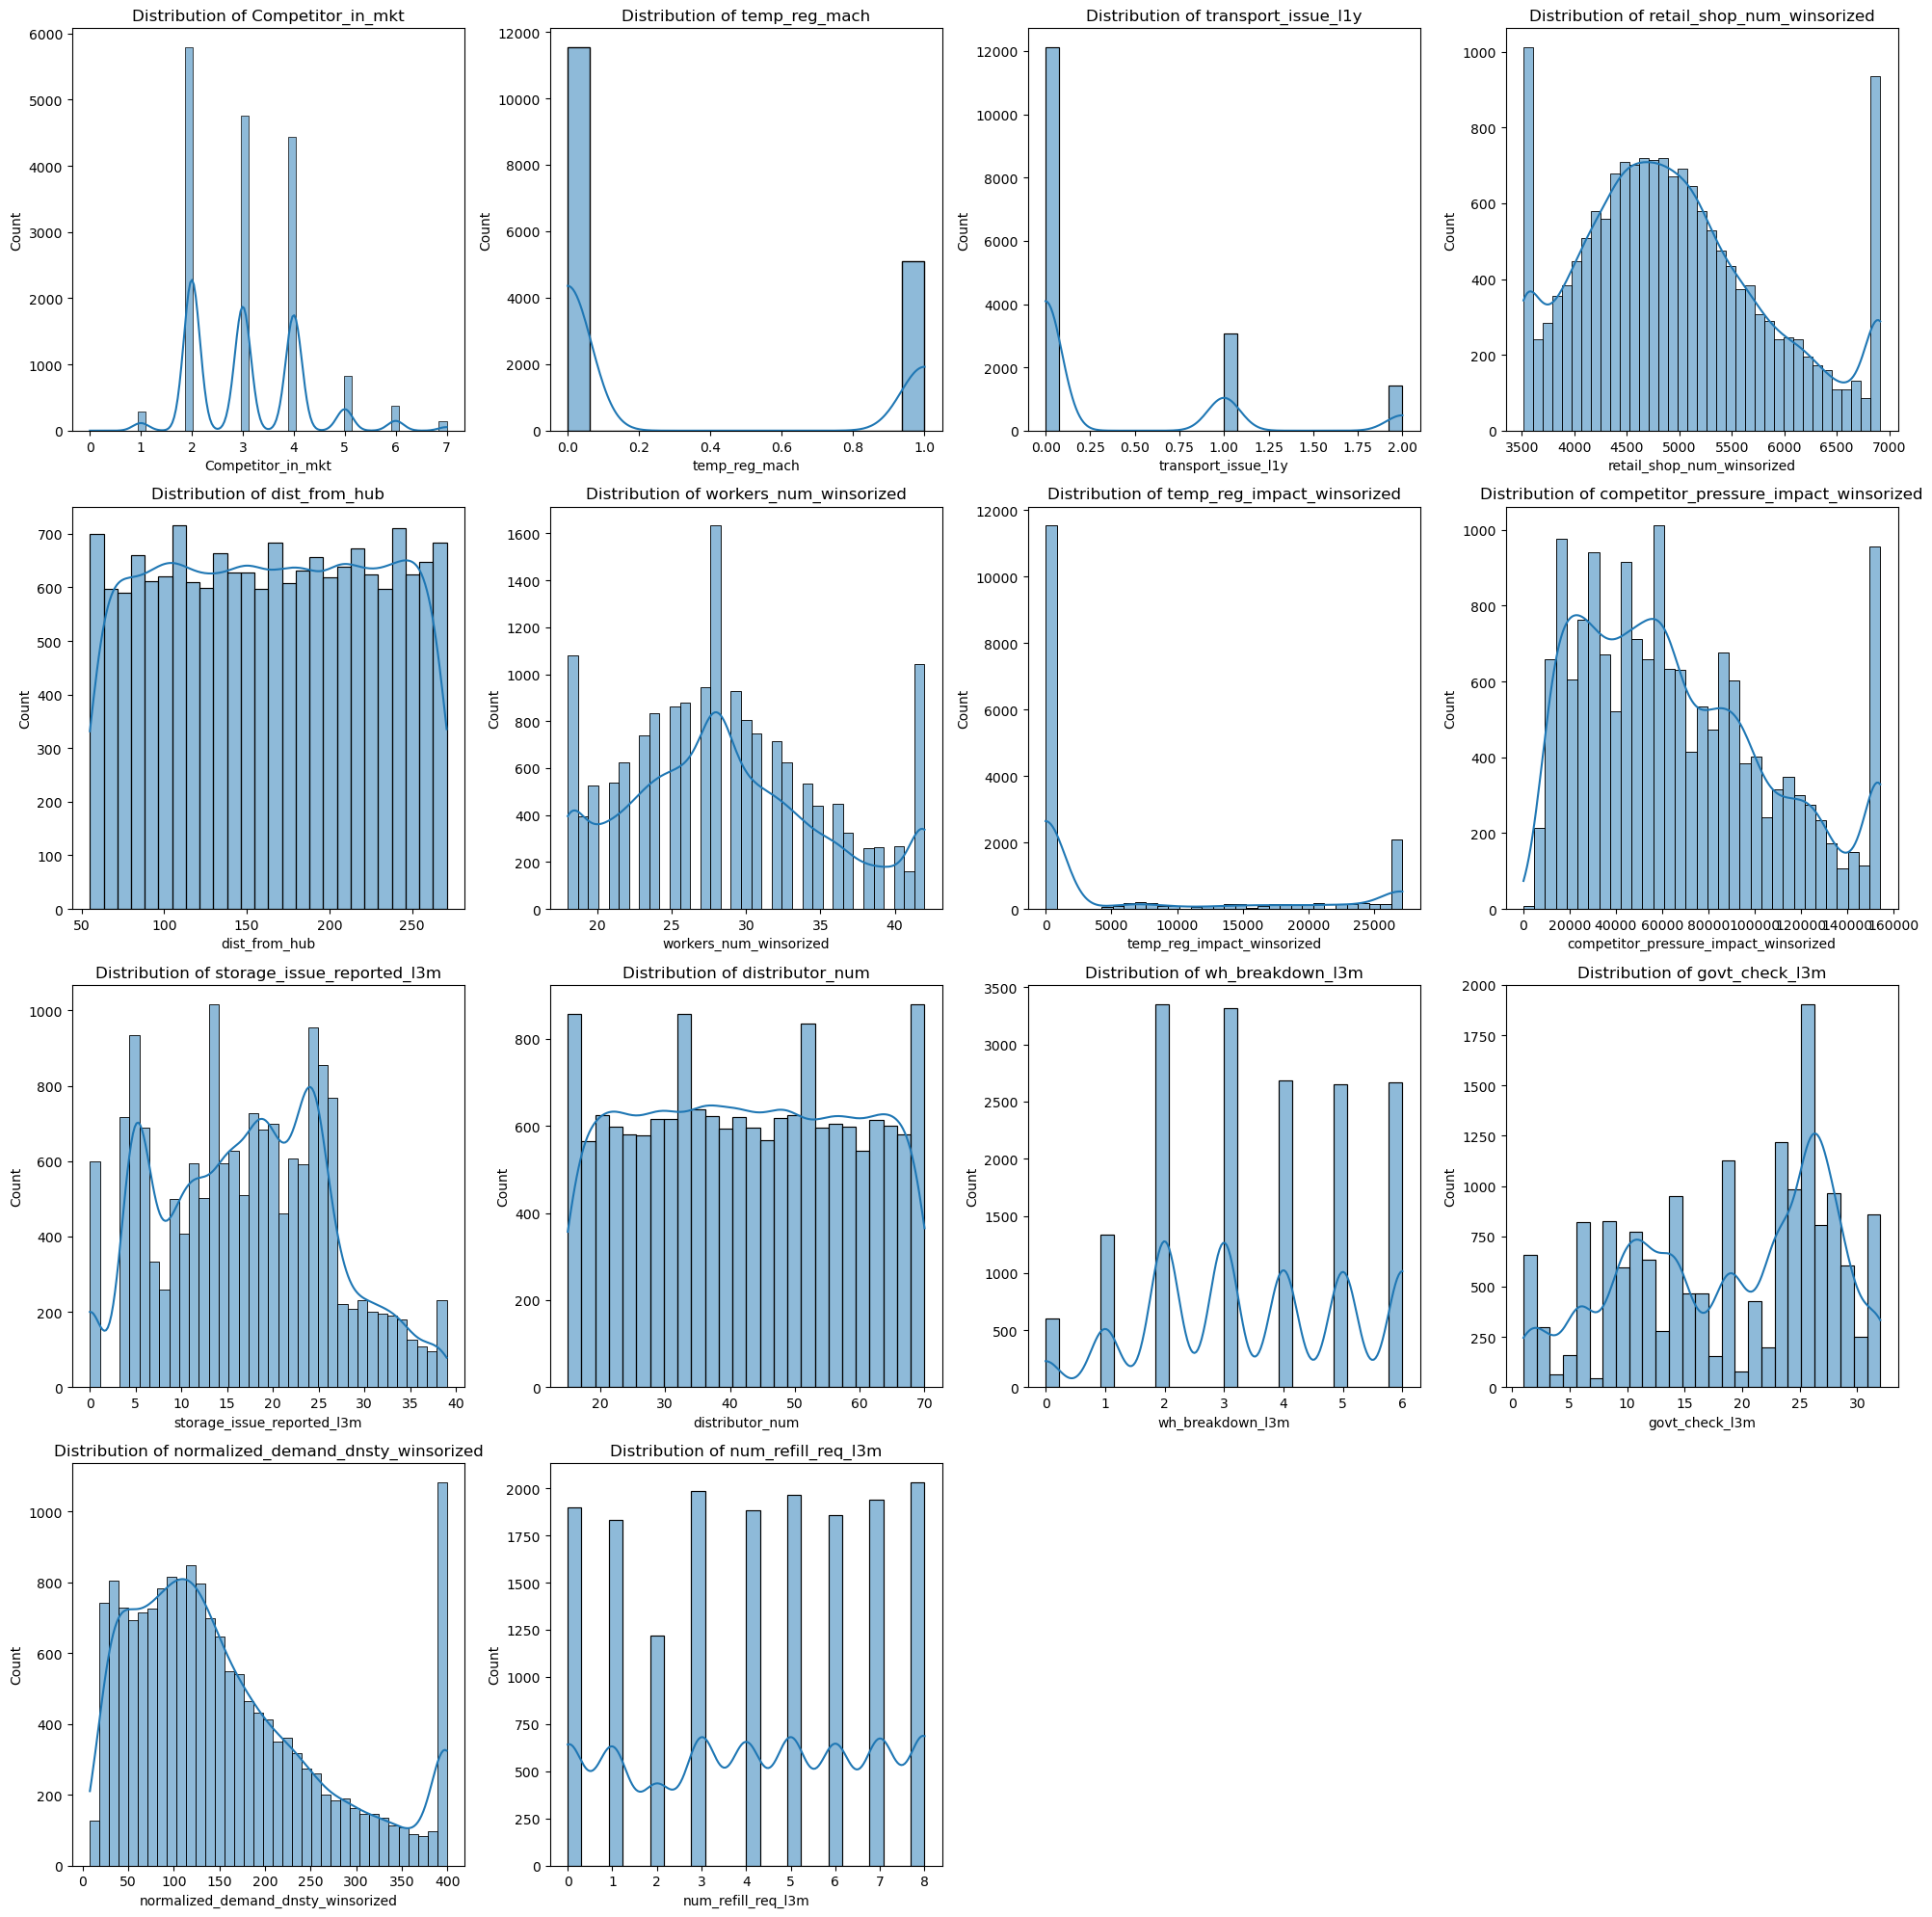

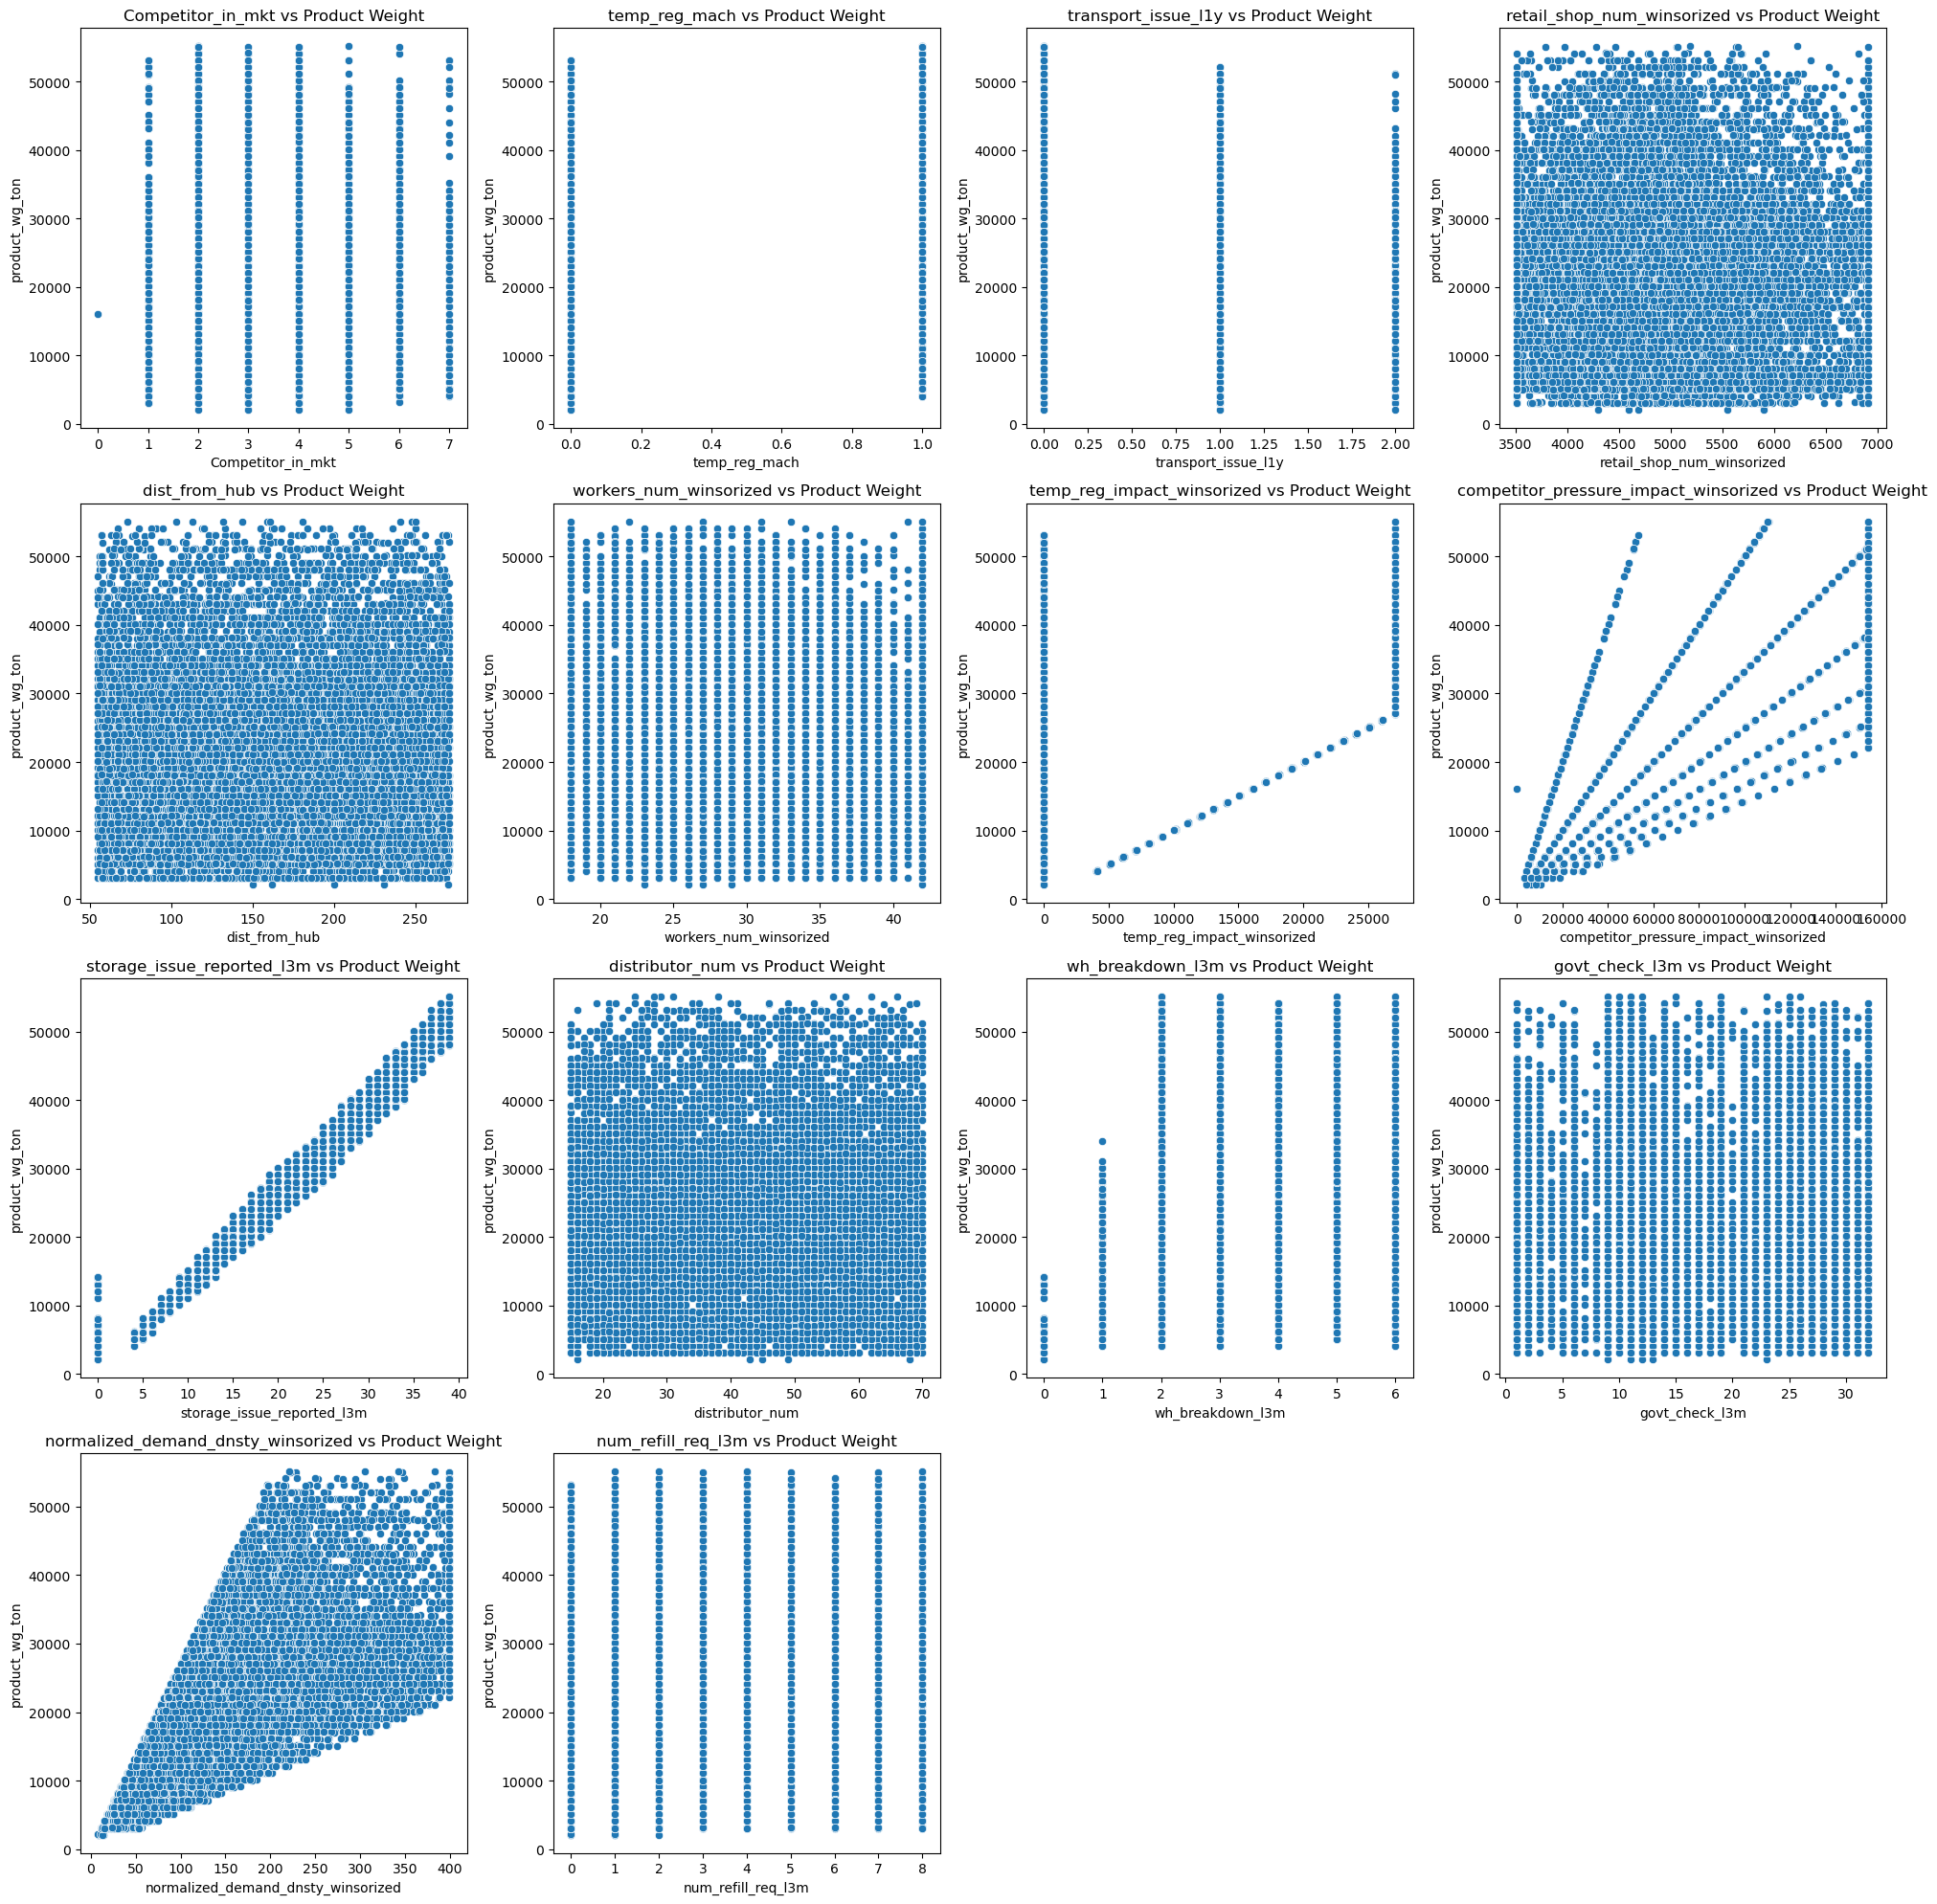

In [183]:
import math

num_features = len(selected_features)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

plt.figure(figsize=(5 * num_cols, 5 * num_rows))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df3_selected[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(5 * num_cols, 5 * num_rows))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=feature, y='product_wg_ton', data=df3)
    plt.title(f'{feature} vs Product Weight')
plt.tight_layout()
plt.show()


## Model Building and Evaluate the Model:

In [184]:
X = df3_selected[selected_features]
y = df3['product_wg_ton']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [185]:
# Linear Regression

In [186]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model

mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)

Linear Regression MSE: 2577014.518433611


In [187]:
# 2) Random Forest Regression

In [188]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)


Random Forest Regression MSE: 337373.5110375151


In [189]:
# 3) Gradient Boosting Regression:

In [190]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)

Gradient Boosting Regression MSE: 1251340.3867840546


In [191]:
# 4) Support Vector Regression

In [194]:

svr_reg = make_pipeline(StandardScaler(), SVR())
svr_reg.fit(X_train, y_train)

y_pred_svr = svr_reg.predict(X_test)

# Evaluate the model:-
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Support Vector Regression MSE:", mse_svr)


Support Vector Regression MSE: 124235235.57699993


In [195]:
# 5) Decision Tree Regression

In [196]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regression MSE:", mse_dt)


Decision Tree Regression MSE: 699424.7566185319


In [197]:
# Identifying the lowest MSE

In [198]:
models = ['Linear Regression','Random Forest Regression', 'Gradient Boosting Regression','Support Vector Regression','Decision Tree Regression']
mse_values =[2577014.5184334796,343745.70943571,1250793.1221198733,124235235.57699993,691377.7367629362]
best_model_index = mse_values.index(min(mse_values))
best_model_name = models[best_model_index]
print(f" The best performing model is {best_model_name} with a MSE of {min(mse_values)}")

 The best performing model is Random Forest Regression with a MSE of 343745.70943571


In [199]:
# Visualize MSE Values:

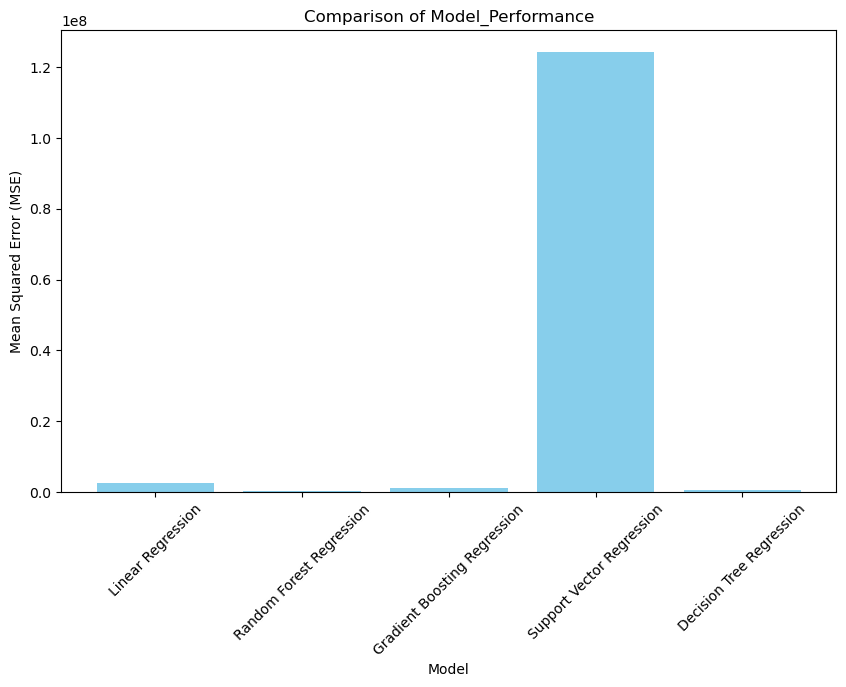

In [200]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model_Performance')
plt.xticks(rotation=45)
plt.show()

From the above graphical representation :
It is clear that Random Forest Regression has lowest Mean Squared Error

In [201]:
# Cross Validation:

In [202]:
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
svm_model = SVR()
decision_tree_model = DecisionTreeRegressor()
models = {
    'Linear Regression': linear_regression_model,
    'Random Forest Regression': random_forest_model,
    'Gradient Boosting Regression': gradient_boosting_model,
    'Support Vector Regression': svm_model,
    'Decision Tree Regression': decision_tree_model
}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse_cv = -cv_scores.mean()
    print(f"{model_name} MSE using cross-validation:", avg_mse_cv)

Linear Regression MSE using cross-validation: 2605422.454173173
Random Forest Regression MSE using cross-validation: 366271.8049984838
Gradient Boosting Regression MSE using cross-validation: 1323011.494558104
Support Vector Regression MSE using cross-validation: 103304864.38219415
Decision Tree Regression MSE using cross-validation: 613916.0726233454


# Visualisation and Further insights

In [203]:
# Visualize Predicted Vs Actual Values:

In [204]:
def extract_model_info(model, X):
    if isinstance(model, LinearRegression):
        
        coef_names = list(zip(model.coef_, X.columns))
        coef_names.sort(reverse=True, key=lambda x: abs(x[0]))  
        print("Top 5 influential features for Linear Regression:")
        for coef, name in coef_names[:5]:
            print(f"{name}: {coef}")

    elif isinstance(model, RandomForestRegressor):
        
        feature_importance = model.feature_importances_
        importance_df3 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
        importance_df3 = importance_df3.sort_values(by='Importance', ascending=False)
        print("\nTop 5 influential features for Random Forest Regression:")
        print(importance_df3.head())
X = df3_selected[selected_features]
y = df3['product_wg_ton']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

extract_model_info(linear_reg, X)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
extract_model_info(rf_reg, X)


Top 5 influential features for Linear Regression:
storage_issue_reported_l3m: 1004.5053193271759
Competitor_in_mkt: -906.6719265707926
temp_reg_mach: -585.0308318038537
transport_issue_l1y: -278.7769778216391
wh_breakdown_l3m: -201.50937567431157

Top 5 influential features for Random Forest Regression:
                                  Feature  Importance
8              storage_issue_reported_l3m    0.981360
7   competitor_pressure_impact_winsorized    0.009042
6              temp_reg_impact_winsorized    0.003695
0                       Competitor_in_mkt    0.001960
12     normalized_demand_dnsty_winsorized    0.000798


In [205]:
models = {
    'linear_reg': linear_reg,
    'rf_reg': rf_reg,
    'gb_reg': gb_reg,
    'svr_reg': svr_reg,
    'dt_reg': dt_reg
}

for model_name, model in models.items():
    with open(f'{model_name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

In [206]:
df3.to_csv("cleaned_trained_dataset_.csv", index=False)

In [207]:
models = {
    'linear_reg': linear_reg,
    'rf_reg': rf_reg,
    'gb_reg': gb_reg,
    'svr_reg': svr_reg,
    'dt_reg': dt_reg
}

for model_name, model in models.items():
    with open(f'{model_name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

In [213]:
loaded_models = {}


model_names = ['linear_reg', 'rf_reg', 'gb_reg', 'svr_reg', 'dt_reg']

for model_name in model_names:
    
    with open(f'{model_name}_model.pkl', 'rb') as file:
        
        loaded_model = pickle.load(file)
        
        loaded_models[model_name] = loaded_model

# Loading Test Dataset

In [209]:
test_df = pd.read_csv('supply_test.csv')

In [210]:
test_df.head(3)

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0       16621     WH_116621     EID_66621         Rural            Large   
1       16622     WH_116622     EID_66622         Rural            Large   
2       16623     WH_116623     EID_66623         Rural            Small   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0  North           Zone 5                   5                    0   
1  North           Zone 5                   5                    0   
2  North           Zone 6                   3                    0   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  3  ...                0           156         30.0   
1                  2  ...                1            79         31.0   
2                  3  ...                1            70         41.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0       2006.0                          24              0   
1       2019.0                           5              1   
2       2008.0                          19              1   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 2               5   
1                             C                 2              24   
2                            A+                 5               9   

   product_wg_ton  
0           30132  
1            6075  
2           24076  

[3 rows x 25 columns]

In [211]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [212]:
test_df['wh_est_year'].unique()

array([2006., 2019., 2008., 2017., 1999.,   nan, 2015., 2022., 2004.,
       2007., 2002., 2016., 2018., 2020., 2014., 2013., 2021., 2010.,
       2011., 1997., 2009., 2000., 1998., 2012., 2001., 2003., 2005.,
       2023., 1996.])

In [213]:
columns_to_drop = ['Ware_house_ID','WH_Manager_ID','wh_est_year','Unnamed: 0']

In [214]:
test_df.drop(columns = columns_to_drop,inplace=True)

In [215]:
test_df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count         5529.000000          5529.000000        5529.000000   
mean             4.007235             0.765600           3.106167   
std              2.604325             1.187567           1.128396   
min              0.000000             0.000000           1.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000           9.000000   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
count      5529.000000      5529.000000     5529.000000  5529.000000   
mean       4980.695424        42.128052        0.104178     0.049919   
std        1049.617325        15.959934        0.305519     0.217797   
min        1953.000000        15.000000        0.000000     0.000000   
25%        4310.000000        28.000000        0.000000     0.000000   
50%        4863.000000        42.000000        0.000000     0.000000   
75%        5492.000000        56.000000        0.000000     0.000000   
max       10846.000000        70.000000        1.000000     1.000000   

       electric_supply  dist_from_hub  workers_num  \
count      5529.000000    5529.000000  5319.000000   
mean          0.657262     163.899982    29.010528   
std           0.474668      62.544704     7.848478   
min           0.000000      55.000000    10.000000   
25%           0.000000     110.000000    24.000000   
50%           1.000000     165.000000    28.000000   
75%           1.000000     218.000000    33.000000   
max           1.000000     271.000000    98.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                 5529.000000    5529.000000       5529.000000   
mean                    17.085549       0.298426          3.477302   
std                      9.206551       0.457609          1.700717   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     17.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count     5529.000000     5529.000000  
mean        18.892205    22052.334599  
std          8.716737    11645.738485  
min          1.000000     2065.000000  
25%         11.000000    12143.000000  
50%         21.000000    22099.000000  
75%         26.000000    30099.000000  
max         32.000000    55144.000000

In [216]:
# Imputing median to the workers_num

In [217]:
col_name = 'workers_num'
median_value = test_df['workers_num'].median()
print(median_value)

28.0


In [218]:
test_df['workers_num'] = test_df['workers_num'].fillna(median_value)

In [219]:
# Remove the 'nan' row from the variable(approved_wh_govt_certificate) by imputing it with mode value
# Check the number of entries in 'approved_wh_govt_certificate'

In [220]:
unique_entries = test_df['approved_wh_govt_certificate'].nunique()
print(f"No.of unique entries in 'approved_wh_govt_certificate' colmn : {unique_entries}")

No.of unique entries in 'approved_wh_govt_certificate' colmn : 5


In [221]:
len(test_df['approved_wh_govt_certificate'])

5529

In [222]:
len(test_df['govt_check_l3m'])

5529

In [223]:
test_df['approved_wh_govt_certificate'].unique()

array(['A', 'C', 'A+', 'B', 'B+', nan], dtype=object)

In [224]:
mode_value = test_df['approved_wh_govt_certificate'].mode()[0]
print(mode_value)

C


In [225]:
test_df['approved_wh_govt_certificate'].fillna(mode_value, inplace=True)

In [226]:
test_df['approved_wh_govt_certificate'].unique()

array(['A', 'C', 'A+', 'B', 'B+'], dtype=object)

In [227]:
test_df['approved_wh_govt_certificate'].describe()

count     5529
unique       5
top          C
freq      1426
Name: approved_wh_govt_certificate, dtype: object

## Exploratory Analysis

In [228]:
# Analysis of distribution:

In [229]:
# List of numeric and categorical variable

In [230]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols

In [231]:
num_cols, cat_cols = numeric_and_categorical_columns(test_df)
print(f"Numerical Columns : {num_cols}")
print(f"Categorical Columns : {cat_cols}")

Numerical Columns : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']
Categorical Columns : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


In [232]:
# Preliminary Analysis

In [233]:
num_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
              'flood_impacted','flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 
              'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

In [234]:
cat_columns = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

In [235]:
# subset the dataframe with the selected columns:

In [236]:
selected_test_df =test_df[num_columns + cat_columns]

In [237]:
# Descriptive statistics for the numerical columns are given by:

In [238]:
Num_statistics = selected_test_df[num_columns].describe()
print(Num_statistics)

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count         5529.000000          5529.000000        5529.000000   
mean             4.007235             0.765600           3.106167   
std              2.604325             1.187567           1.128396   
min              0.000000             0.000000           1.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000           9.000000   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
count      5529.000000      5529.000000     5529.000000  5529.000000   
mean       4980.695424        42.128052        0.104178     0.049919   
std        1049.617325        15.959934        0.305519     0.217797   
min        1953.000000        15.000000        0.000000     0.000000   
25%        4310.00

In [239]:
# Visualize the distribution of numerical columns:

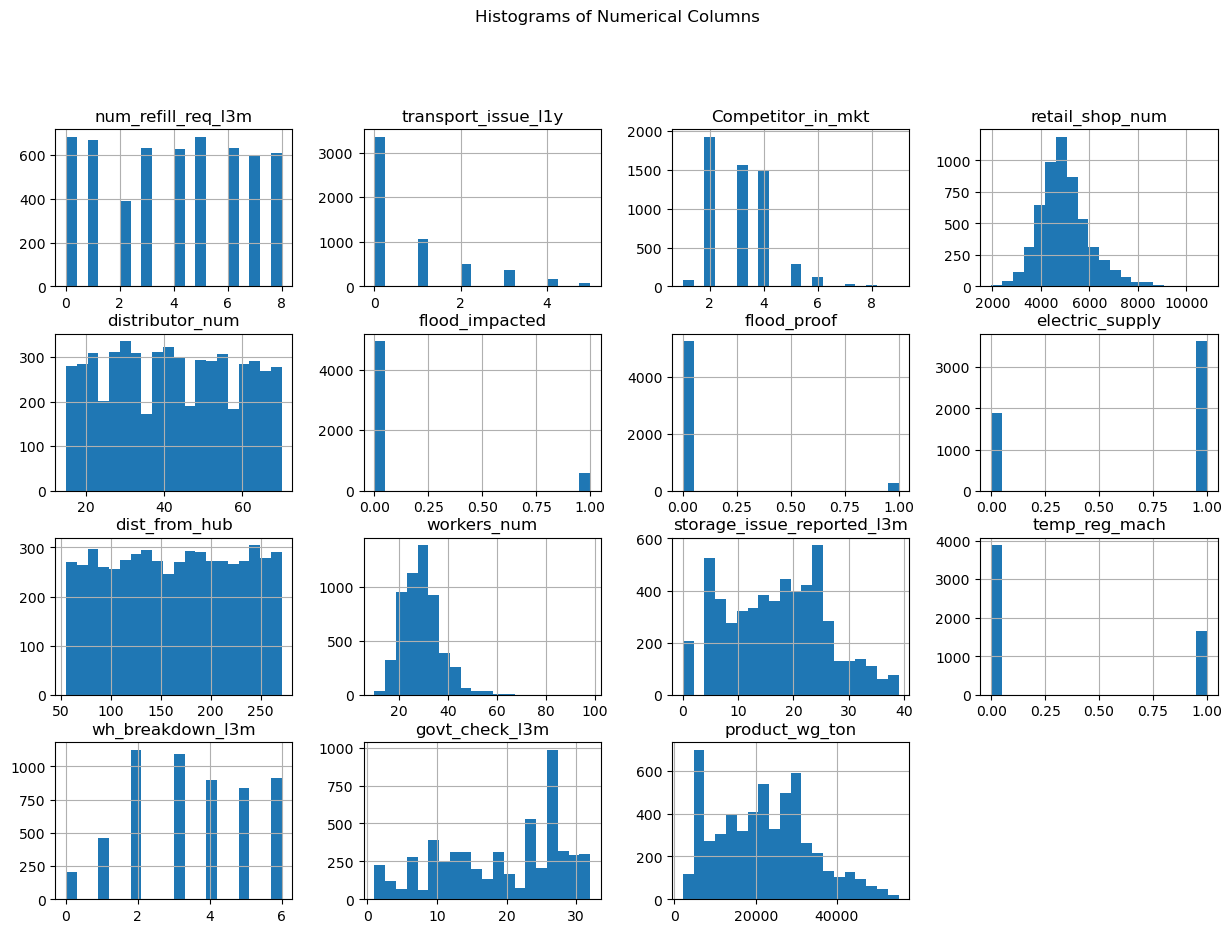

In [240]:
selected_test_df[num_columns].hist(bins=20,figsize=(15,10))
plt.suptitle('Histograms of Numerical Columns', y= 1.00)
plt.show()

In [241]:
# Create box plots for each num columns:

In [242]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print(num_cols)
print(cat_cols)

['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']
['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


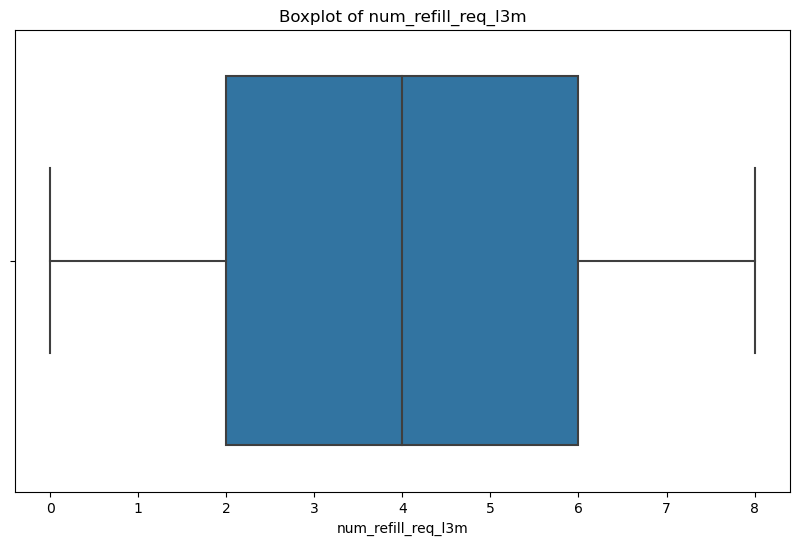

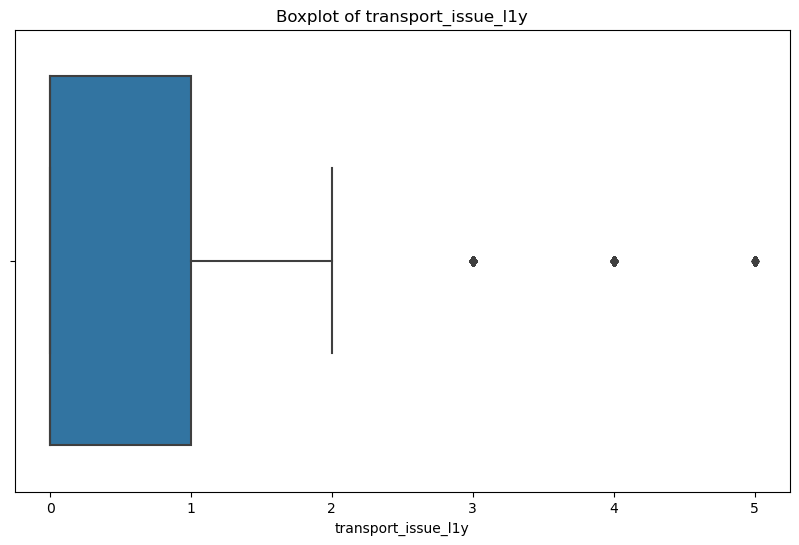

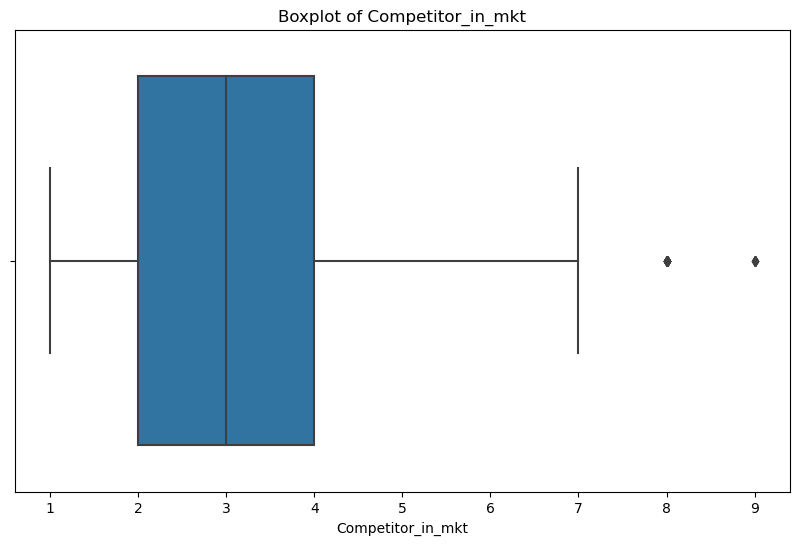

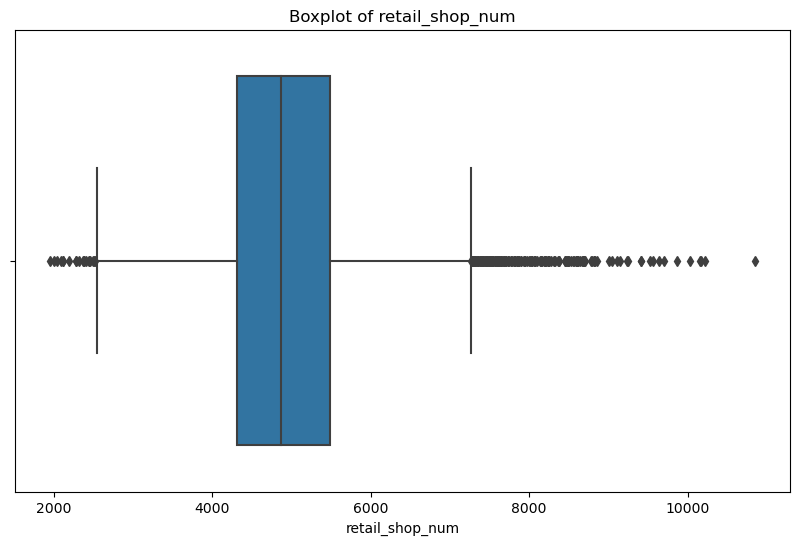

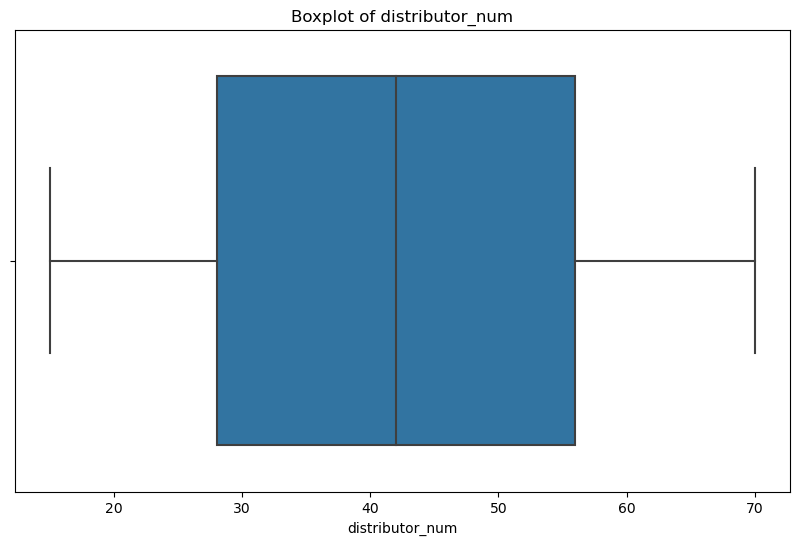

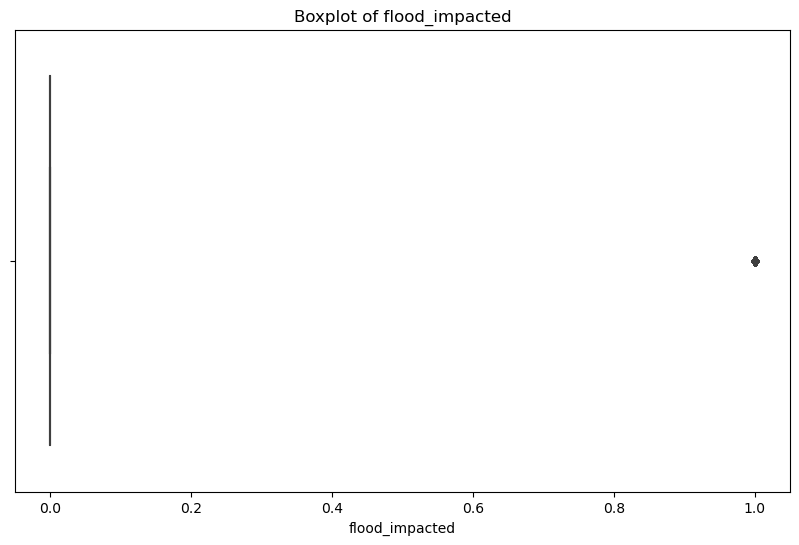

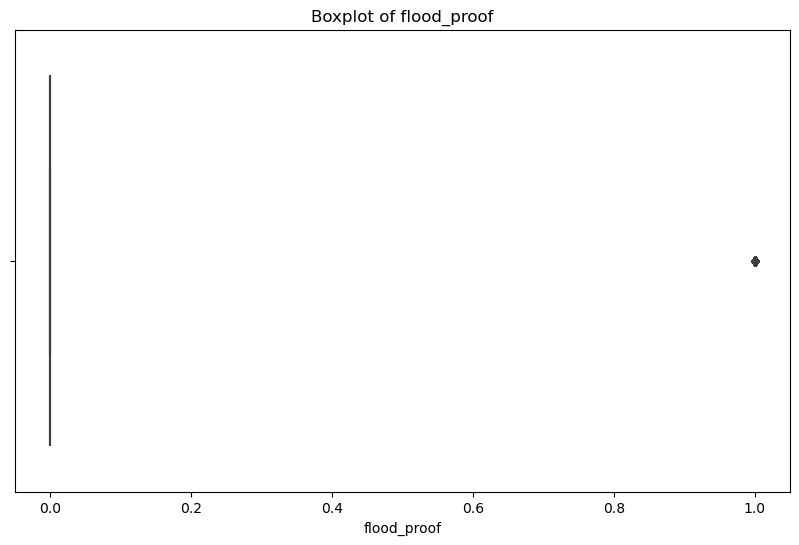

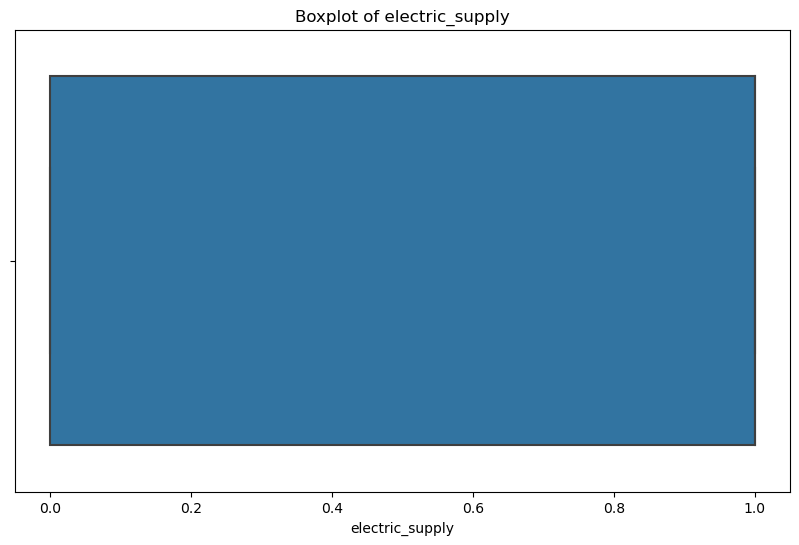

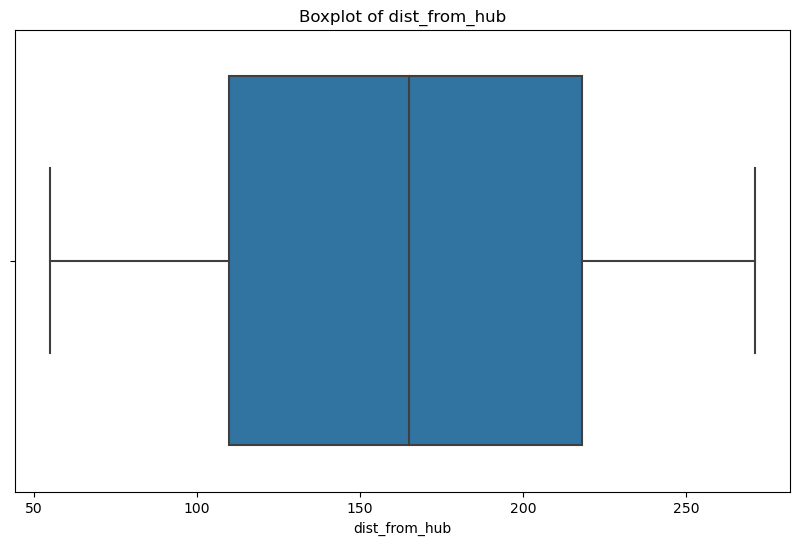

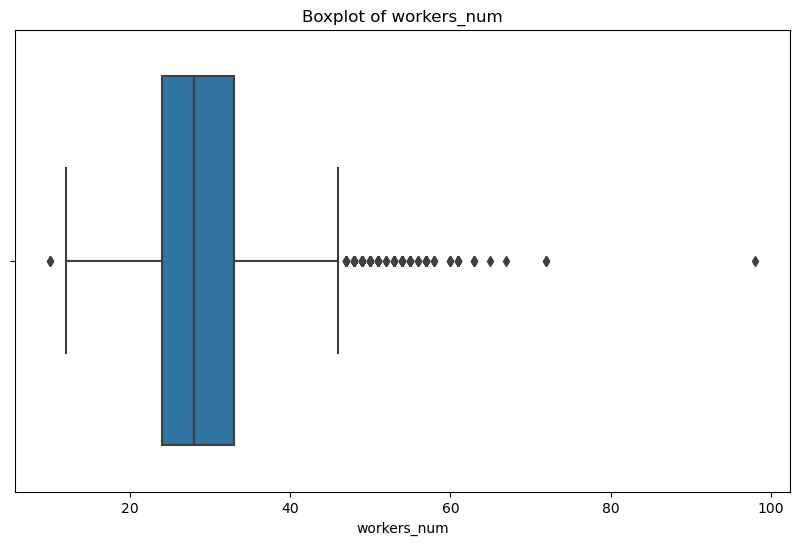

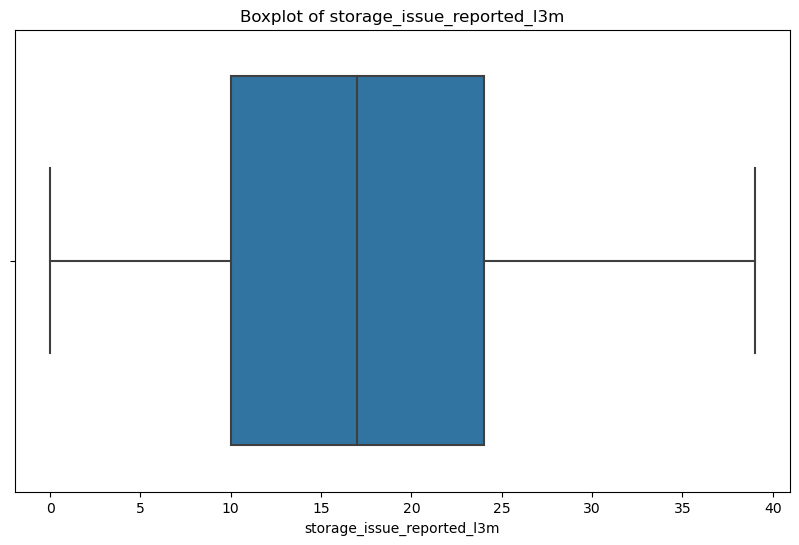

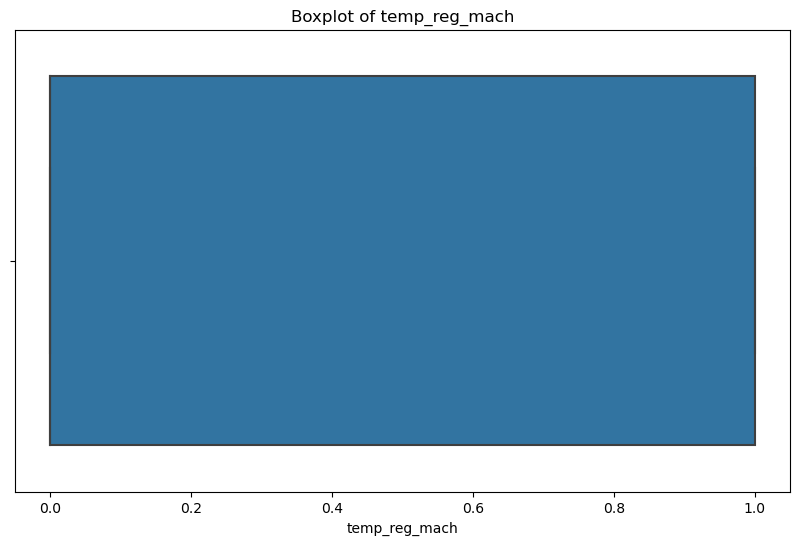

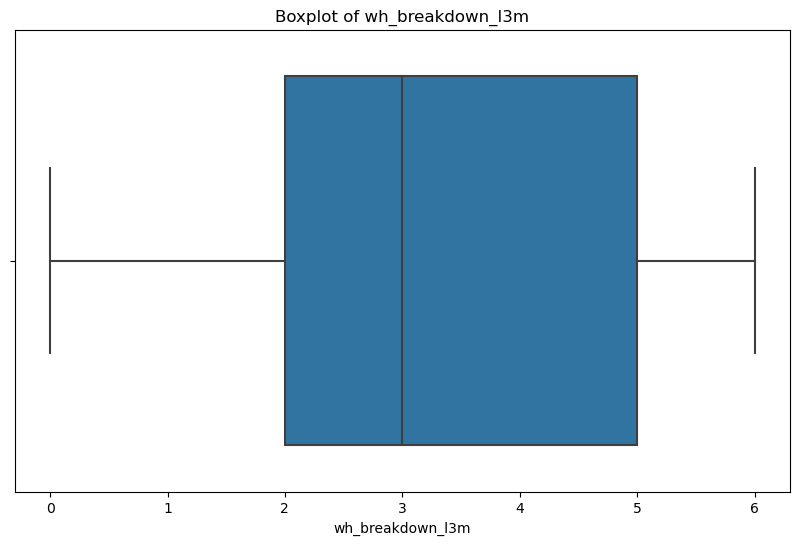

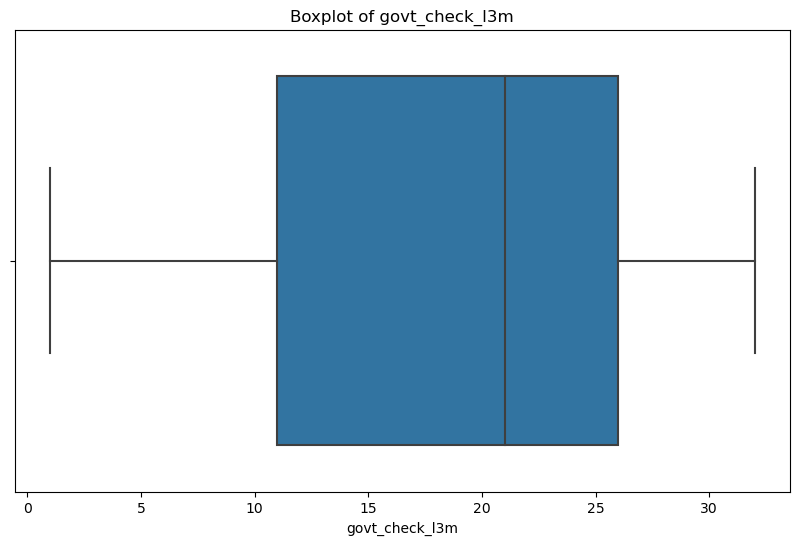

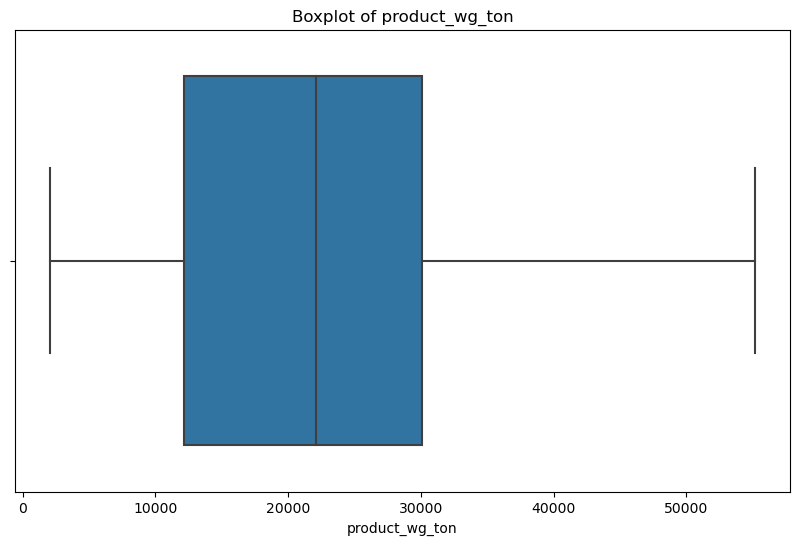

In [243]:
for num_column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_column, data=test_df)
    plt.title(f'Boxplot of {num_column}')
    plt.xlabel(num_column)
    plt.show()

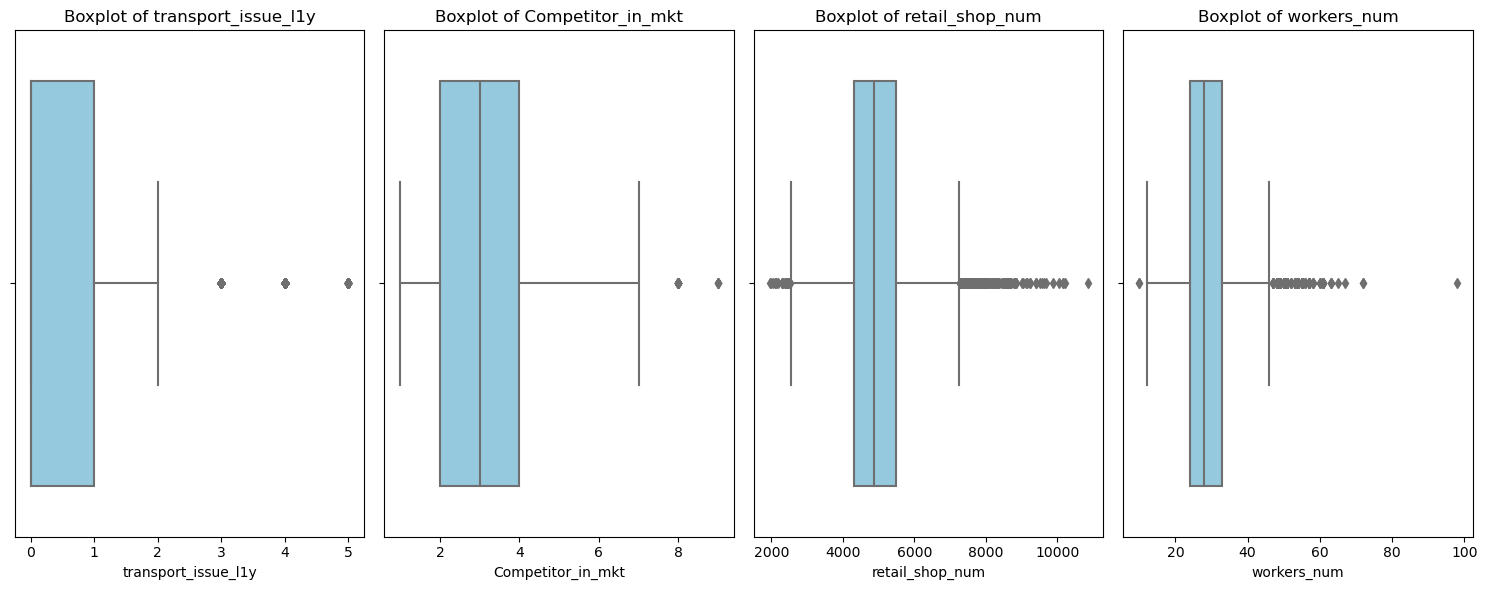

In [244]:
num_of_columns = ['transport_issue_l1y','Competitor_in_mkt', 'retail_shop_num','workers_num']
num_cols = len(num_of_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols,figsize=(15,6))
for i, num_column in enumerate(num_of_columns):
    sns.boxplot(x=num_column, data=test_df, ax=axes[i],color='skyblue')
    axes[i].set_title(f'Boxplot of {num_column}')
    axes[i].set_xlabel(num_column)
plt.tight_layout()
plt.show()

In [245]:
correlation = test_df['flood_proof'].corr(test_df['product_wg_ton'])
print(correlation)

-0.002732524870602797


In [246]:
correlation_2 = test_df['flood_impacted'].corr(test_df['product_wg_ton'])
print(correlation_2)

-0.018211157164521468


In [247]:
# Create count plots for categorical columns:

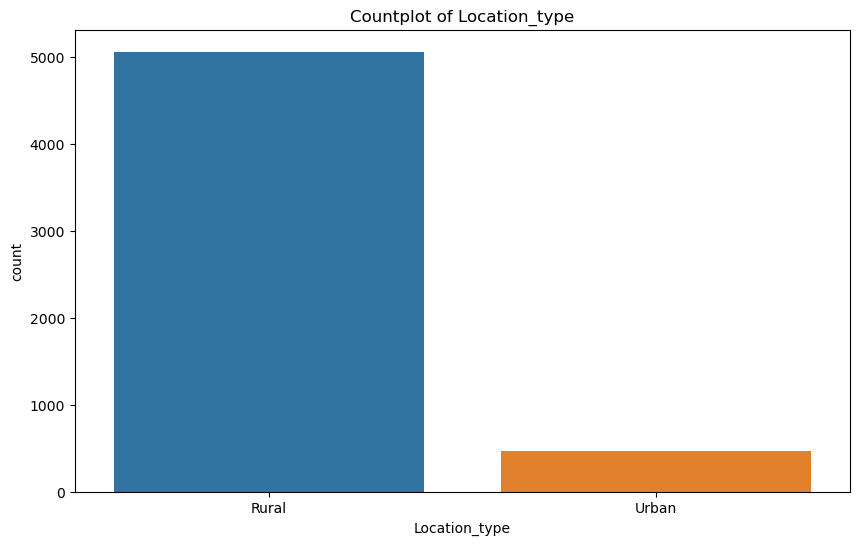

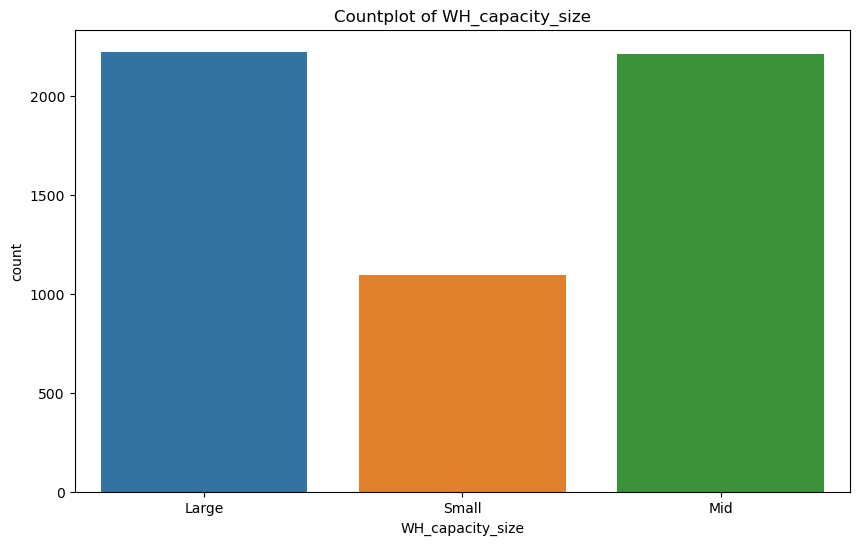

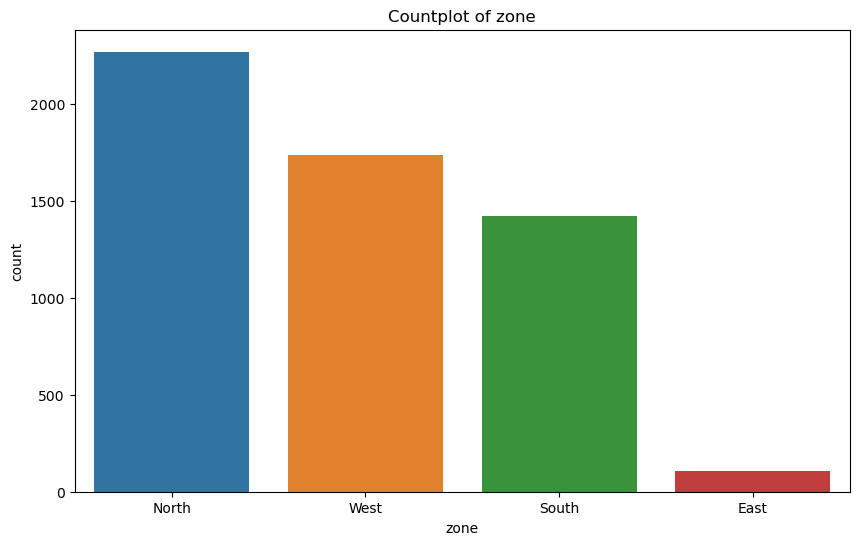

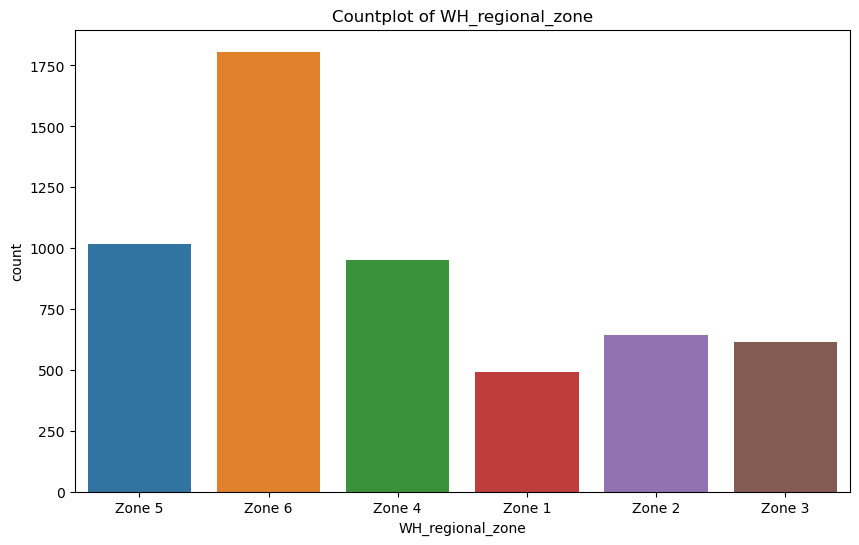

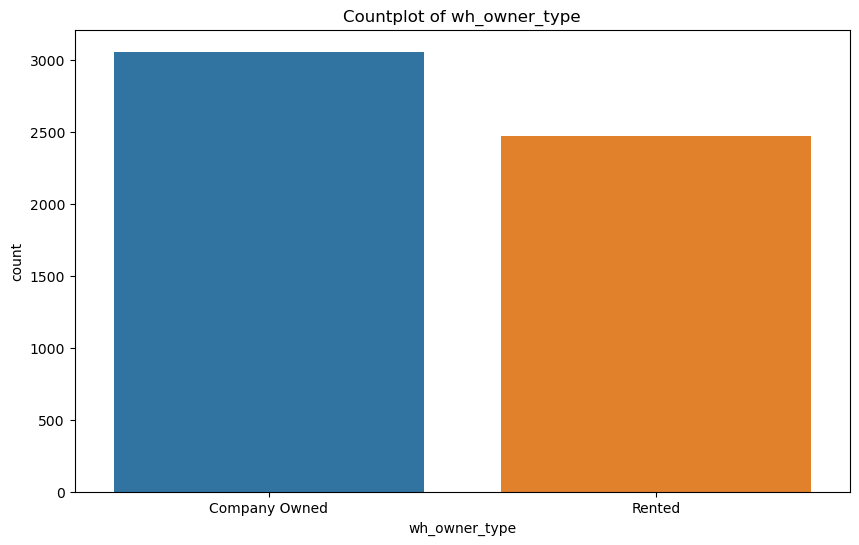

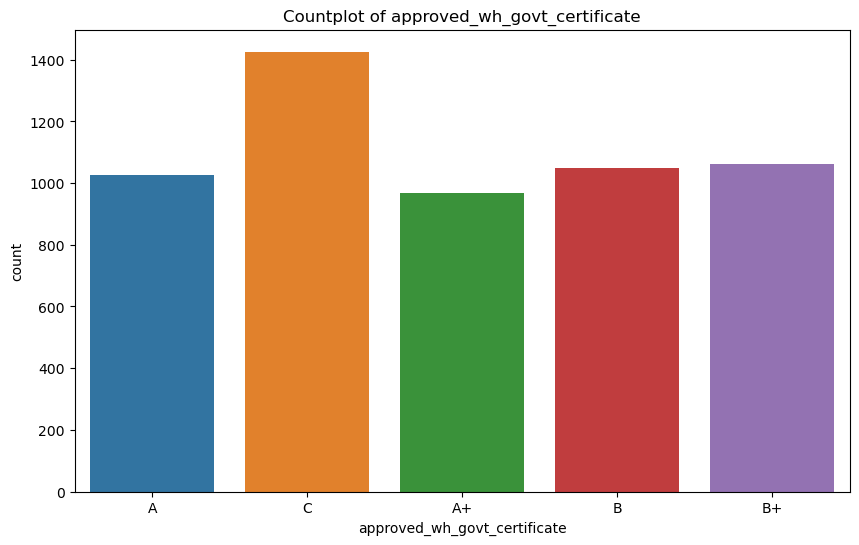

In [248]:
for cat_column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_column, data=test_df)
    plt.title(f'Countplot of {cat_column}')
    plt.xlabel(cat_column)
    plt.show()

In [249]:
# Replace Outliers

In [250]:
median_transport_issue_l1y = test_df['transport_issue_l1y'].median()
Q1 = test_df['transport_issue_l1y'].quantile(0.25)
Q3 = test_df['transport_issue_l1y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_df['transport_issue_l1y'] = test_df['transport_issue_l1y'].apply(lambda x: median_transport_issue_l1y if x < lower_bound or x > upper_bound else x)

In [251]:
median_Competitor_in_mkt = test_df['Competitor_in_mkt'].median()
Q1 = test_df['Competitor_in_mkt'].quantile(0.25)
Q3 = test_df['Competitor_in_mkt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_df['Competitor_in_mkt'] = test_df['Competitor_in_mkt'].apply(lambda x: median_Competitor_in_mkt if x < lower_bound or x > upper_bound else x)

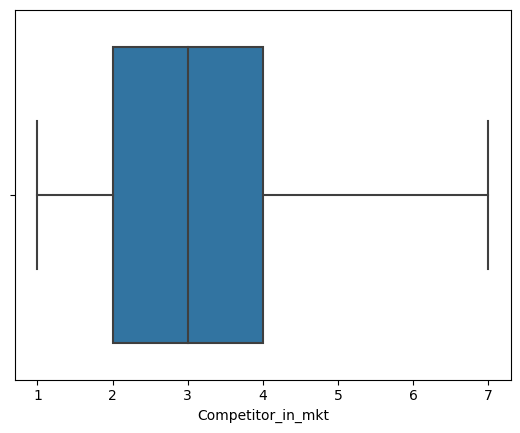

In [252]:
sns.boxplot(x=test_df['Competitor_in_mkt'])
plt.show()

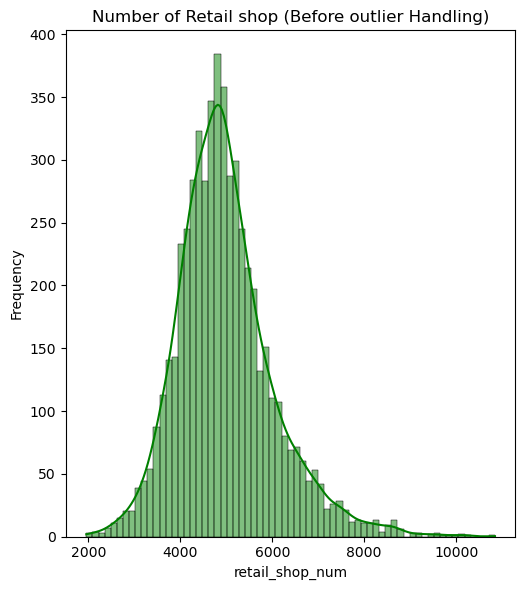

In [253]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(test_df['retail_shop_num'], kde=True, color='green')
plt.title('Number of Retail shop (Before outlier Handling)')
plt.xlabel('retail_shop_num')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [254]:
percentile_threshold = 95
lower_threshold = np.percentile(test_df['retail_shop_num'], 100 - percentile_threshold)
upper_threshold = np.percentile(test_df['retail_shop_num'],percentile_threshold)
test_df['retail_shop_num_winsorized'] = test_df['retail_shop_num'].clip(lower=lower_threshold, upper=upper_threshold)

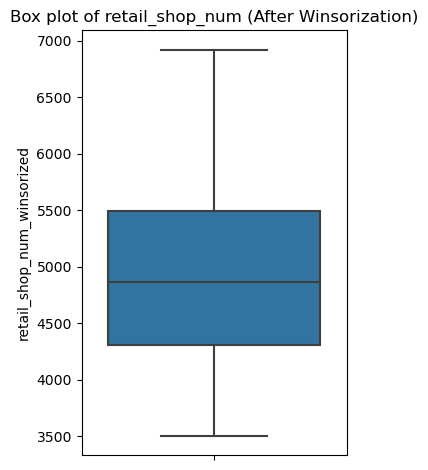

In [255]:
plt.subplot(1,2,2)
sns.boxplot(y=test_df['retail_shop_num_winsorized'])
plt.title('Box plot of retail_shop_num (After Winsorization)')
plt.tight_layout()
plt.show()

In [256]:
percentile_threshold = 95
lower_threshold = np.percentile(test_df['workers_num'], 100 - percentile_threshold)
upper_threshold = np.percentile(test_df['workers_num'],percentile_threshold)
test_df['workers_num_winsorized'] = test_df['workers_num'].clip(lower=lower_threshold, upper=upper_threshold)

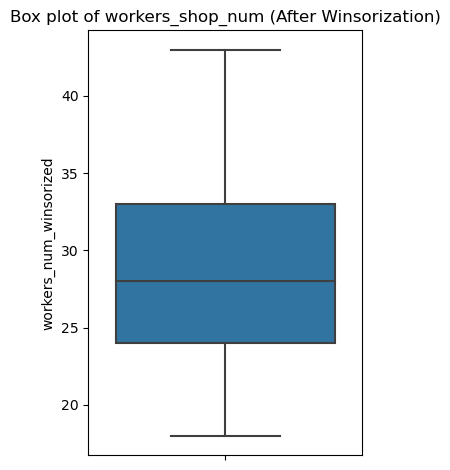

In [257]:
plt.subplot(1,2,2)
sns.boxplot(y=test_df['workers_num_winsorized'])
plt.title('Box plot of workers_shop_num (After Winsorization)')
plt.tight_layout()
plt.show()

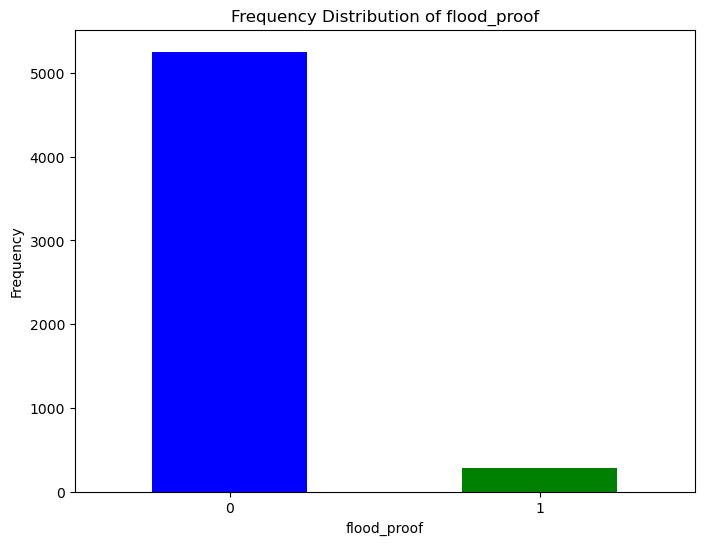

In [258]:
frequency = test_df['flood_proof'].value_counts()
plt.figure(figsize=(8,6))
frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency Distribution of flood_proof')
plt.xlabel('flood_proof')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

From the above viswalisation we got a clear picture that the frequency under the category of 0 if very much higher than
that of category 1.

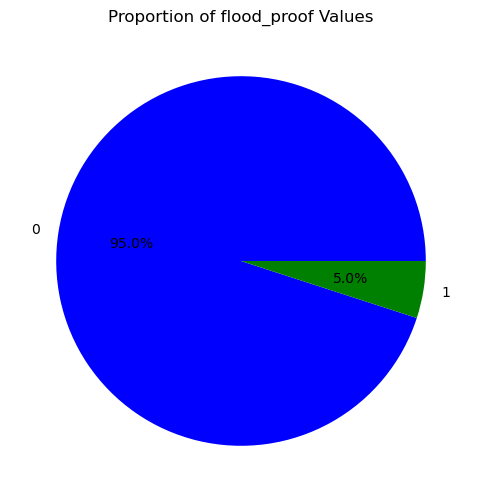

In [259]:
plt.figure(figsize=(8,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', colors=['blue','green'])
plt.title('Proportion of flood_proof Values')
plt.show()

In [260]:
test_df['flood_proof'].unique()

array([0, 1], dtype=int64)

In [261]:
# Calculate the proportion of 1's in the 'flood_proof' column:

In [262]:
proportion_of_ones = test_df['flood_proof'].mean()
outlier_threshold = 0.05
outliers = test_df[test_df['flood_proof'] > outlier_threshold]
if not outliers.empty:
    print("Outliers are identified :")
    print(outliers['flood_proof'])
else:
    print("No outliers are identified")

Outliers are identified :
22      1
38      1
77      1
118     1
145     1
       ..
5443    1
5450    1
5454    1
5476    1
5479    1
Name: flood_proof, Length: 276, dtype: int64


In [263]:
# Replace the outliers(1) with zero

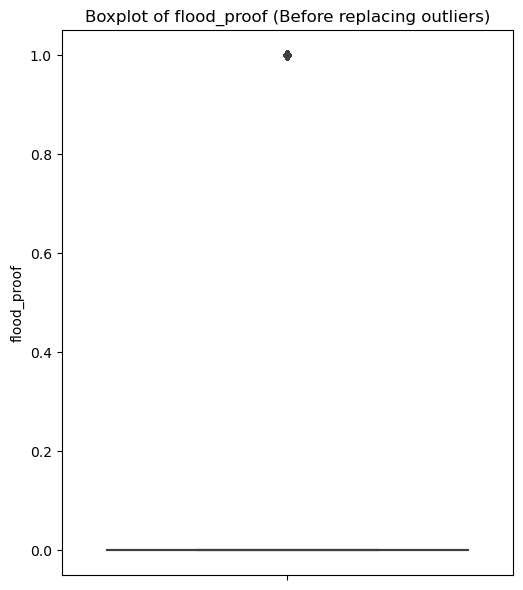

In [264]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=test_df['flood_proof'])
plt.title('Boxplot of flood_proof (Before replacing outliers)')
plt.tight_layout()
plt.show()

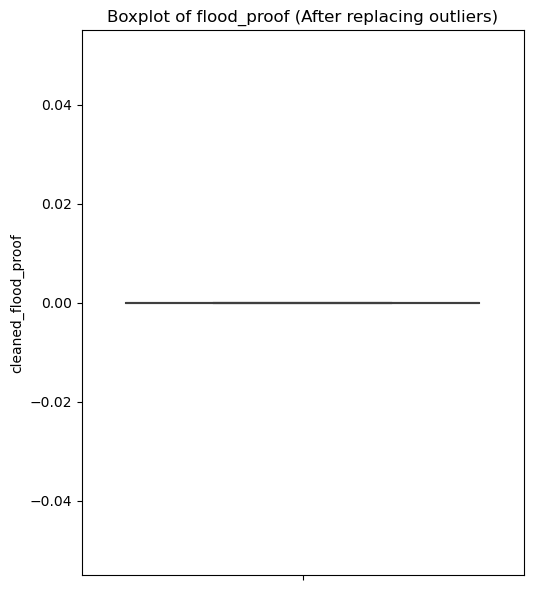

In [265]:
test_df['cleaned_flood_proof'] = test_df['flood_proof'].replace(1,0)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=test_df['cleaned_flood_proof'])
plt.title('Boxplot of flood_proof (After replacing outliers)')
plt.tight_layout()
plt.show()

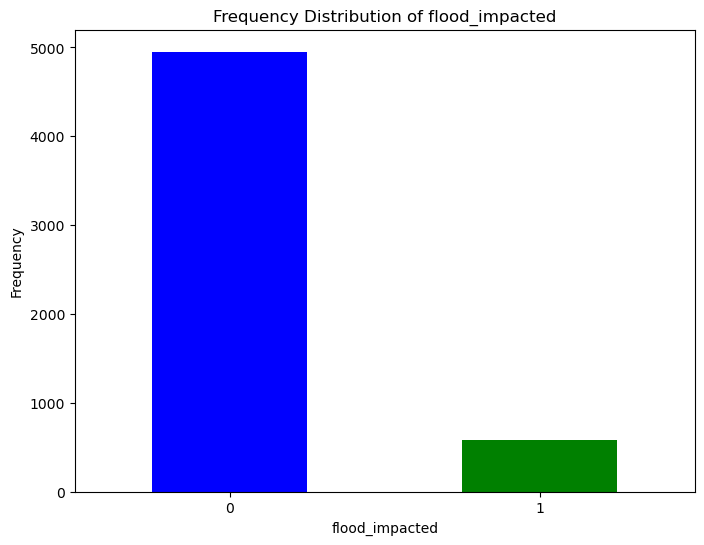

In [266]:
frequency = test_df['flood_impacted'].value_counts()
plt.figure(figsize=(8,6))
frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency Distribution of flood_impacted')
plt.xlabel('flood_impacted')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [267]:
# Calculate the proportion of 1's in flood_impacted

In [268]:
proportion_of_ones = test_df['flood_impacted'].mean()
outlier_threshold = 0.05
outliers = test_df[test_df['flood_impacted'] > outlier_threshold]
if not outliers.empty:
    print("Outliers are identified :")
    print(outliers['flood_impacted'])
else:
    print("No outliers are identified")

Outliers are identified :
7       1
29      1
33      1
35      1
36      1
       ..
5507    1
5508    1
5513    1
5520    1
5528    1
Name: flood_impacted, Length: 576, dtype: int64


In [269]:
# Replace Outliers with 0:

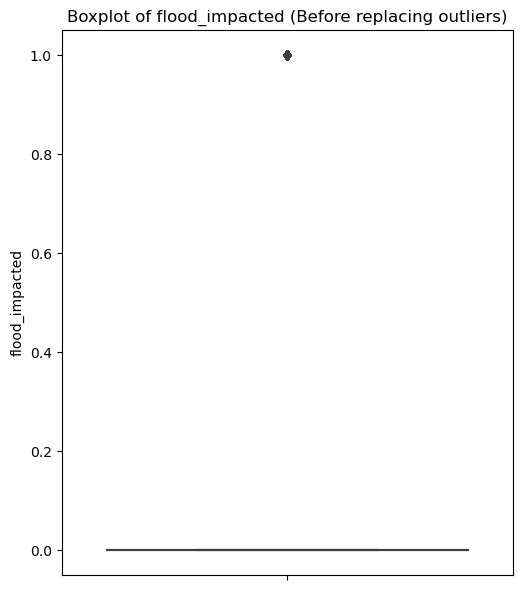

In [270]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=test_df['flood_impacted'])
plt.title('Boxplot of flood_impacted (Before replacing outliers)')
plt.tight_layout()
plt.show()

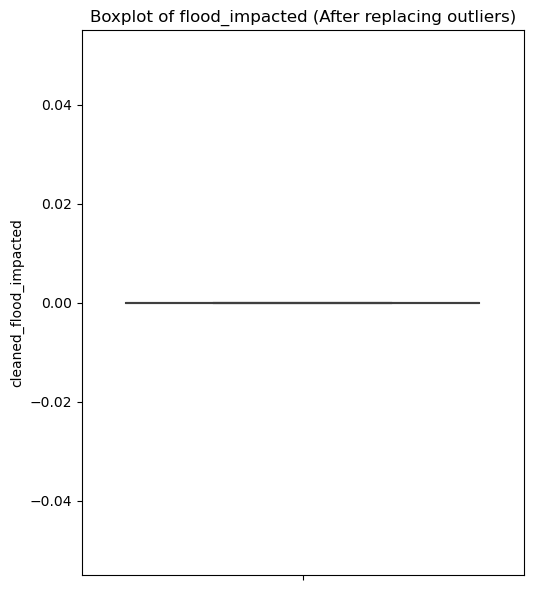

In [271]:
test_df['cleaned_flood_impacted'] = test_df['flood_impacted'].replace(1,0)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=test_df['cleaned_flood_impacted'])
plt.title('Boxplot of flood_impacted (After replacing outliers)')
plt.tight_layout()
plt.show()

In [272]:
columns_to_drop = ['retail_shop_num','flood_impacted', 'flood_proof','workers_num']
test_df.drop(columns= columns_to_drop, inplace=True)

In [273]:
# Convert the data types of columns named retail_shop_num_winsorized and workers_num_winsorized into int64:

In [274]:
test_df['retail_shop_num_winsorized'] = test_df['retail_shop_num_winsorized'].astype('int64')

In [275]:
test_df['workers_num_winsorized'] = test_df['workers_num_winsorized'].astype('int64')

In [276]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted']
Categorical columns are : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


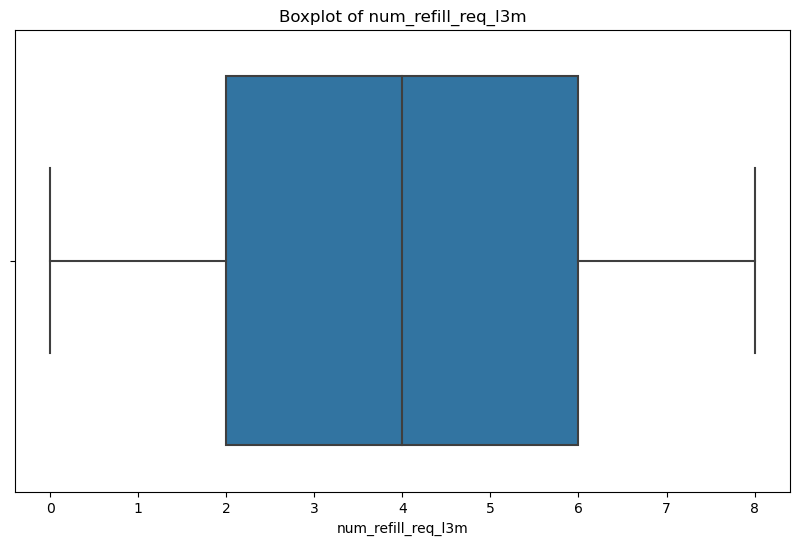

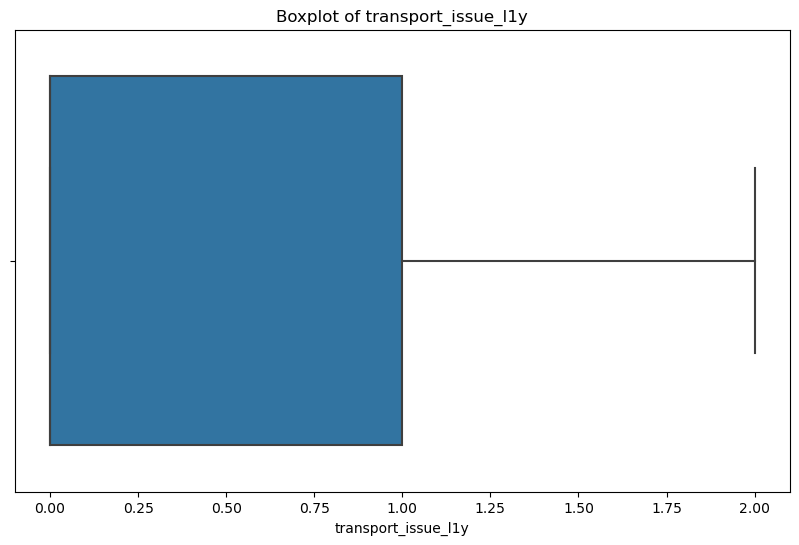

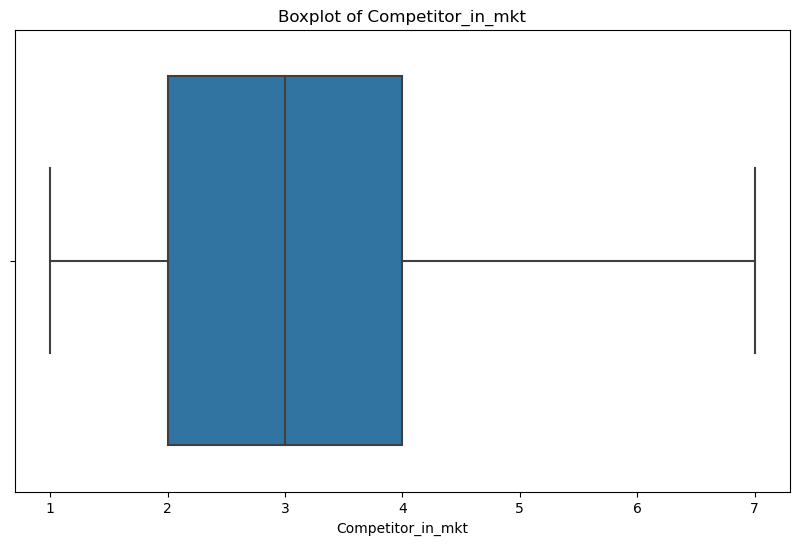

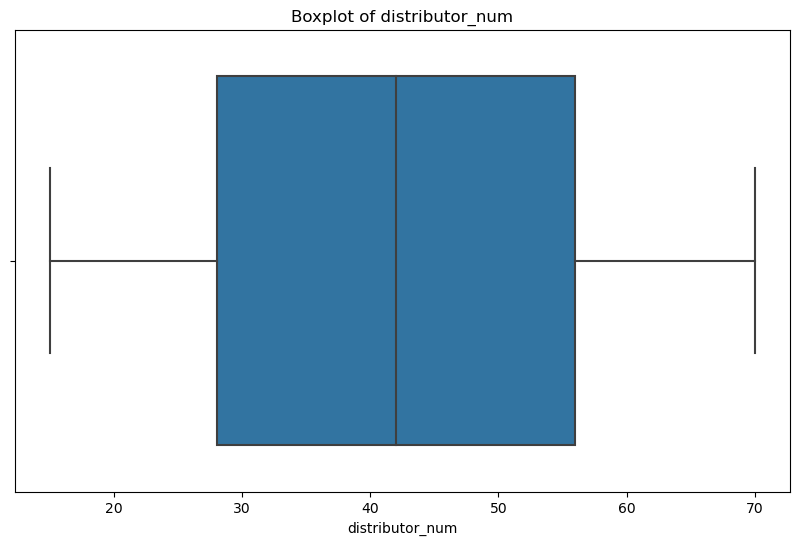

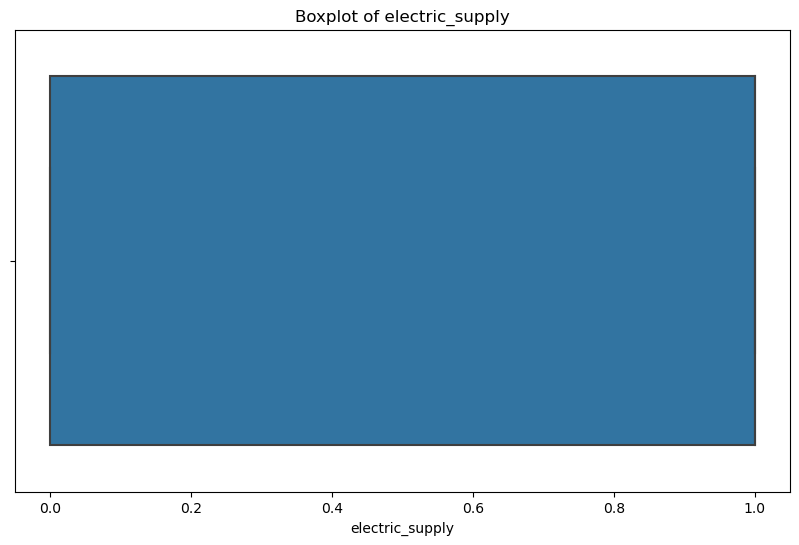

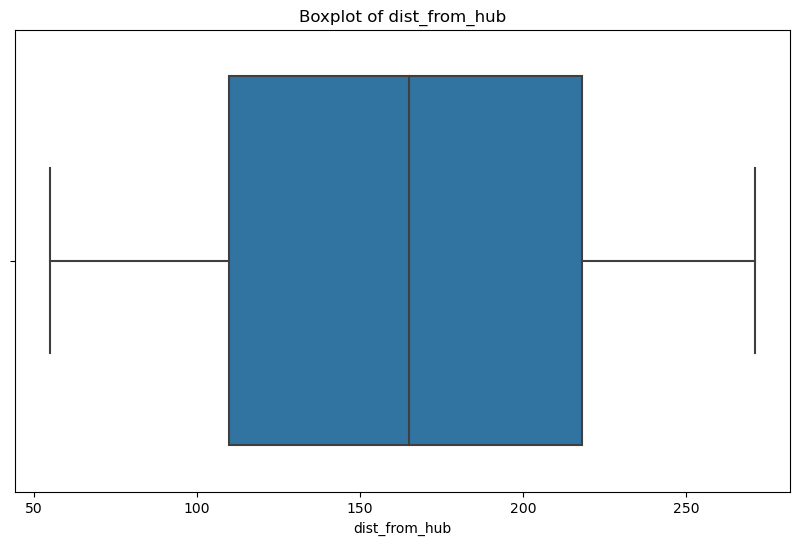

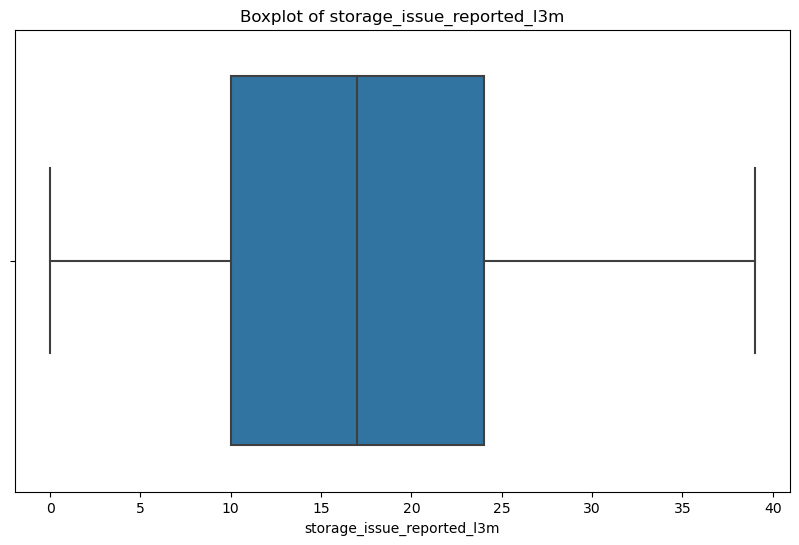

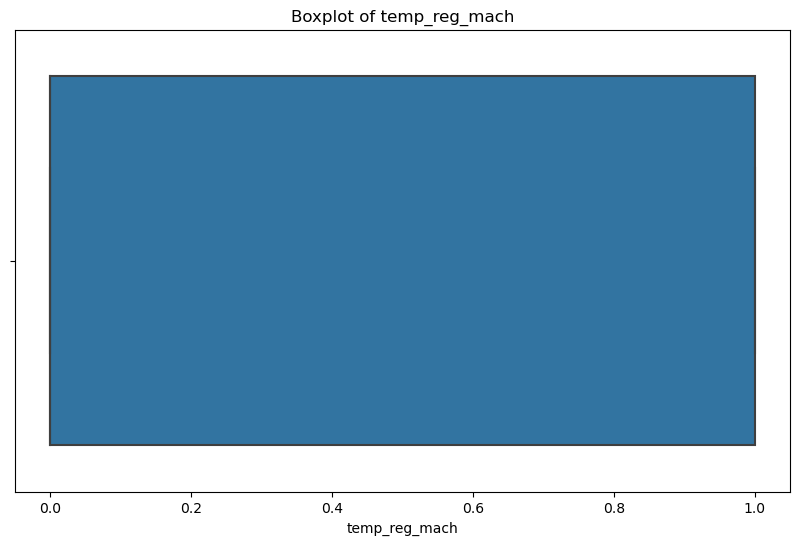

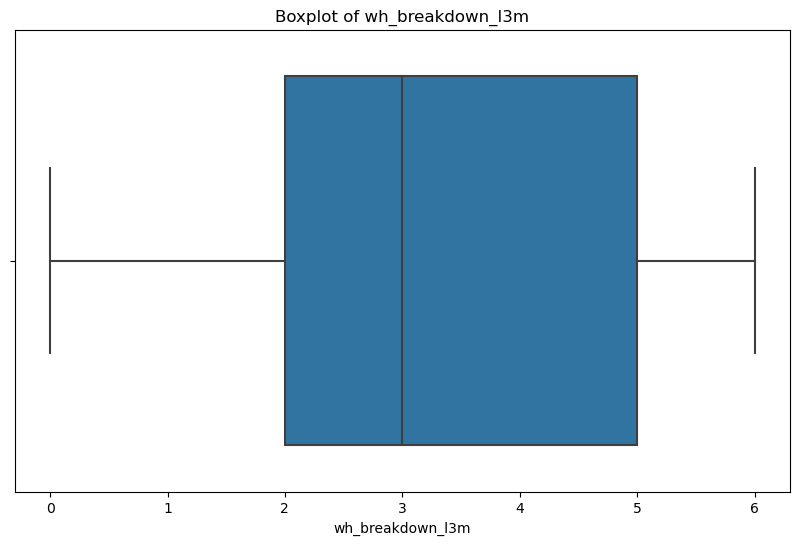

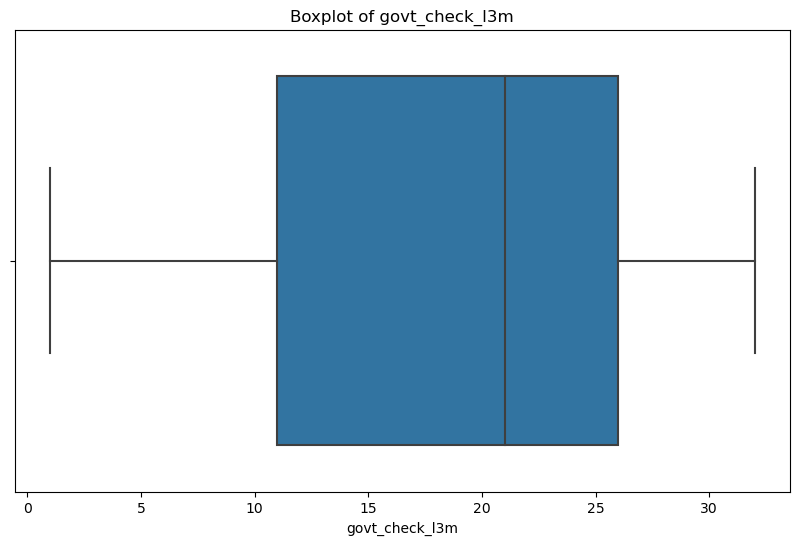

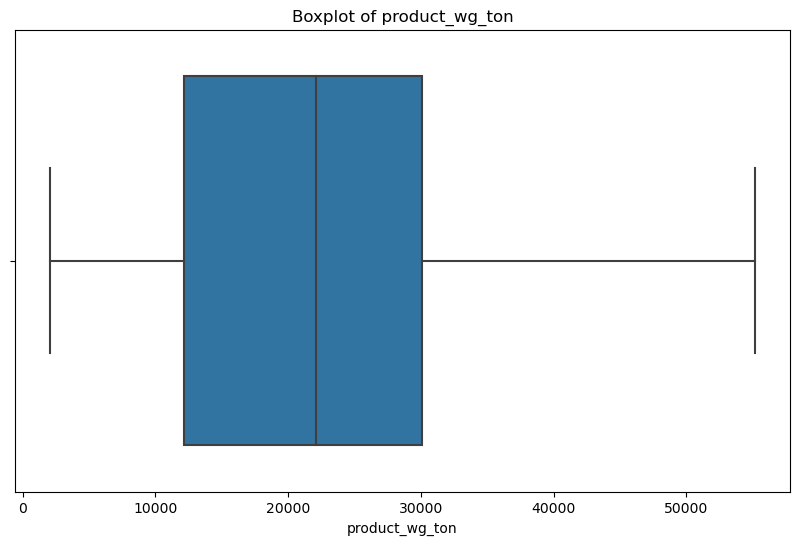

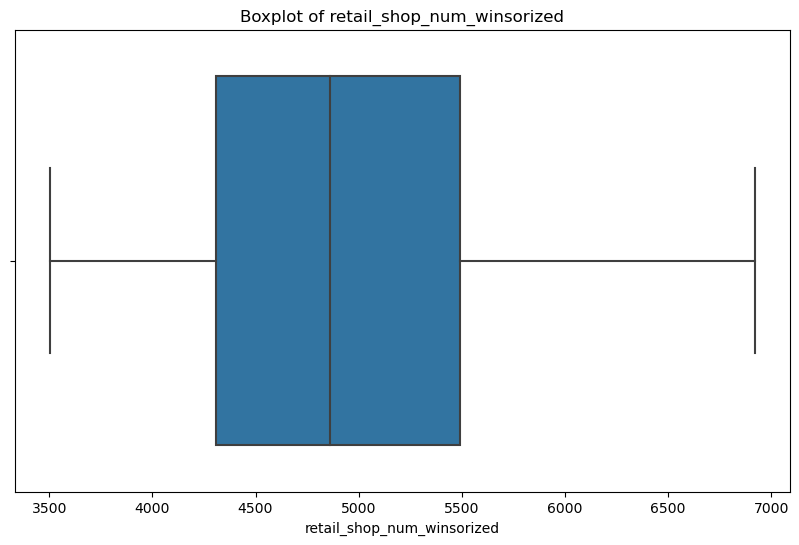

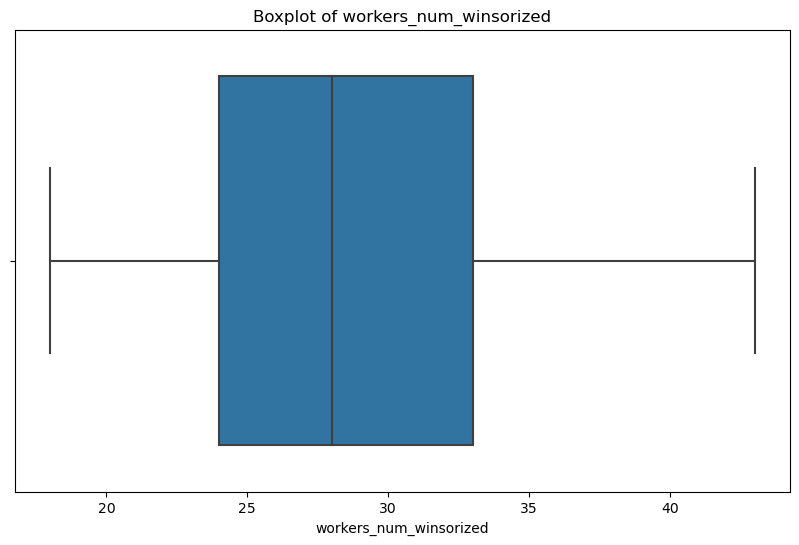

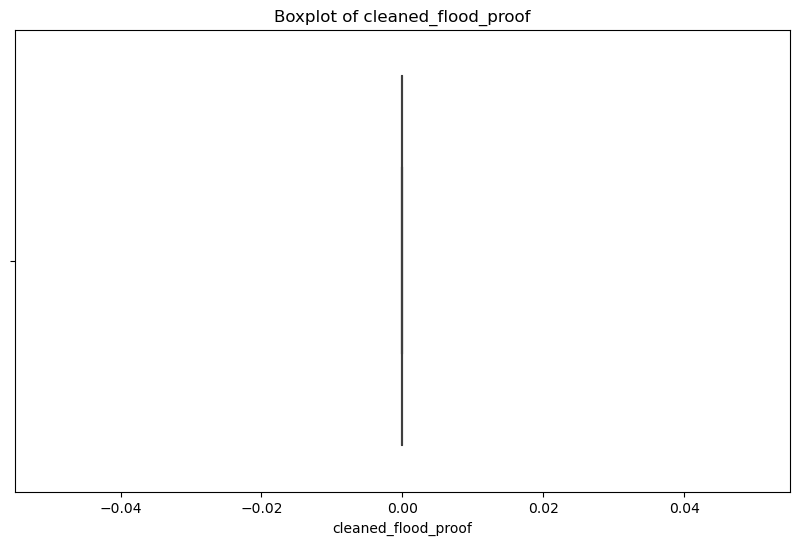

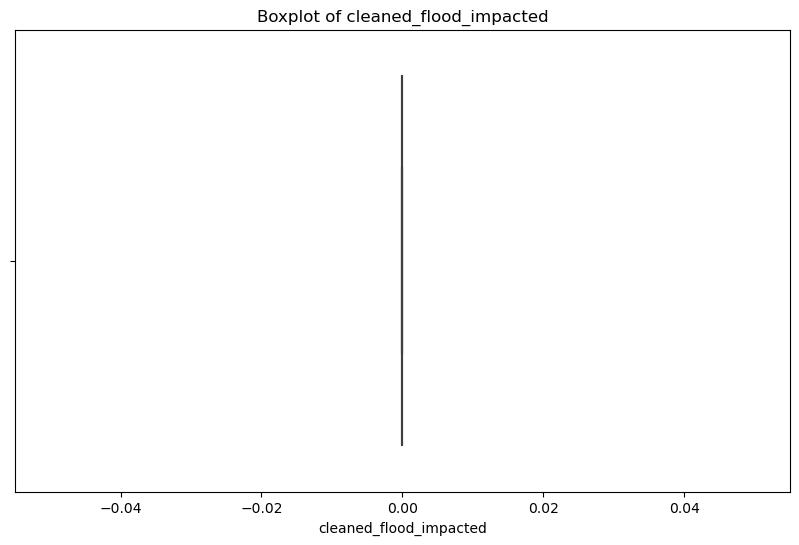

In [277]:
for num_column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_column, data=test_df)
    plt.title(f'Boxplot of {num_column}')
    plt.xlabel(num_column)
    plt.show()

In [278]:
# Correlation with the target variable:

In [279]:
numerical_cols = test_df.select_dtypes(include=['float64','int64']).columns
corr_with_the_target_variable = test_df[numerical_cols].corrwith(test_df['product_wg_ton'])
# filter out categorical columns if any:
categorical_cols = test_df.select_dtypes(include=['object']).columns
if 'product_wg_ton' in categorical_cols:
    categorical_cols = categorical_cols.drop('product_wg_ton')    


In [280]:
# Visualize correlation coefficients:

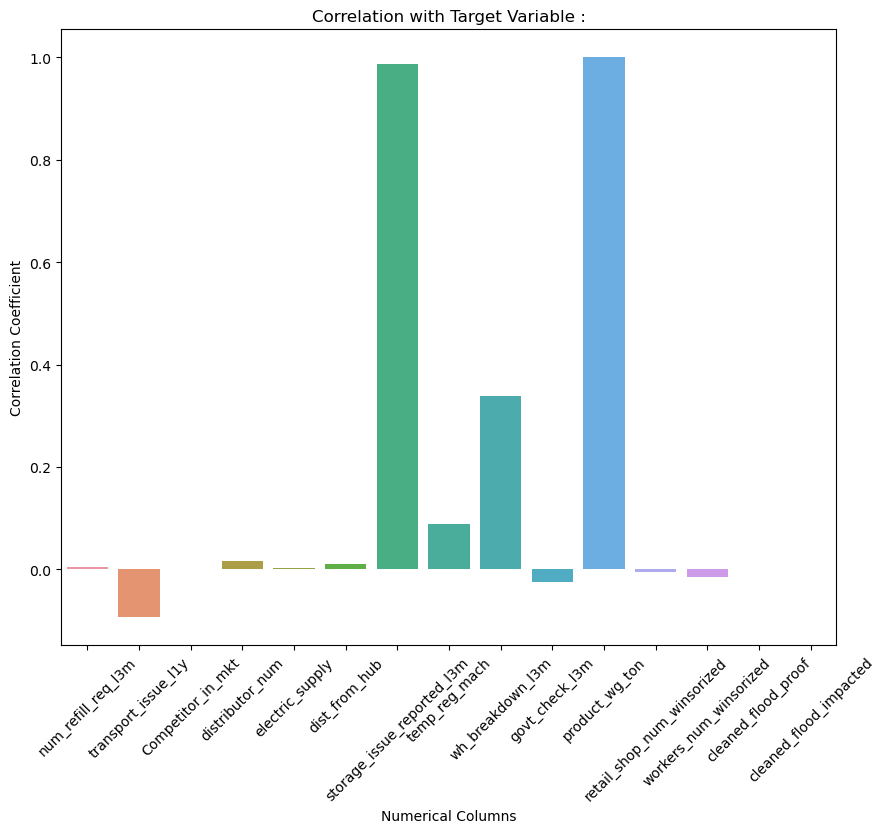

In [281]:
plt.figure(figsize=(10,8))
sns.barplot(x=corr_with_the_target_variable.index, y=corr_with_the_target_variable.values)
plt.title('Correlation with Target Variable :')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

num_refill_req_l3m            0.004579
transport_issue_l1y          -0.094129
Competitor_in_mkt             0.000749
distributor_num               0.016267
electric_supply               0.001644
dist_from_hub                 0.009994
storage_issue_reported_l3m    0.987039
temp_reg_mach                 0.087935
wh_breakdown_l3m              0.338453
govt_check_l3m               -0.025715
product_wg_ton                1.000000
retail_shop_num_winsorized   -0.005475
workers_num_winsorized       -0.015708
cleaned_flood_proof                NaN
cleaned_flood_impacted             NaN
dtype: float64


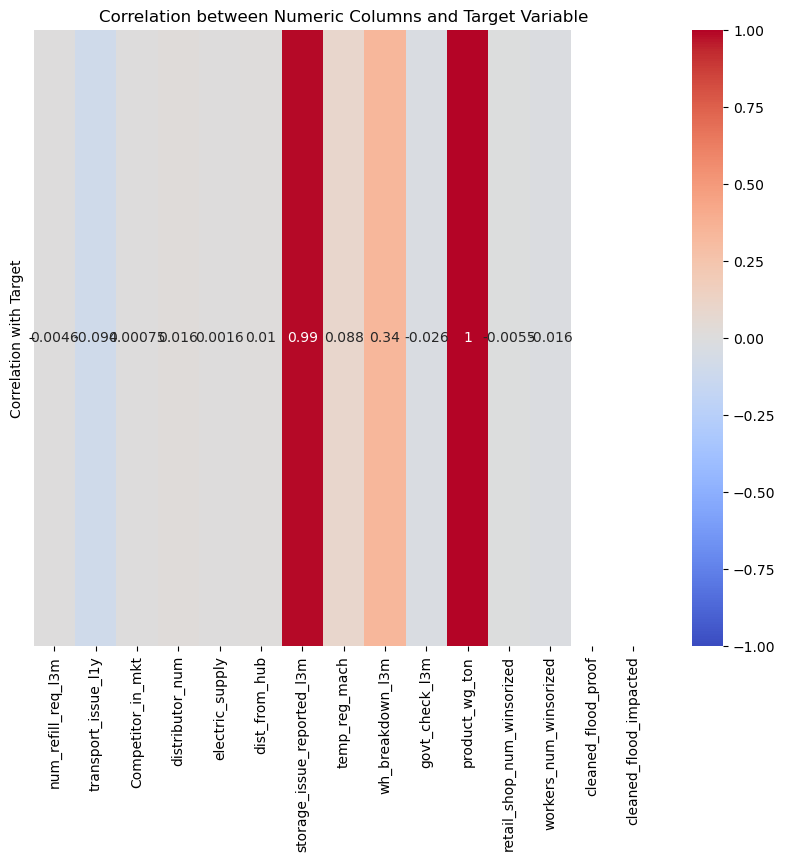

In [282]:
numerical_cols = test_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = test_df[numerical_cols].corrwith(test_df['product_wg_ton'])
print(correlation_matrix)

plt.figure(figsize=(10, 8))

# Create a heatmap for correlation coefficients: 
sns.heatmap(correlation_matrix.to_frame('Correlation with Target').transpose(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Numeric Columns and Target Variable")
plt.show()

## Feature Engineering and Data Preprocessing

In [283]:
# Feature engineering for numerical columns:

In [284]:
# Combine numerical features :

In [285]:
test_df['num_refill_transport'] = test_df['num_refill_req_l3m'] * test_df['transport_issue_l1y']

In [286]:
test_df['num_refill_transport'] = test_df['num_refill_transport'].astype('int64')

In [287]:
test_df['num_refill_transport'].unique()

array([ 0, 10,  5,  4, 14,  6, 12,  3,  1,  8, 16,  7,  2], dtype=int64)

In [288]:
# Normalized feature:

In [289]:
scaler = MinMaxScaler()
test_df['dist_from_hub_normalized'] = scaler.fit_transform(test_df[['dist_from_hub']])

In [290]:
# Demand Density:

In [291]:
test_df['demand_density'] = test_df['retail_shop_num_winsorized']/ test_df['dist_from_hub']

In [292]:
# Label encoding for the column named WH_capacity_size
# By assigning numerical values (large=3, Mid=2, Small=1)

In [293]:
capacity_mapping = {'Large': 3, 'Mid':2, 'Small':1}
test_df['WH_Capacity_size_num'] = test_df['WH_capacity_size'].map(capacity_mapping)

In [294]:
# Distribution efficiency(a):

In [295]:
test_df['distribution_efficiency'] = test_df['distributor_num'] / test_df['WH_Capacity_size_num']

In [296]:
test_df['distribution_efficiency']

0        5.000000
1       13.333333
2       40.000000
3        7.500000
4       12.000000
          ...    
5524    15.333333
5525    60.000000
5526    21.333333
5527    10.666667
5528    25.000000
Name: distribution_efficiency, Length: 5529, dtype: float64

In [297]:
# Distributor_efficiency:

In [298]:
test_df['distributor_eficny'] = test_df['distributor_num'] / test_df['retail_shop_num_winsorized'] 

In [299]:
# Normalized Demand Density:

In [300]:
test_df['normalized_demand_dnsty'] = test_df['product_wg_ton'] / test_df['dist_from_hub'] 

In [301]:
# Impact of temperature control - on demand:

In [302]:
test_df['temp_reg_impact'] = test_df['temp_reg_mach'] * test_df['product_wg_ton']

In [303]:
# Competetive pressure impact:

In [304]:
test_df['competitor_pressure_impact'] = test_df['Competitor_in_mkt'] * test_df['product_wg_ton']

In [305]:
test_df['competitor_pressure_impact'] = test_df['competitor_pressure_impact'].astype('int64')

In [306]:
# Trends of past data

In [307]:
test_df['product_wg_ton_lag1'] = test_df['product_wg_ton'].shift(1)
test_df['product_wg_ton_lag3'] = test_df['product_wg_ton'].shift(3)

In [308]:
mean_value = test_df['product_wg_ton_lag1'].mean()
test_df['product_wg_ton_lag1'].fillna(mean_value, inplace=True)

In [309]:
test_df['product_wg_ton_lag1'] = test_df['product_wg_ton_lag1'].astype('int64')

In [310]:
test_df['product_wg_ton_lag3'].isna().sum()

3

In [311]:
mean_value = test_df['product_wg_ton_lag3'].mean()
test_df['product_wg_ton_lag3'].fillna(mean_value, inplace=True)
test_df['product_wg_ton_lag3'] = test_df['product_wg_ton_lag3'].astype('int64')

In [312]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']
Categorical columns are : ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


In [313]:
test_df['zone'].unique()

array(['North', 'West', 'South', 'East'], dtype=object)

In [314]:
# One-Hot encoding:

In [315]:
test_df = pd.get_dummies(test_df, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type'])

In [316]:
bool_cols = test_df.select_dtypes(include=['bool']).columns

In [317]:
# Convert boolean columns to int64

In [318]:
test_df[bool_cols] = test_df[bool_cols].astype('int64')

In [319]:
test_df['approved_wh_govt_certificate'].unique()

array(['A', 'C', 'A+', 'B', 'B+'], dtype=object)

In [320]:
# Converting approved_wh_govt_certificate into numerical column

In [321]:
grade_mapping = {'A+':1, 'A':2, 'B+':3, 'B': 4, 'C': 5}
test_df['approved_wh_govt_certificate_num'] = test_df['approved_wh_govt_certificate'].map(grade_mapping).astype('int64')

In [322]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num']
Categorical columns are : ['

In [323]:
new_features = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency',
                'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West',
                'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'distributor_eficny',  'normalized_demand_dnsty',
                'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']

In [324]:
correlations = {}
for feature in new_features:
    correlations[feature] = test_df[feature].corr(test_df['product_wg_ton'])
print(correlations)

{'num_refill_transport': -0.07638172907648315, 'dist_from_hub_normalized': 0.009994481786214569, 'demand_density': -0.013060540923710033, 'WH_Capacity_size_num': -0.02585775405953967, 'distribution_efficiency': 0.030080894329548094, 'Location_type_Rural': -0.07692993810441771, 'Location_type_Urban': 0.07692993810441773, 'zone_East': 0.01391147741106, 'zone_North': 0.017628210130945676, 'zone_South': -0.009809698076339645, 'zone_West': -0.013543079985750021, 'WH_regional_zone_Zone 1': 0.00864339932686292, 'WH_regional_zone_Zone 2': 0.004744494461473735, 'WH_regional_zone_Zone 3': -0.0018681559421068127, 'WH_regional_zone_Zone 4': -0.0074174652532462675, 'WH_regional_zone_Zone 5': -0.020504693079791317, 'WH_regional_zone_Zone 6': 0.01566944947887674, 'wh_owner_type_Company Owned': -0.006915263417465832, 'wh_owner_type_Rented': 0.006915263417465822, 'approved_wh_govt_certificate_num': -0.22916290953214583, 'distributor_eficny': 0.016829250691646015, 'normalized_demand_dnsty': 0.6925298320

In [325]:
# Finding outliers of above created new features using boxplot:

In [326]:
columns_to_visualize = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'Location_type_Rural', 
                        'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 
                        'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 
                        'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'distributor_eficny', 'normalized_demand_dnsty',
                        'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3']


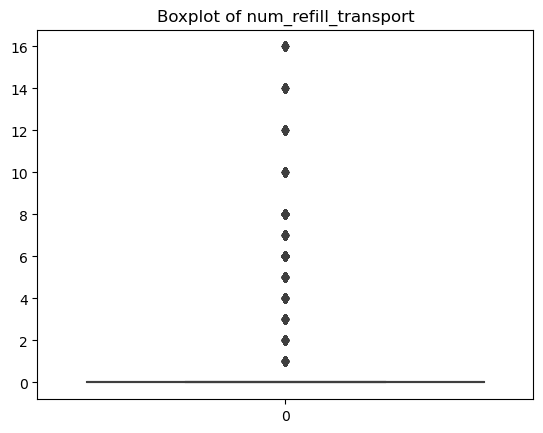

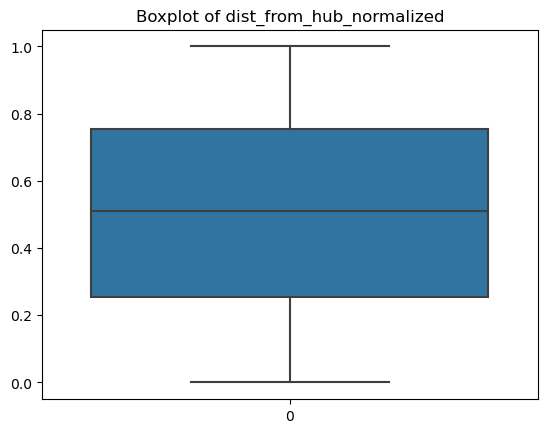

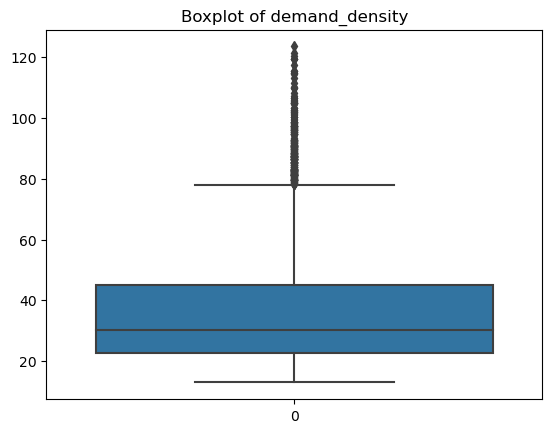

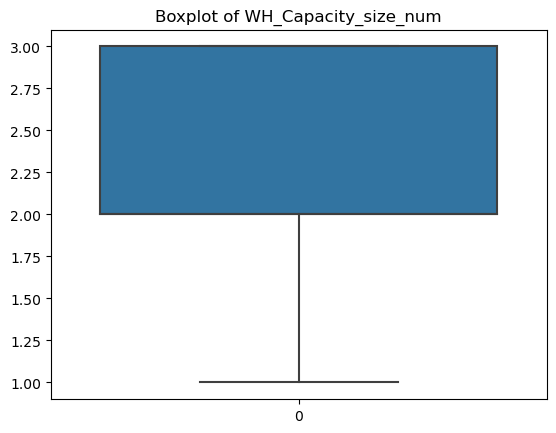

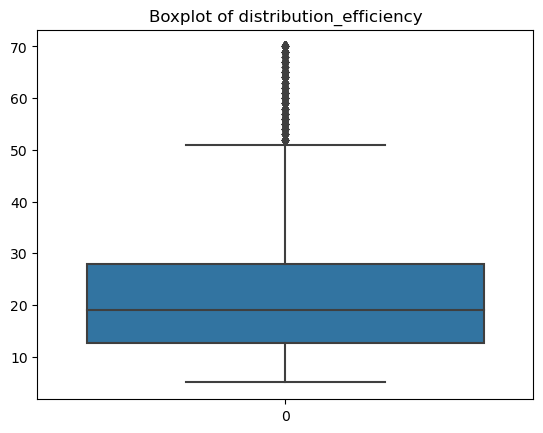

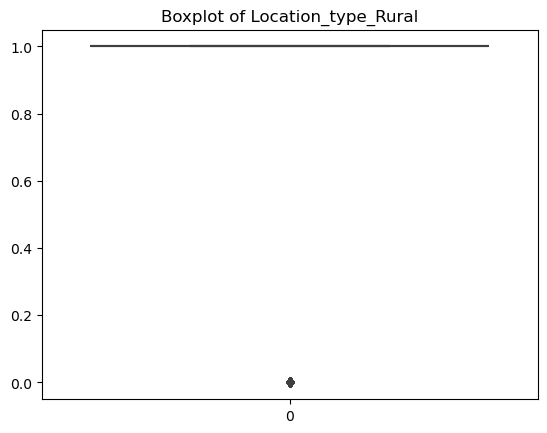

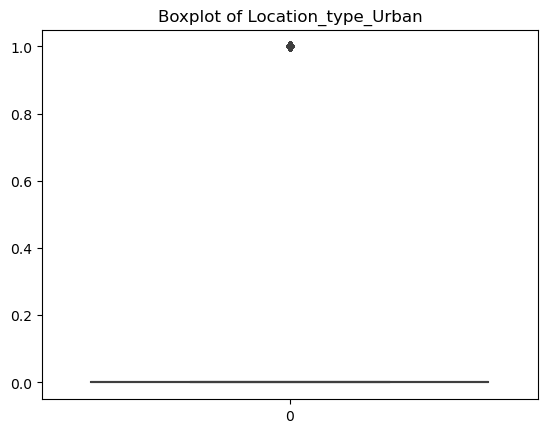

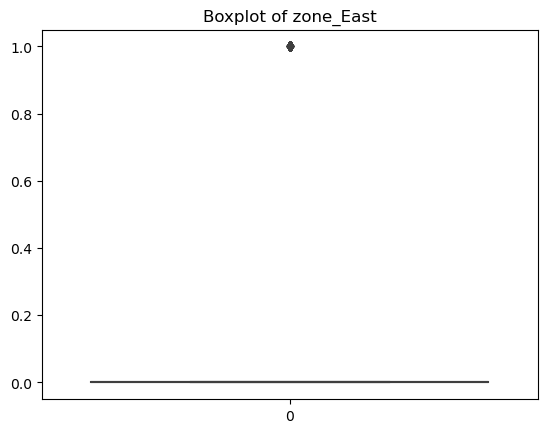

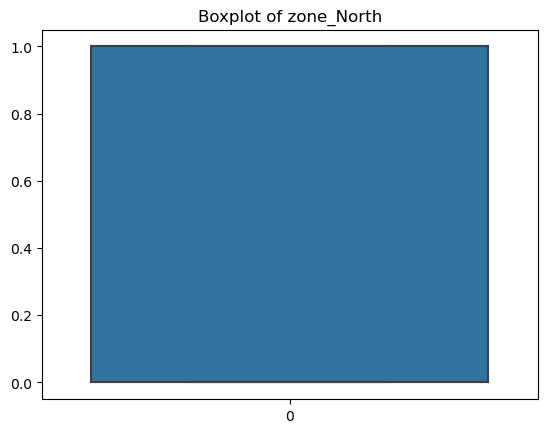

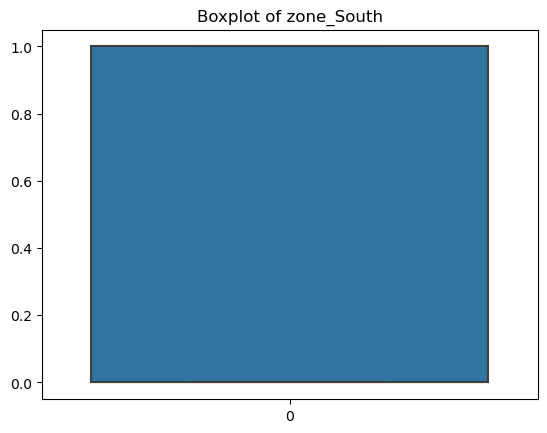

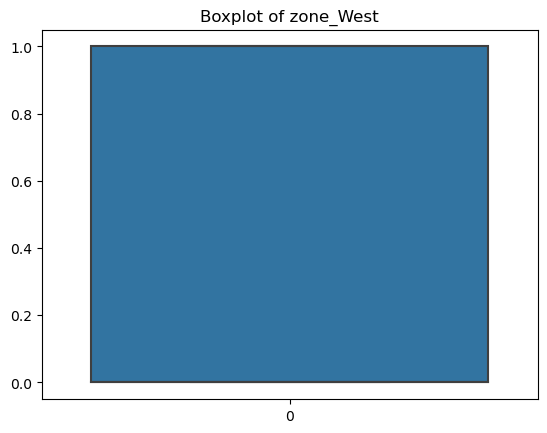

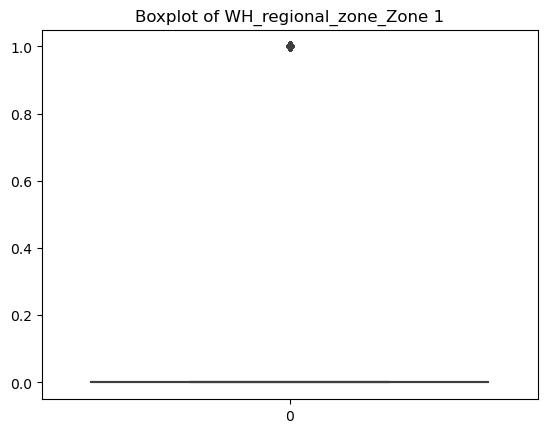

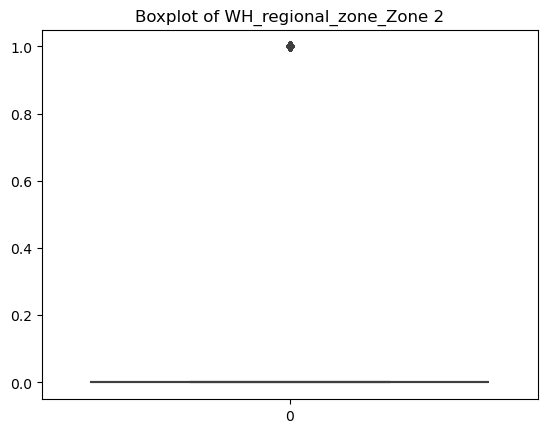

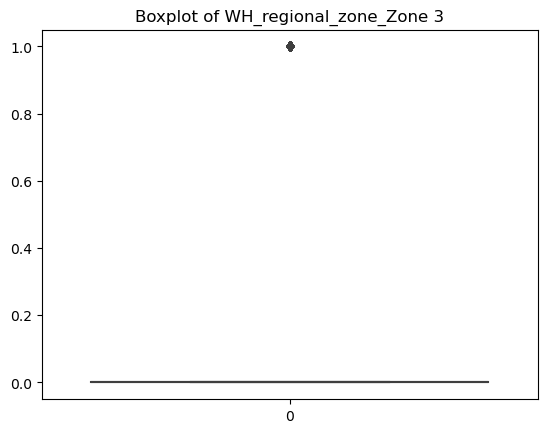

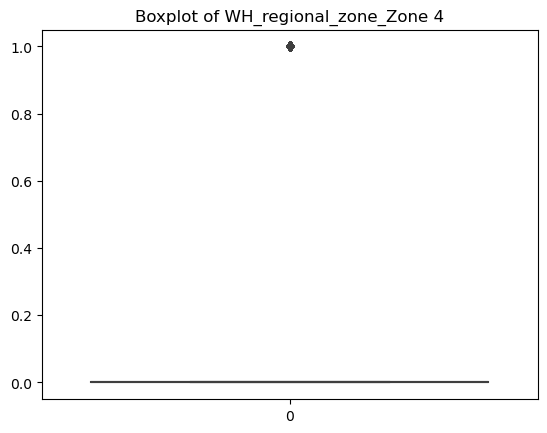

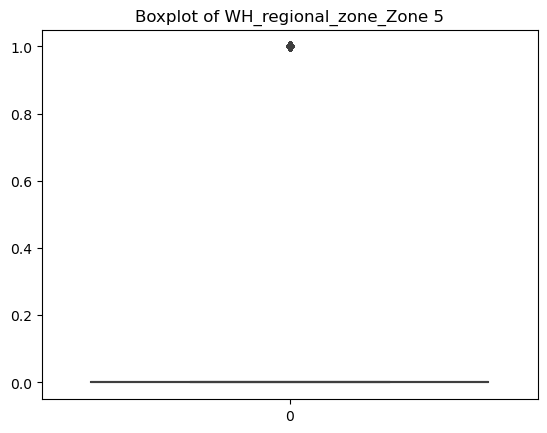

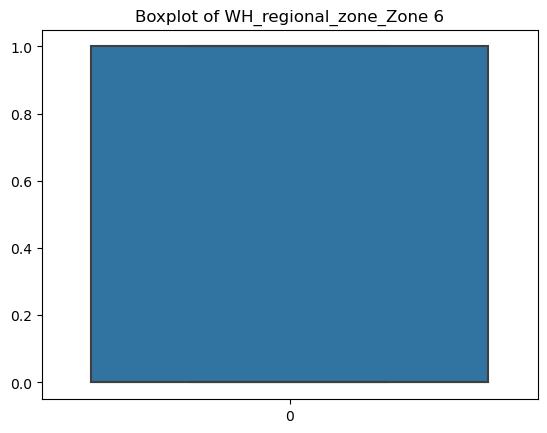

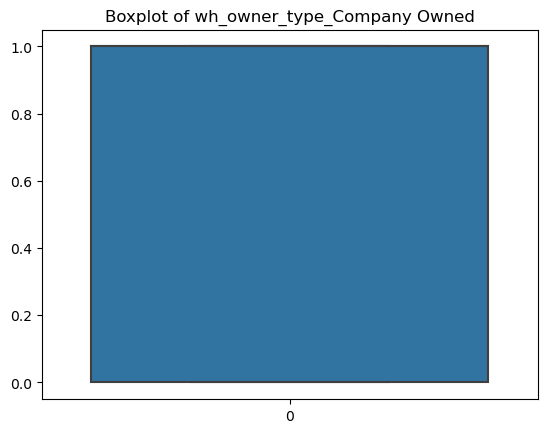

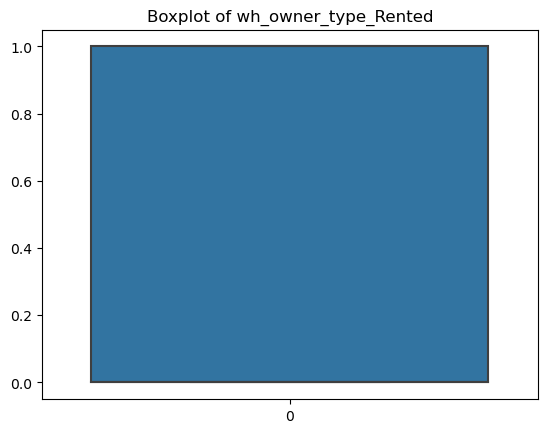

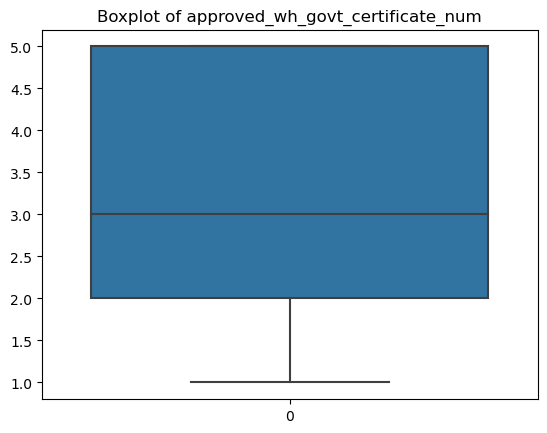

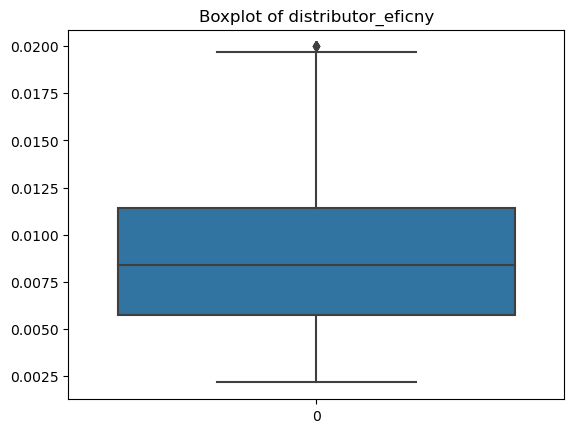

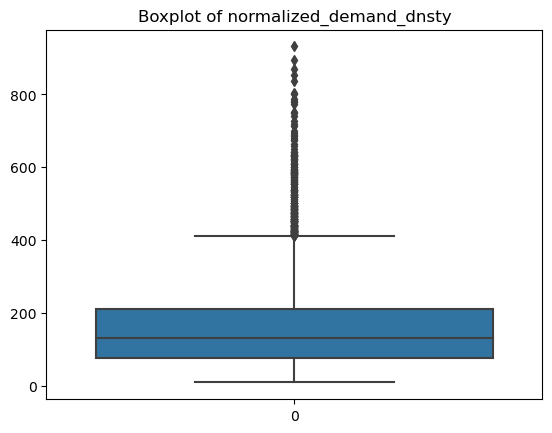

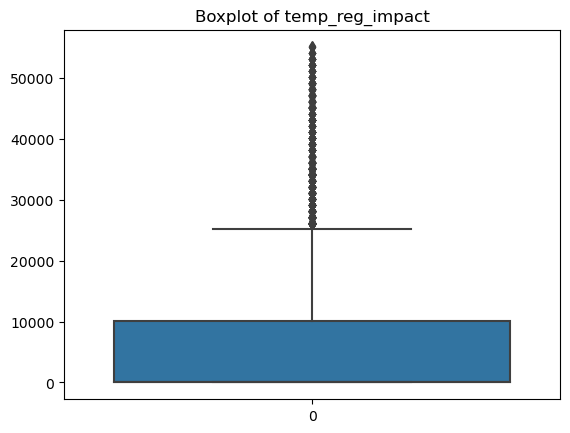

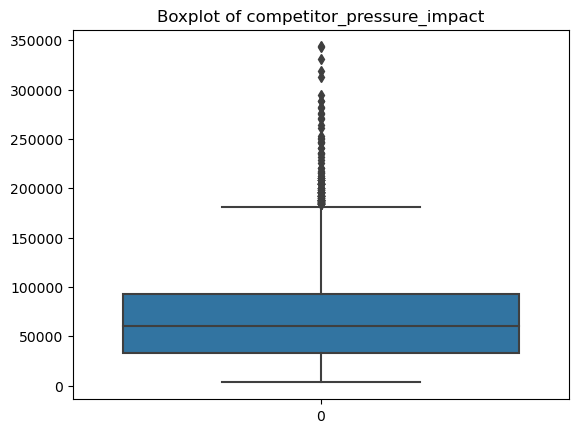

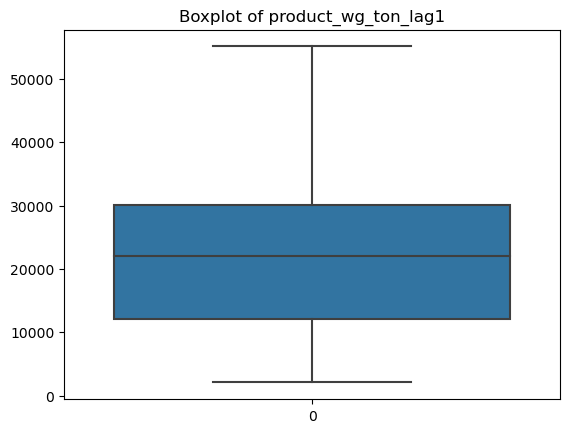

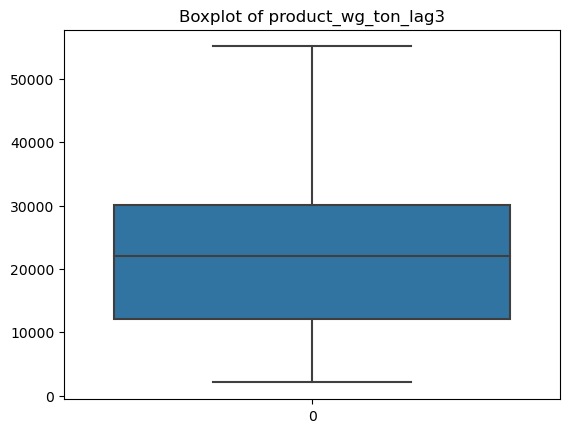

In [327]:
for col in columns_to_visualize:
    sns.boxplot(data=test_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [328]:
test_df[new_features].describe()

num_refill_transport  dist_from_hub_normalized  demand_density  \
count           5529.000000               5529.000000     5529.000000   
mean               1.518358                  0.504167       36.391885   
std                3.243617                  0.289559       18.969238   
min                0.000000                  0.000000       12.929889   
25%                0.000000                  0.254630       22.674528   
50%                0.000000                  0.509259       30.340541   
75%                0.000000                  0.754630       44.865385   
max               16.000000                  1.000000      123.571429   

       WH_Capacity_size_num  distribution_efficiency  Location_type_Rural  \
count           5529.000000              5529.000000          5529.000000   
mean               2.204739                22.425152             0.915355   
std                0.747189                13.975233             0.278377   
min                1.000000                 5.000000             0.000000   
25%                2.000000                12.666667             1.000000   
50%                2.000000                19.000000             1.000000   
75%                3.000000                28.000000             1.000000   
max                3.000000                70.000000             1.000000   

       Location_type_Urban    zone_East   zone_North   zone_South  ...  \
count          5529.000000  5529.000000  5529.000000  5529.000000  ...   
mean              0.084645     0.018991     0.410382     0.257009  ...   
std               0.278377     0.136505     0.491947     0.437024  ...   
min               0.000000     0.000000     0.000000     0.000000  ...   
25%               0.000000     0.000000     0.000000     0.000000  ...   
50%               0.000000     0.000000     0.000000     0.000000  ...   
75%               0.000000     0.000000     1.000000     1.000000  ...   
max               1.000000     1.000000     1.000000     1.000000  ...   

       WH_regional_zone_Zone 6  wh_owner_type_Company Owned  \
count              5529.000000                  5529.000000   
mean                  0.326822                     0.553265   
std                   0.469094                     0.497200   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     1.000000   
75%                   1.000000                     1.000000   
max                   1.000000                     1.000000   

       wh_owner_type_Rented  approved_wh_govt_certificate_num  \
count           5529.000000                       5529.000000   
mean               0.446735                          3.170194   
std                0.497200                          1.441506   
min                0.000000                          1.000000   
25%                0.000000                          2.000000   
50%                0.000000                          3.000000   
75%                1.000000                          5.000000   
max                1.000000                          5.000000   

       distributor_eficny  normalized_demand_dnsty  temp_reg_impact  \
count         5529.000000              5529.000000      5529.000000   
mean             0.008773               161.360758      7049.539157   
std              0.003717               121.401118     12638.292576   
min              0.002168                 9.228070         0.000000   
25%              0.005747                75.750000         0.000000   
50%              0.008401               132.115226         0.000000   
75%              0.011438               210.472973     10065.000000   
max              0.019977               931.456140     55144.000000   

       competitor_pressure_impact  product_wg_ton_lag1  product_wg_ton_lag3  
count                 5529.000000          5529.000000          5529.000000  
mean                 68033.025321     

In [329]:
test_df['normalized_demand_dnsty']

0       193.153846
1        76.898734
2       343.942857
3        51.341176
4       141.809756
           ...    
5524    143.536946
5525    194.752941
5526    243.151515
5527     68.431818
5528    135.605769
Name: normalized_demand_dnsty, Length: 5529, dtype: float64

In [330]:
test_df['normalized_demand_dnsty'].describe()

count    5529.000000
mean      161.360758
std       121.401118
min         9.228070
25%        75.750000
50%       132.115226
75%       210.472973
max       931.456140
Name: normalized_demand_dnsty, dtype: float64

In [331]:
upper_percentile = test_df['normalized_demand_dnsty'].quantile(0.94)
test_df['normalized_demand_dnsty_winsorized'] = test_df['normalized_demand_dnsty'].clip(upper=upper_percentile)

<Axes: xlabel='normalized_demand_dnsty_winsorized'>

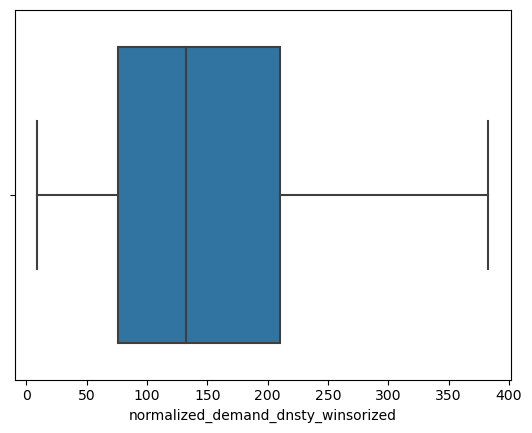

In [332]:
sns.boxplot(x=test_df['normalized_demand_dnsty_winsorized'])

In [333]:
test_df['normalized_demand_dnsty_winsorized'].describe()

count    5529.000000
mean      154.679362
std       101.578650
min         9.228070
25%        75.750000
50%       132.115226
75%       210.472973
max       382.896344
Name: normalized_demand_dnsty_winsorized, dtype: float64

In [334]:
upper_percentile = test_df['temp_reg_impact'].quantile(0.85)
test_df['temp_reg_impact_winsorized'] = test_df['temp_reg_impact'].clip(upper=upper_percentile)

<Axes: xlabel='temp_reg_impact_winsorized'>

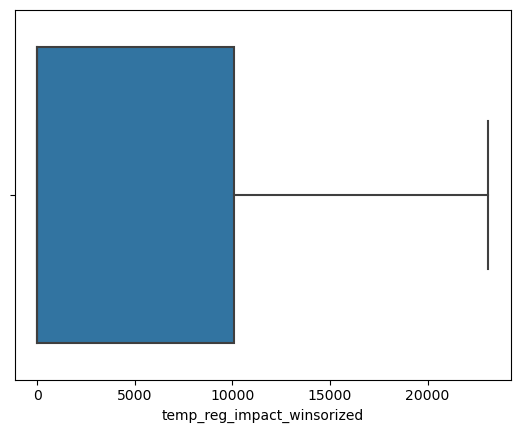

In [335]:
sns.boxplot(x=test_df['temp_reg_impact_winsorized'])

In [336]:
test_df['temp_reg_impact_winsorized'].describe()

count     5529.000000
mean      5506.375294
std       9092.169056
min          0.000000
25%          0.000000
50%          0.000000
75%      10065.000000
max      23115.600000
Name: temp_reg_impact_winsorized, dtype: float64

In [337]:
correlation = test_df[['temp_reg_impact_winsorized', 'product_wg_ton']].corr().iloc[0,1]
correlation

0.25707513678080046

<Axes: xlabel='competitor_pressure_impact'>

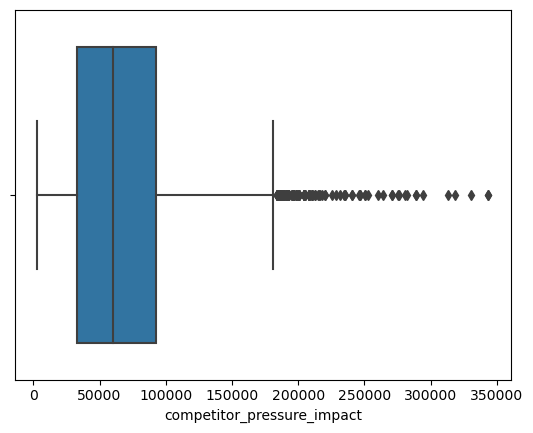

In [338]:
sns.boxplot(x=test_df['competitor_pressure_impact'])

In [339]:
upper_percentile = test_df['competitor_pressure_impact'].quantile(0.95)
test_df['competitor_pressure_impact_winsorized'] = test_df['competitor_pressure_impact'].clip(upper=upper_percentile)

<Axes: xlabel='competitor_pressure_impact_winsorized'>

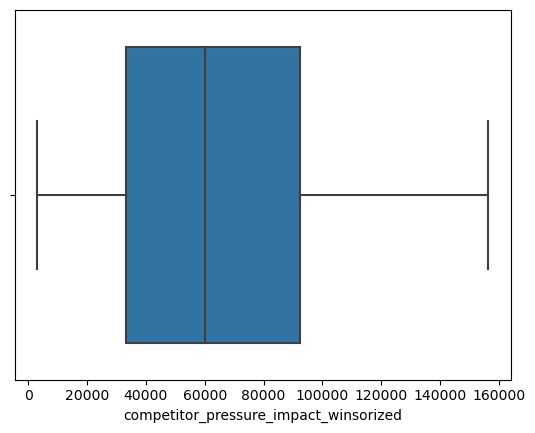

In [340]:
sns.boxplot(x=test_df['competitor_pressure_impact_winsorized'])

In [341]:
correlation = test_df[['competitor_pressure_impact_winsorized', 'product_wg_ton']].corr().iloc[0,1]
correlation

0.816468683627469

In [342]:
# Columns to drop:

In [343]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_win

In [344]:
columns_to_drop = ['WH_capacity_size','approved_wh_govt_certificate']
test_df.drop(columns=columns_to_drop, inplace=True)

In [345]:
# Location and zone feature assessment:

Location_type_Rural   -0.076930
Location_type_Urban    0.076930
zone_East              0.013911
zone_North             0.017628
zone_South            -0.009810
zone_West             -0.013543
Name: product_wg_ton, dtype: float64


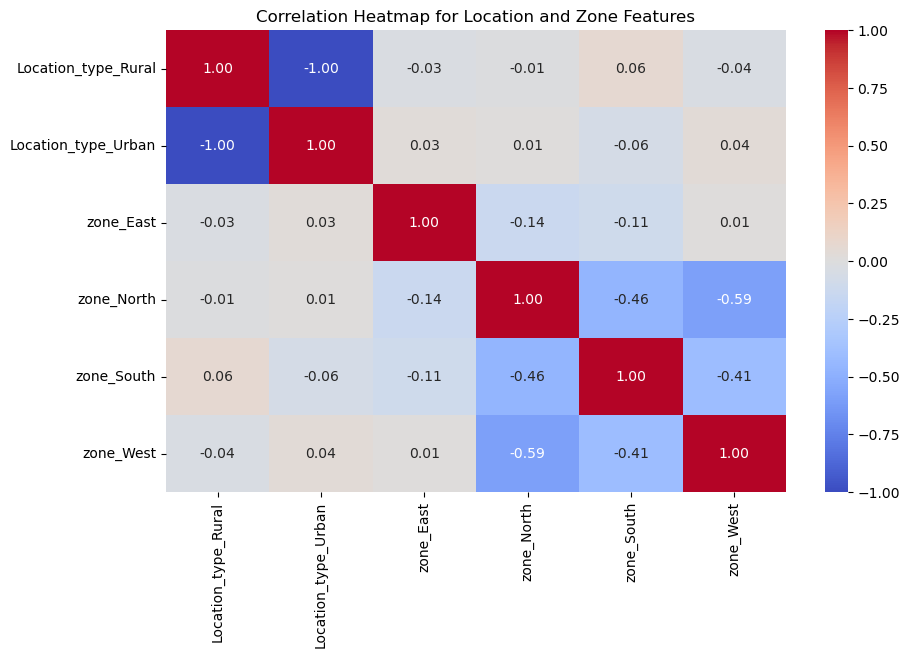

Low-Relevance Features: ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']


In [346]:
correlation_matrix = test_df.corr()
correlation_with_target = correlation_matrix['product_wg_ton']
location_zone_features = ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']
correlation_location_zone = correlation_with_target[location_zone_features]
print(correlation_location_zone)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[location_zone_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Location and Zone Features')
plt.show()

threshold = 0.1 
low_relevance_features = correlation_location_zone[abs(correlation_location_zone) < threshold].index.tolist()
print(f"Low-Relevance Features: {low_relevance_features}")

In [347]:
columns_to_drop = ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West']
test_df.drop(columns=columns_to_drop,inplace=True)

WH_regional_zone_Zone 1        0.008643
WH_regional_zone_Zone 2        0.004744
WH_regional_zone_Zone 3       -0.001868
WH_regional_zone_Zone 4       -0.007417
WH_regional_zone_Zone 5       -0.020505
WH_regional_zone_Zone 6        0.015669
wh_owner_type_Company Owned   -0.006915
wh_owner_type_Rented           0.006915
Name: product_wg_ton, dtype: float64


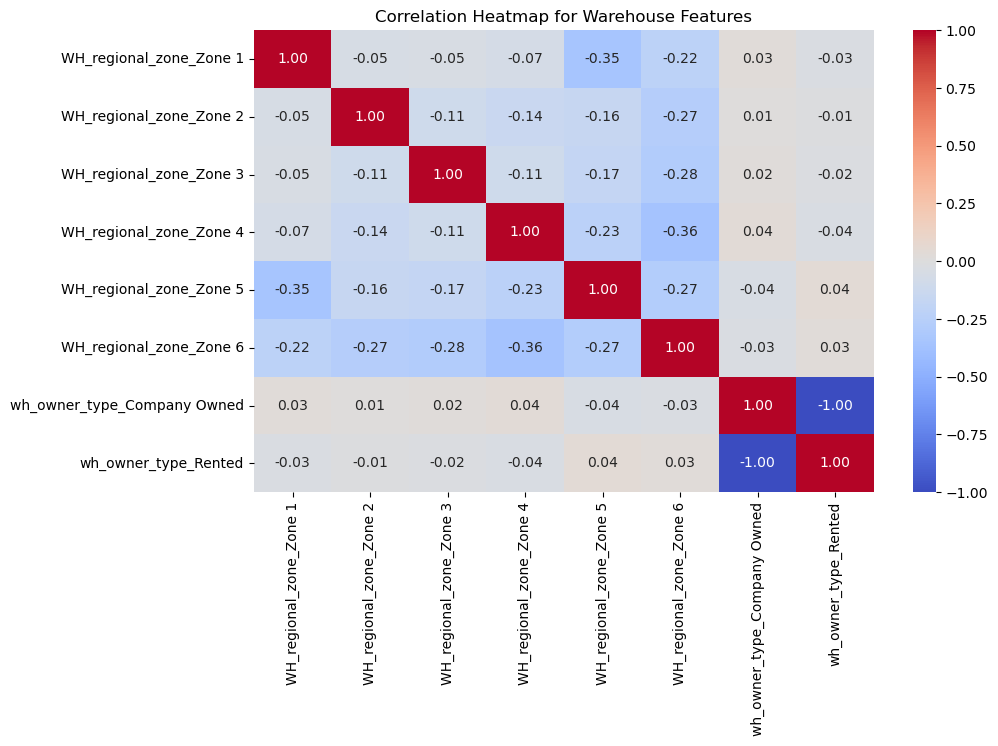

Low-Relevance Features: ['WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented']


In [348]:
correlation_matrix = test_df.corr()
correlation_with_target = correlation_matrix['product_wg_ton']

warehouse_features = ['WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                      'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented']

correlation_warehouse = correlation_with_target[warehouse_features]

print(correlation_warehouse)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[warehouse_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Warehouse Features')
plt.show()

threshold = 0.1 
low_relevance_features = correlation_warehouse[abs(correlation_warehouse) < threshold].index.tolist()

print(f"Low-Relevance Features: {low_relevance_features}")


In [349]:
columns_to_drop = ['WH_regional_zone_Zone 1','WH_regional_zone_Zone 3','WH_regional_zone_Zone 6','wh_owner_type_Company Owned', 'wh_owner_type_Rented']
test_df.drop(columns=columns_to_drop,inplace=True)

In [350]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols
num_columns, cat_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)
print("Categorical columns are :",cat_columns)

Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']
Categorical columns are : []


In [351]:
numeric_features = ['num_refill_transport', 'dist_from_hub_normalized', 'demand_density', 
                    'WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 
                    'normalized_demand_dnsty', 'temp_reg_impact', 'competitor_pressure_impact', 
                    'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2', 
                    'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                    'approved_wh_govt_certificate_num', 'normalized_demand_dnsty_winsorized', 
                    'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']

correlation_matrix = test_df.corr()
correlation_with_target = correlation_matrix['product_wg_ton']


correlation_numeric = correlation_with_target[numeric_features]

print("Correlation of numeric features with 'product_wg_ton':")
print(correlation_numeric)

Correlation of numeric features with 'product_wg_ton':
num_refill_transport                    -0.076382
dist_from_hub_normalized                 0.009994
demand_density                          -0.013061
WH_Capacity_size_num                    -0.025858
distribution_efficiency                  0.030081
distributor_eficny                       0.016829
normalized_demand_dnsty                  0.692530
temp_reg_impact                          0.366515
competitor_pressure_impact               0.799797
product_wg_ton_lag1                     -0.013249
product_wg_ton_lag3                      0.008749
WH_regional_zone_Zone 2                  0.004744
WH_regional_zone_Zone 4                 -0.007417
WH_regional_zone_Zone 5                 -0.020505
approved_wh_govt_certificate_num        -0.229163
normalized_demand_dnsty_winsorized       0.724068
temp_reg_impact_winsorized               0.257075
competitor_pressure_impact_winsorized    0.816469
Name: product_wg_ton, dtype: float64


In [352]:
columns_to_drop = ['num_refill_transport','dist_from_hub_normalized','demand_density','WH_Capacity_size_num', 'distribution_efficiency', 'distributor_eficny', 
                    'product_wg_ton_lag1', 'product_wg_ton_lag3', 'WH_regional_zone_Zone 2','WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 
                    'approved_wh_govt_certificate_num']
test_df.drop(columns=columns_to_drop,inplace=True)

In [353]:
column_to_drop = ['temp_reg_impact','normalized_demand_dnsty','competitor_pressure_impact']
test_df.drop(columns=column_to_drop, inplace=True)

In [354]:
def numeric_and_categorical_columns(test_df):
    num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    return num_cols
num_columns = numeric_and_categorical_columns(test_df)
print("Numerical Columns are :",num_columns)


Numerical Columns are : ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'distributor_num', 'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'retail_shop_num_winsorized', 'workers_num_winsorized', 'cleaned_flood_proof', 'cleaned_flood_impacted', 'normalized_demand_dnsty_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized']


## Feature Selection

In [355]:
test_df['competitor_pressure_impact_winsorized']

0        90396.0
1        12150.0
2        72228.0
3        26184.0
4       116284.0
          ...   
5524     87414.0
5525     99324.0
5526     48144.0
5527     60220.0
5528     42309.0
Name: competitor_pressure_impact_winsorized, Length: 5529, dtype: float64

In [356]:
X = test_df.drop(columns=['product_wg_ton'])
y = test_df['product_wg_ton']
correlation_matrix = X.corrwith(y)
high_corr_feature = correlation_matrix.abs().nlargest(10).index
# Mutual_ Informations :
mi_scores = mutual_info_regression(X,y)
mi_features = pd.Series(mi_scores,index=X.columns).nlargest(10).index

# Feature importance from Machine Learning:
rf = RandomForestRegressor()
rf.fit(X,y)
importance_scores =rf.feature_importances_
importance_features = pd.Series(importance_scores, index=X.columns).nlargest(10).index
selected_features = set(high_corr_feature) | set(mi_features)| set(importance_features)
print("Selected Features :", selected_features)

Selected Features : {'temp_reg_mach', 'wh_breakdown_l3m', 'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_impact_winsorized', 'workers_num_winsorized', 'retail_shop_num_winsorized', 'competitor_pressure_impact_winsorized', 'govt_check_l3m', 'Competitor_in_mkt', 'distributor_num', 'dist_from_hub', 'num_refill_req_l3m', 'normalized_demand_dnsty_winsorized', 'transport_issue_l1y'}


In [357]:
columns_to_drop = ['cleaned_flood_proof','cleaned_flood_impacted']
test_df.drop(columns=columns_to_drop, inplace=True)

In [358]:
X = test_df.drop(columns=['product_wg_ton'])
y = test_df['product_wg_ton']
correlation_matrix = X.corrwith(y)
high_corr_feature = correlation_matrix.abs().nlargest(10).index
# Mutual_ Informations :
mi_scores = mutual_info_regression(X,y)
mi_features = pd.Series(mi_scores,index=X.columns).nlargest(10).index

# Feature importance from Machine Learning:
rf = RandomForestRegressor()
rf.fit(X,y)
importance_scores =rf.feature_importances_
importance_features = pd.Series(importance_scores, index=X.columns).nlargest(10).index
selected_features = set(high_corr_feature) | set(mi_features)| set(importance_features)
print("Selected Features :", selected_features)

Selected Features : {'temp_reg_mach', 'wh_breakdown_l3m', 'storage_issue_reported_l3m', 'temp_reg_impact_winsorized', 'workers_num_winsorized', 'retail_shop_num_winsorized', 'competitor_pressure_impact_winsorized', 'govt_check_l3m', 'Competitor_in_mkt', 'distributor_num', 'dist_from_hub', 'num_refill_req_l3m', 'normalized_demand_dnsty_winsorized', 'transport_issue_l1y'}


In [359]:
# More about Selected_features:

In [360]:
selected_features = ['Competitor_in_mkt', 'temp_reg_mach', 'transport_issue_l1y', 'retail_shop_num_winsorized', 
                     'dist_from_hub', 'workers_num_winsorized', 'temp_reg_impact_winsorized', 'competitor_pressure_impact_winsorized', 'storage_issue_reported_l3m', 'distributor_num', 
                     'wh_breakdown_l3m', 'govt_check_l3m', 'normalized_demand_dnsty_winsorized', 'num_refill_req_l3m']


test_df_selected = test_df[selected_features]

print(test_df_selected.describe())


       Competitor_in_mkt  temp_reg_mach  transport_issue_l1y  \
count        5529.000000    5529.000000          5529.000000   
mean            3.084645       0.298426             0.375294   
std             1.079542       0.457609             0.647307   
min             1.000000       0.000000             0.000000   
25%             2.000000       0.000000             0.000000   
50%             3.000000       0.000000             0.000000   
75%             4.000000       1.000000             1.000000   
max             7.000000       1.000000             2.000000   

       retail_shop_num_winsorized  dist_from_hub  workers_num_winsorized  \
count                 5529.000000    5529.000000             5529.000000   
mean                  4960.546392     163.899982               28.775005   
std                    904.046115      62.544704                6.735333   
min                   3504.000000      55.000000               18.000000   
25%                   4310.000000     110.0

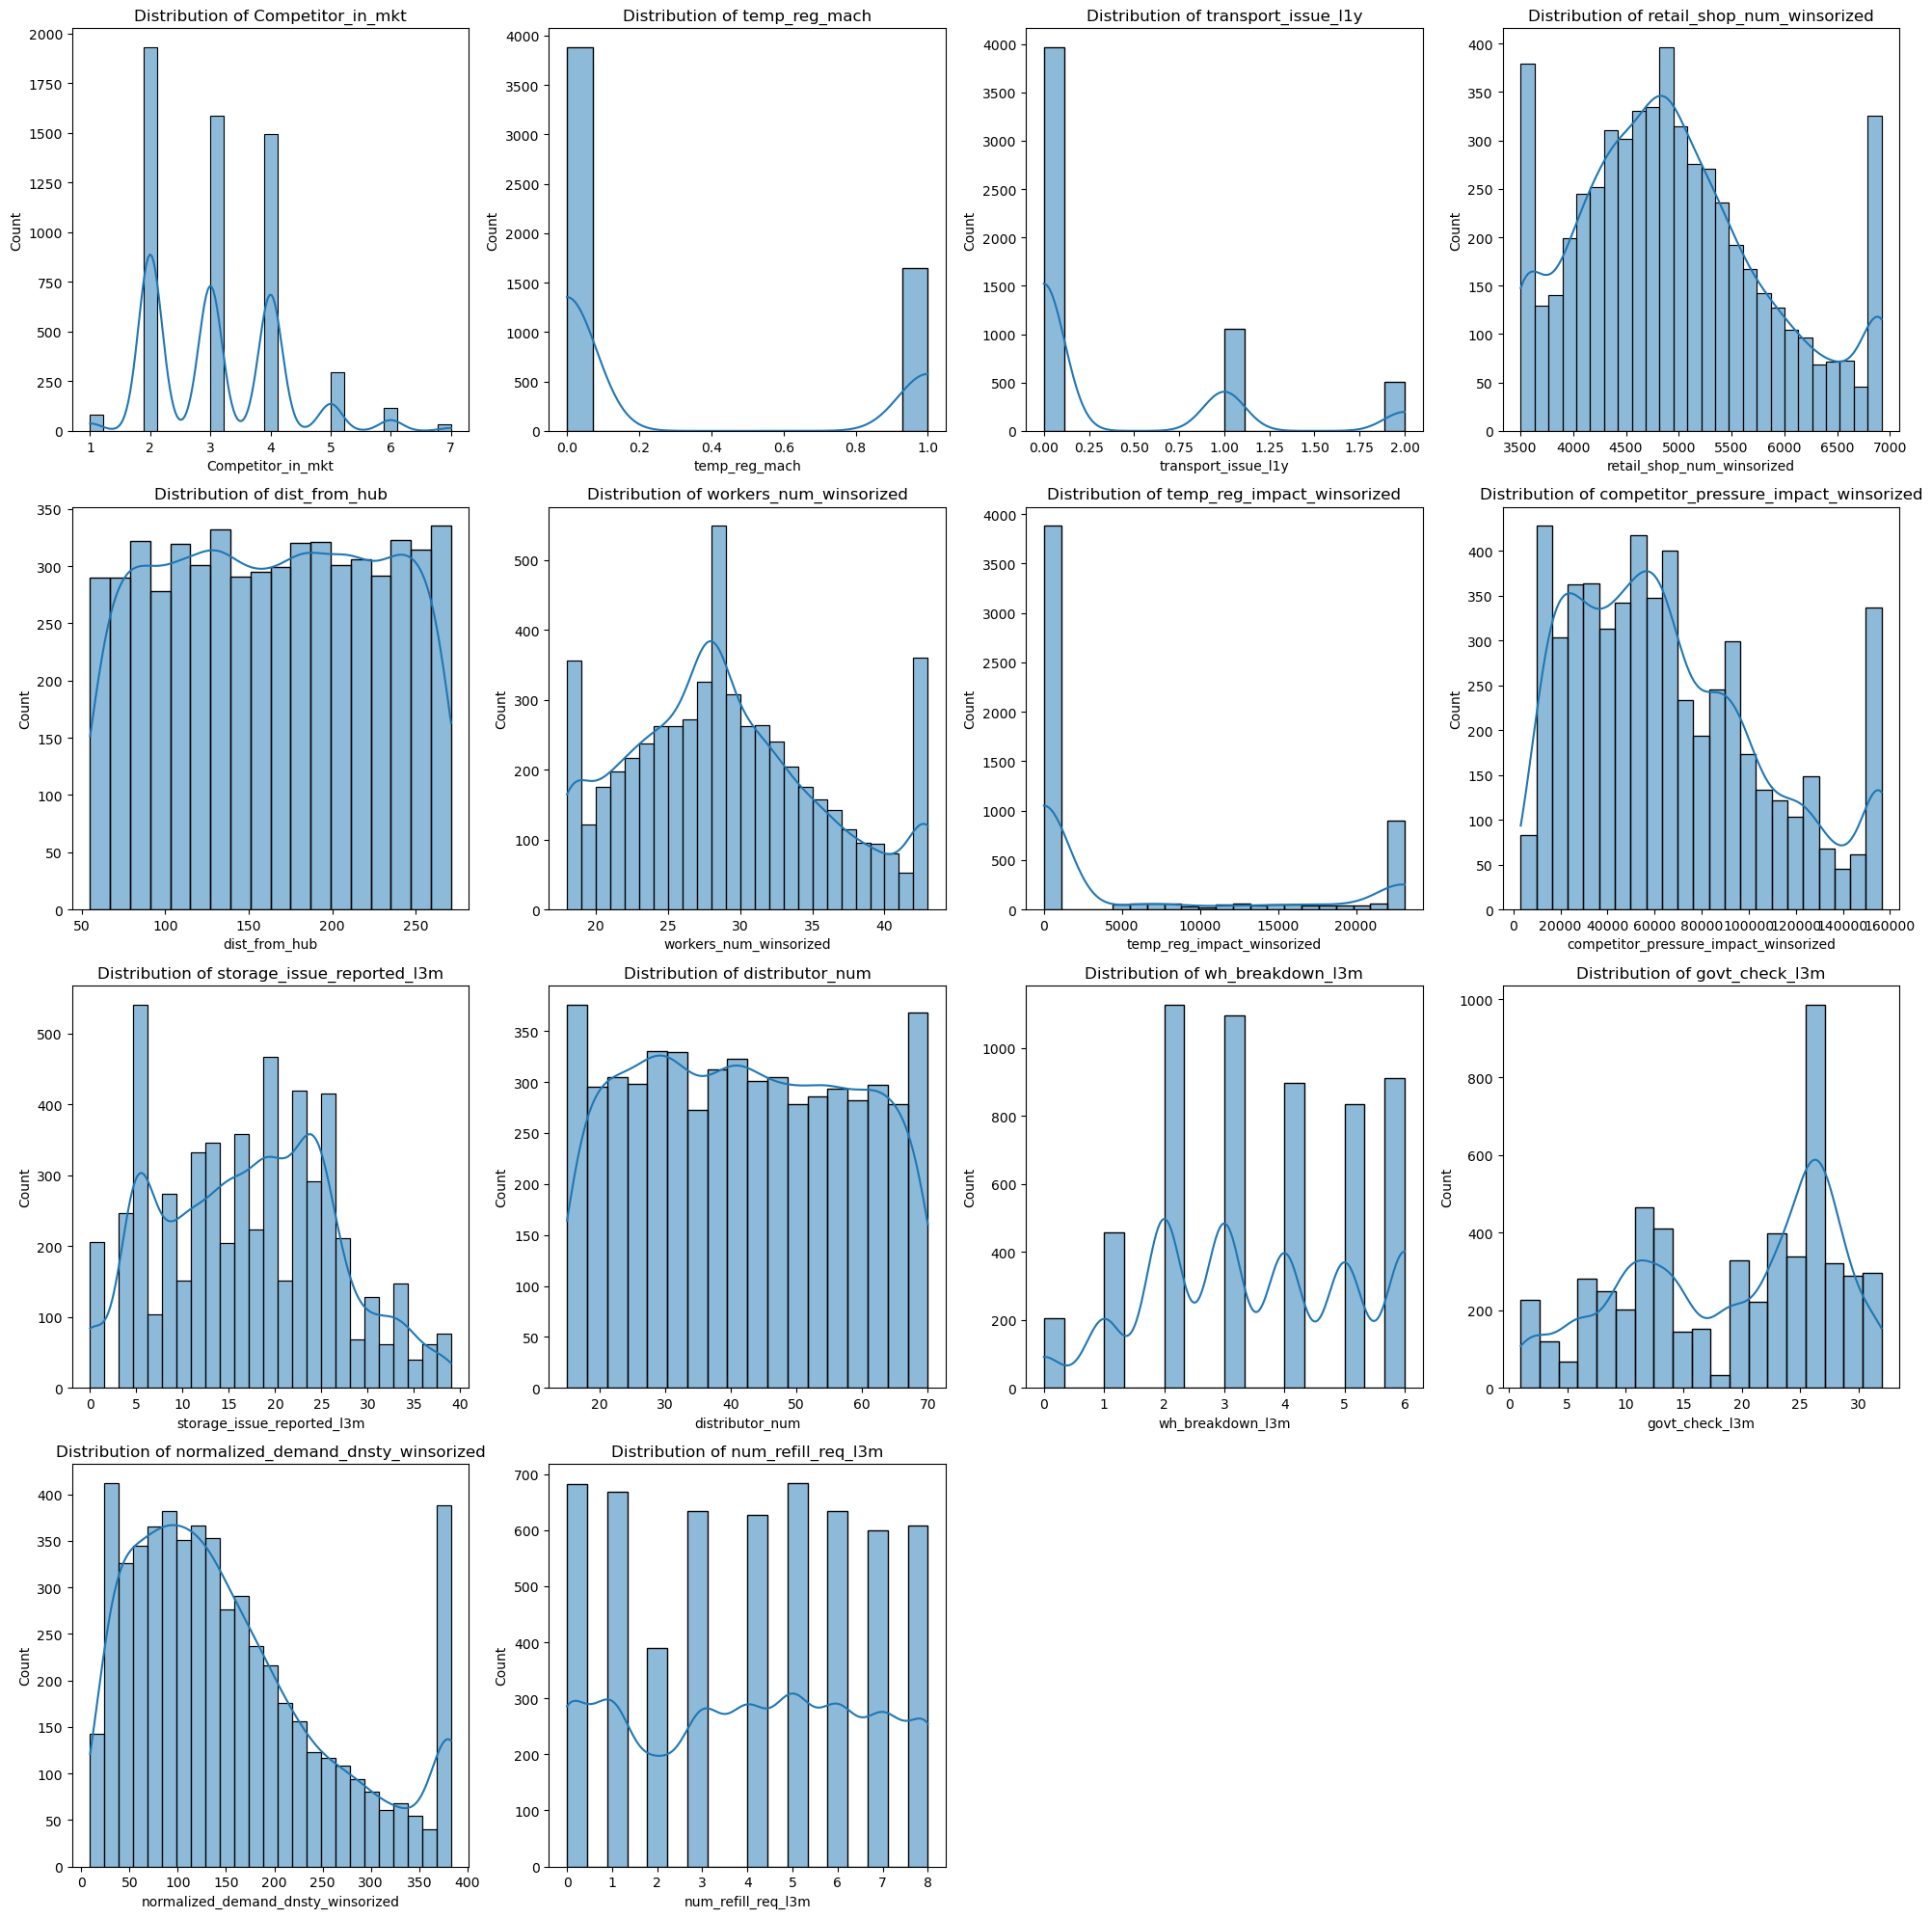

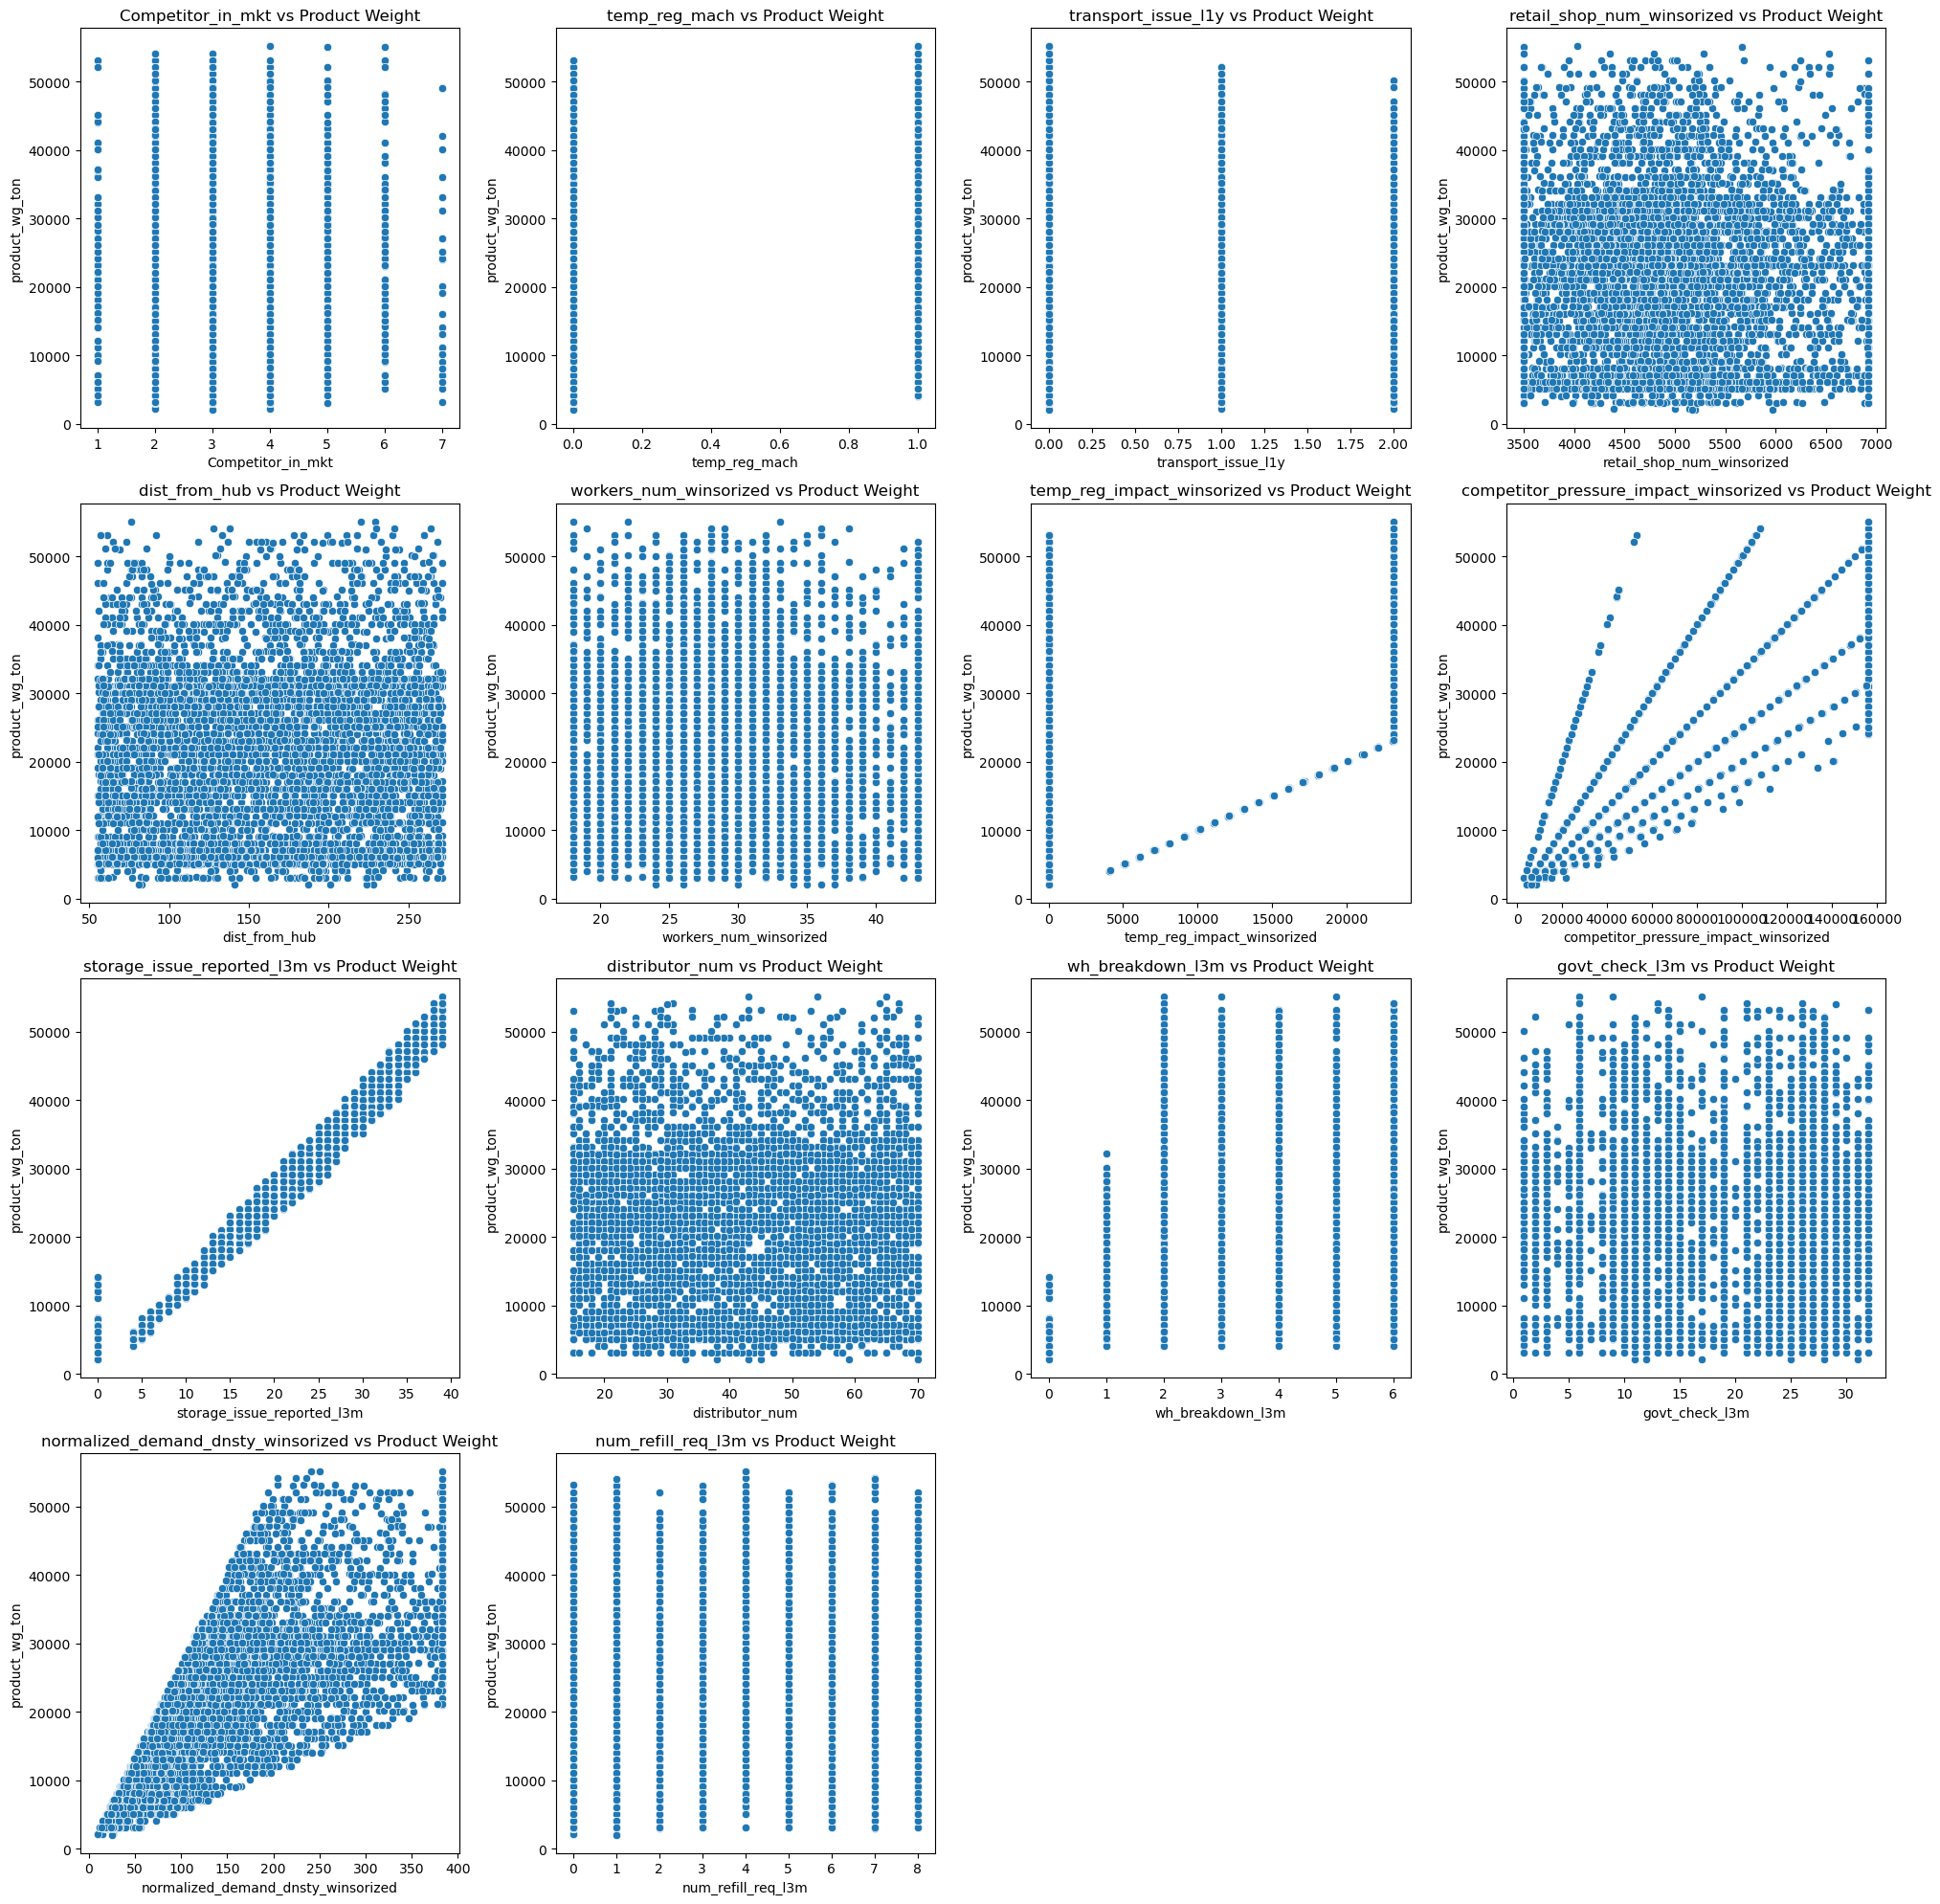

In [361]:
import math

num_features = len(selected_features)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

plt.figure(figsize=(5 * num_cols, 5 * num_rows))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(test_df_selected[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(5 * num_cols, 5 * num_rows))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=feature, y='product_wg_ton', data=test_df)
    plt.title(f'{feature} vs Product Weight')
plt.tight_layout()
plt.show()


In [362]:
X_test = test_df[selected_features]
y_test = test_df['product_wg_ton'] 

In [363]:
models = {}
for model_name in ['linear_reg', 'rf_reg', 'gb_reg', 'svr_reg', 'dt_reg']:
    with open(f'{model_name}_model.pkl', 'rb') as file:
        models[model_name] = pickle.load(file)

In [364]:
scaler.fit(X_train)


MinMaxScaler()

In [365]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [366]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  

In [367]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled) 

In [368]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

evaluation_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    evaluation_results[model_name] = mse

for model_name, mse in evaluation_results.items():
    print(f"{model_name} MSE: {mse}")


linear_reg MSE: 2585829.1776668183
rf_reg MSE: 399856.26233467174
gb_reg MSE: 1436657.2001294044
svr_reg MSE: 124198539.84680355
dt_reg MSE: 747428.1593416531


In [369]:
X_test = test_df[selected_features]
supply_quantity_predictions = rf_reg.predict(X_test)

In [370]:
test_df['predicted_supply_quantity'] = supply_quantity_predictions

In [371]:
test_df['predicted_supply_quantity']

0       30131.85
1        6075.09
2       24045.72
3       13087.56
4       29131.61
          ...   
5524    28981.09
5525    33137.27
5526    24072.18
5527    15118.69
5528    14034.51
Name: predicted_supply_quantity, Length: 5529, dtype: float64

In [372]:
test_df.to_csv("test_df_with_predictions.csv", index=False)

In [373]:
test_df['predicted_supply_quantity'].describe()

count     5529.000000
mean     22033.493048
std      11620.977702
min       2403.950000
25%      12175.850000
50%      22083.940000
75%      30091.350000
max      53675.450000
Name: predicted_supply_quantity, dtype: float64

# Finding the Accuracy

In [376]:
# Assuming y_test contains the actual target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.9944879398954904


In [377]:
test_df = test_df.sort_values(by='predicted_supply_quantity', ascending=True)


test_df['optimized_supply_quantity'] = test_df['predicted_supply_quantity']


test_df['optimized_supply_quantity'] *= 1.1  # Increase supply by 10%



In [378]:
test_df['optimized_supply_quantity']

78       2644.345
1030     2660.933
2238     2774.915
1802     2880.779
4742     3197.865
          ...    
1412    58418.250
813     58491.532
4400    58695.307
4738    58995.343
1961    59042.995
Name: optimized_supply_quantity, Length: 5529, dtype: float64

## Viswalization and Future insights

In [379]:
#Visualize Predicted Vs Actual Value

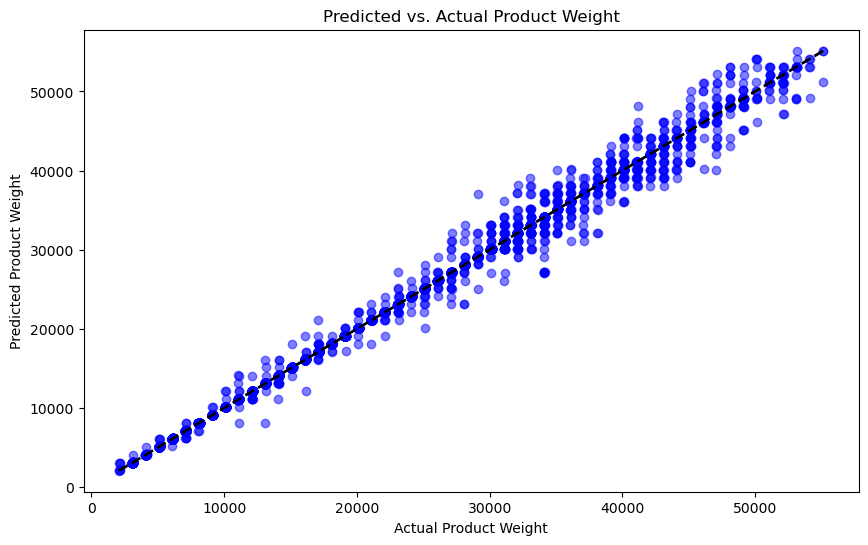

In [380]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Predicted vs. Actual Product Weight')
plt.show()

# Main Insights of the Project:

(1) Understanding the correlation between numeric features and the target variable provides valuable insights for feature selection, model building, and improving the accuracy of predictions for optimizing warehouse supply amounts effectively, as outlined in the project objectives.

(2) The selected_features provide valuable insights into the relationship between various factors(independent variables) and the target variable, facilitating  in better decision-making and optimization of supply chain operations.

(3)The model's high accuracy in forecasting the ideal product weight for dispatch instills confidence in its capacity to efficiently optimize warehouse supply amounts. By utilizing the insights derived from the model, the project can effectively attain its goals of lowering inventory costs, reducing wastage, and enhancing overall supply chain efficiency.